In [9]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

heartAttackPrediction_India = pd.read_csv('../Codigo/heart_attack_prediction_india.csv')
heartAttackPrediction_India.fillna(0, inplace=True)
heartAttackPrediction_India.head()

Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  Stress_Level  Healthcare_Access  \
0                       1               0             4                  0   
1                       0               0             7                  0   
2                       0               1            10                  1   
3                       0               0             1                  1   
4                       0               0             9                  0   

   Heart_Attack_History  Emergency_Response_Time  Annual_Income  \
0                     0                      157         611025   
1                     0                      331         174527   
2                     0                      186        1760112   
3                     1                      324        1398213   
4                     0                      209          97987   

   Health_Insurance  Heart_Attack_Risk  
0                 0                  0  
1                 0                  0  
2                 1                  0  
3                 0                  0  
4                 0                  1  

[5 rows x 26 columns]

In [12]:
# Tamaño del dataset
print(f"Número de filas: {heartAttackPrediction_India.shape[0]}")
print(f"Número de columnas: {heartAttackPrediction_India.shape[1]}")

# Información general de los tipos de datos
heartAttackPrediction_India.info()

Número de filas: 10000
Número de columnas: 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64

In [13]:
# Estadísticos generales para variables numéricas
heartAttackPrediction_India.describe()

# Verificar valores únicos en variables categóricas
for col in heartAttackPrediction_India.columns:
    if heartAttackPrediction_India[col].nunique() < 10:
        print(f"{col}: {heartAttackPrediction_India[col].unique()}")


Gender: ['Female' 'Male']
Diabetes: [0 1]
Hypertension: [0 1]
Obesity: [1 0]
Smoking: [1 0]
Alcohol_Consumption: [0 1]
Physical_Activity: [0 1]
Air_Pollution_Exposure: [1 0]
Family_History: [0 1]
Healthcare_Access: [0 1]
Heart_Attack_History: [0 1]
Health_Insurance: [0 1]
Heart_Attack_Risk: [0 1]


In [16]:
# Recuento de valores nulos por columna
heartAttackPrediction_India.isnull().sum()

Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64

In [17]:
# Tipos de datos por columna
heartAttackPrediction_India.dtypes

Patient_ID                  int64
State_Name                 object
Age                         int64
Gender                     object
Diabetes                    int64
Hypertension                int64
Obesity                     int64
Smoking                     int64
Alcohol_Consumption         int64
Physical_Activity           int64
Diet_Score                  int64
Cholesterol_Level           int64
Triglyceride_Level          int64
LDL_Level                   int64
HDL_Level                   int64
Systolic_BP                 int64
Diastolic_BP                int64
Air_Pollution_Exposure      int64
Family_History              int64
Stress_Level                int64
Healthcare_Access           int64
Heart_Attack_History        int64
Emergency_Response_Time     int64
Annual_Income               int64
Health_Insurance            int64
Heart_Attack_Risk           int64
dtype: object

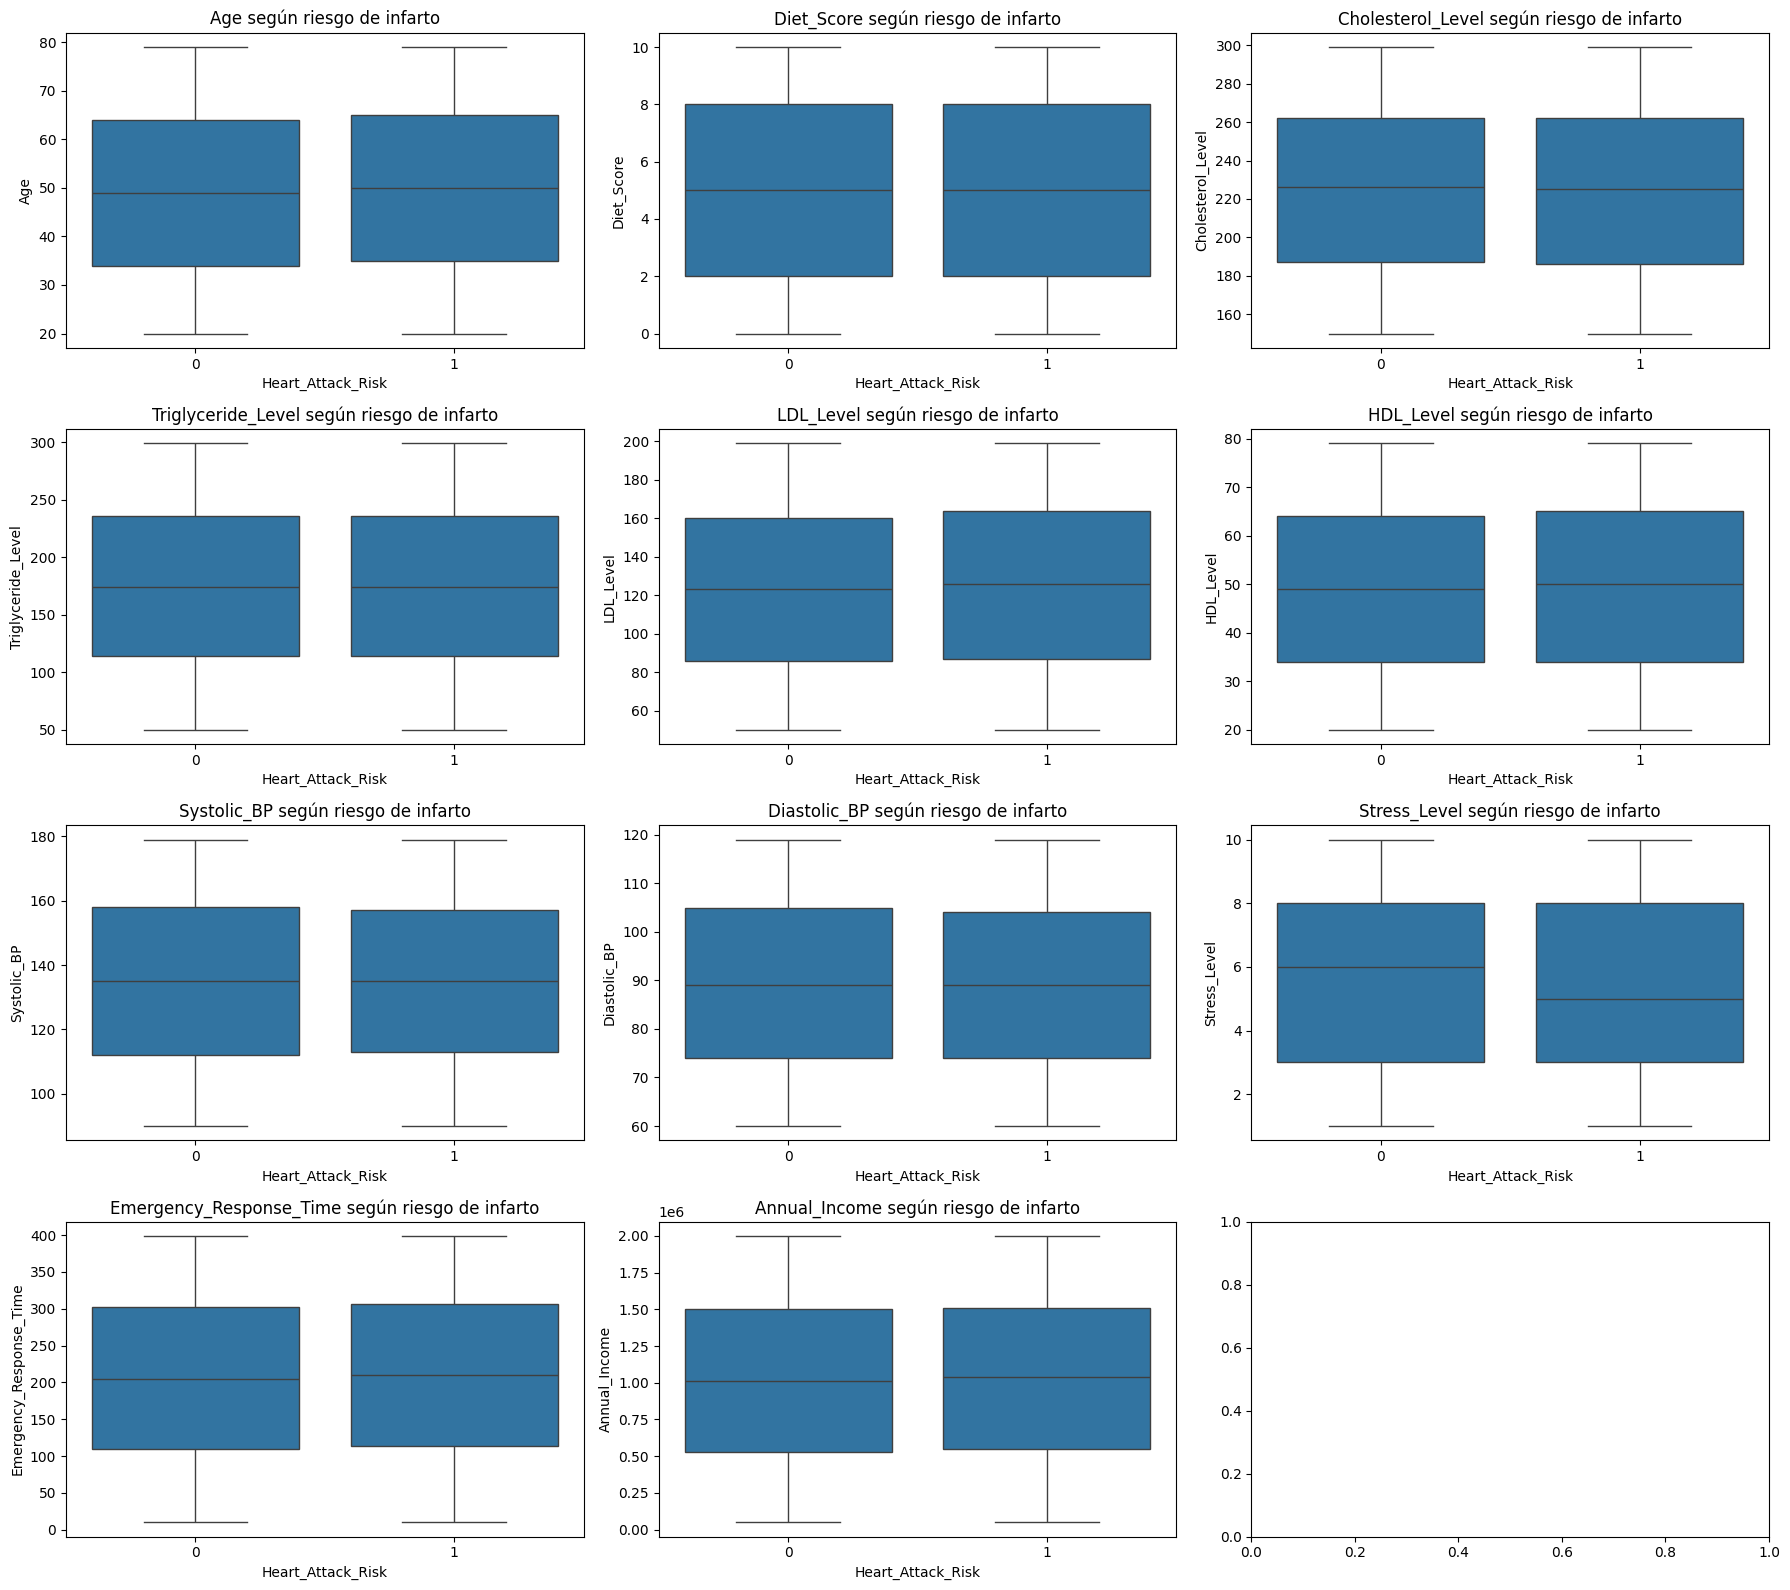

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas binarias (0/1)
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Variables numéricas continuas
numeric_vars = [
    'Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
    'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level',
    'Emergency_Response_Time', 'Annual_Income'
]

# Comparar variables numéricas por riesgo de infarto
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x='Heart_Attack_Risk', y=var, data=heartAttackPrediction_India, ax=axes[i])
    axes[i].set_title(f'{var} según riesgo de infarto')
    axes[i].set_xlabel('Heart_Attack_Risk')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


---
---
---
---

## **GRÁFICOS DE DISTRIBUCIONES - HISTOGRAMAS**

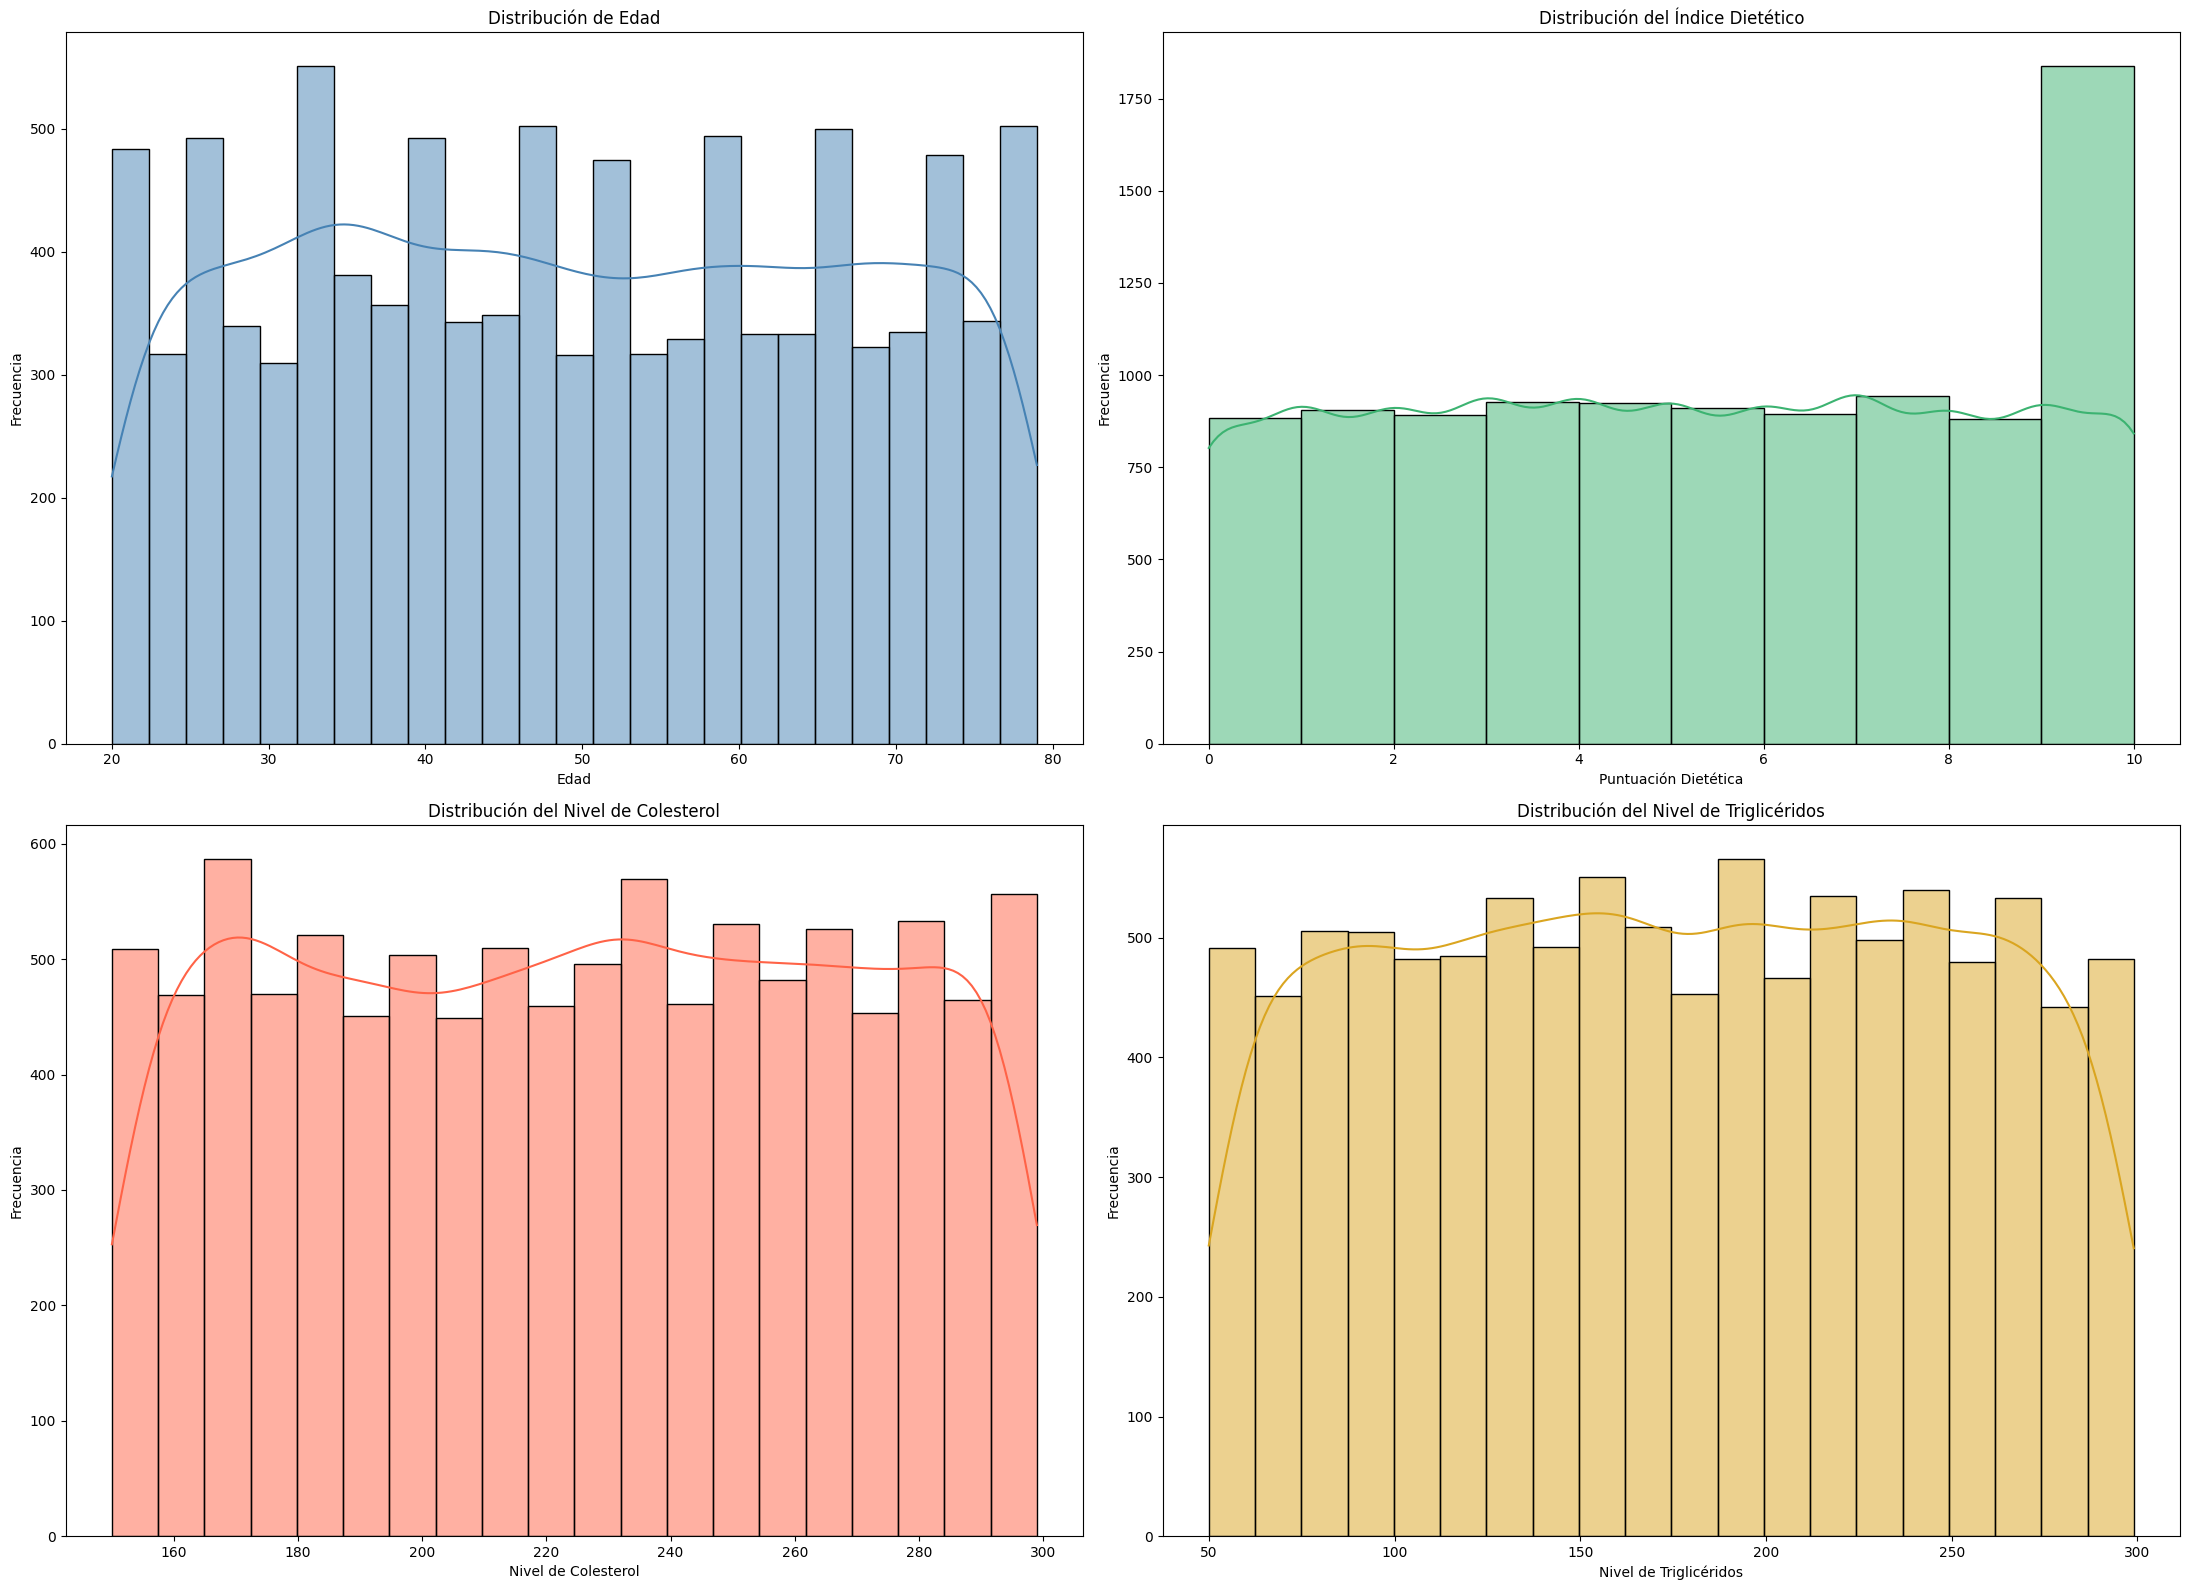

GRÁFICO 1: Distribución de la Edad
    - Valor máximo de Edad: 79
    - Valor medio de Edad: 49.3949
    - Valor mediano de Edad: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Distribución del Índice Dietético
    - Valor máximo del Índice Dietético: 10
    - Valor medio del Índice Dietético: 5.0217
    - Valor mediano del Índice Dietético: 5.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Distribución del Nivel de Colesterol
    - Valor máximo del Nivel de Colesterol: 299
    - Valor medio del Nivel de Colesterol: 224.753
    - Valor mediano del Nivel de Colesterol: 226.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Distribución del Nivel de Triglicéridos
    - Valor máximo del Nivel de Triglicéridos: 299
    - Valor medio del Nivel de Triglicéridos: 174.7333
    - Valor mediano del Nivel de Triglicéridos

In [88]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Plot 1: Distribución de Edad
sns.histplot(data=heartAttackPrediction_India, x='Age', bins=25, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Distribución de Edad')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

# Plot 2: Distribución del Diet Score
sns.histplot(data=heartAttackPrediction_India, x='Diet_Score', bins=10, kde=True, ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Distribución del Índice Dietético')
axs[0, 1].set_xlabel('Puntuación Dietética')
axs[0, 1].set_ylabel('Frecuencia')

# Plot 3: Distribución del Colesterol
sns.histplot(data=heartAttackPrediction_India, x='Cholesterol_Level', bins=20, kde=True, ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Distribución del Nivel de Colesterol')
axs[1, 0].set_xlabel('Nivel de Colesterol')
axs[1, 0].set_ylabel('Frecuencia')

# Plot 4: Distribución de los Triglicéridos
sns.histplot(data=heartAttackPrediction_India, x='Triglyceride_Level', bins=20, kde=True, ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Distribución del Nivel de Triglicéridos')
axs[1, 1].set_xlabel('Nivel de Triglicéridos')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Distribución de la Edad')
print(f'    - Valor máximo de Edad: {heartAttackPrediction_India["Age"].max()}')
print(f'    - Valor medio de Edad: {heartAttackPrediction_India["Age"].mean()}')
print(f'    - Valor mediano de Edad: {heartAttackPrediction_India["Age"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Distribución del Índice Dietético')
print(f'    - Valor máximo del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].max()}')
print(f'    - Valor medio del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].mean()}')
print(f'    - Valor mediano del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Distribución del Nivel de Colesterol')
print(f'    - Valor máximo del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].max()}')
print(f'    - Valor medio del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Distribución del Nivel de Triglicéridos')
print(f'    - Valor máximo del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].max()}')
print(f'    - Valor medio del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].median()}')

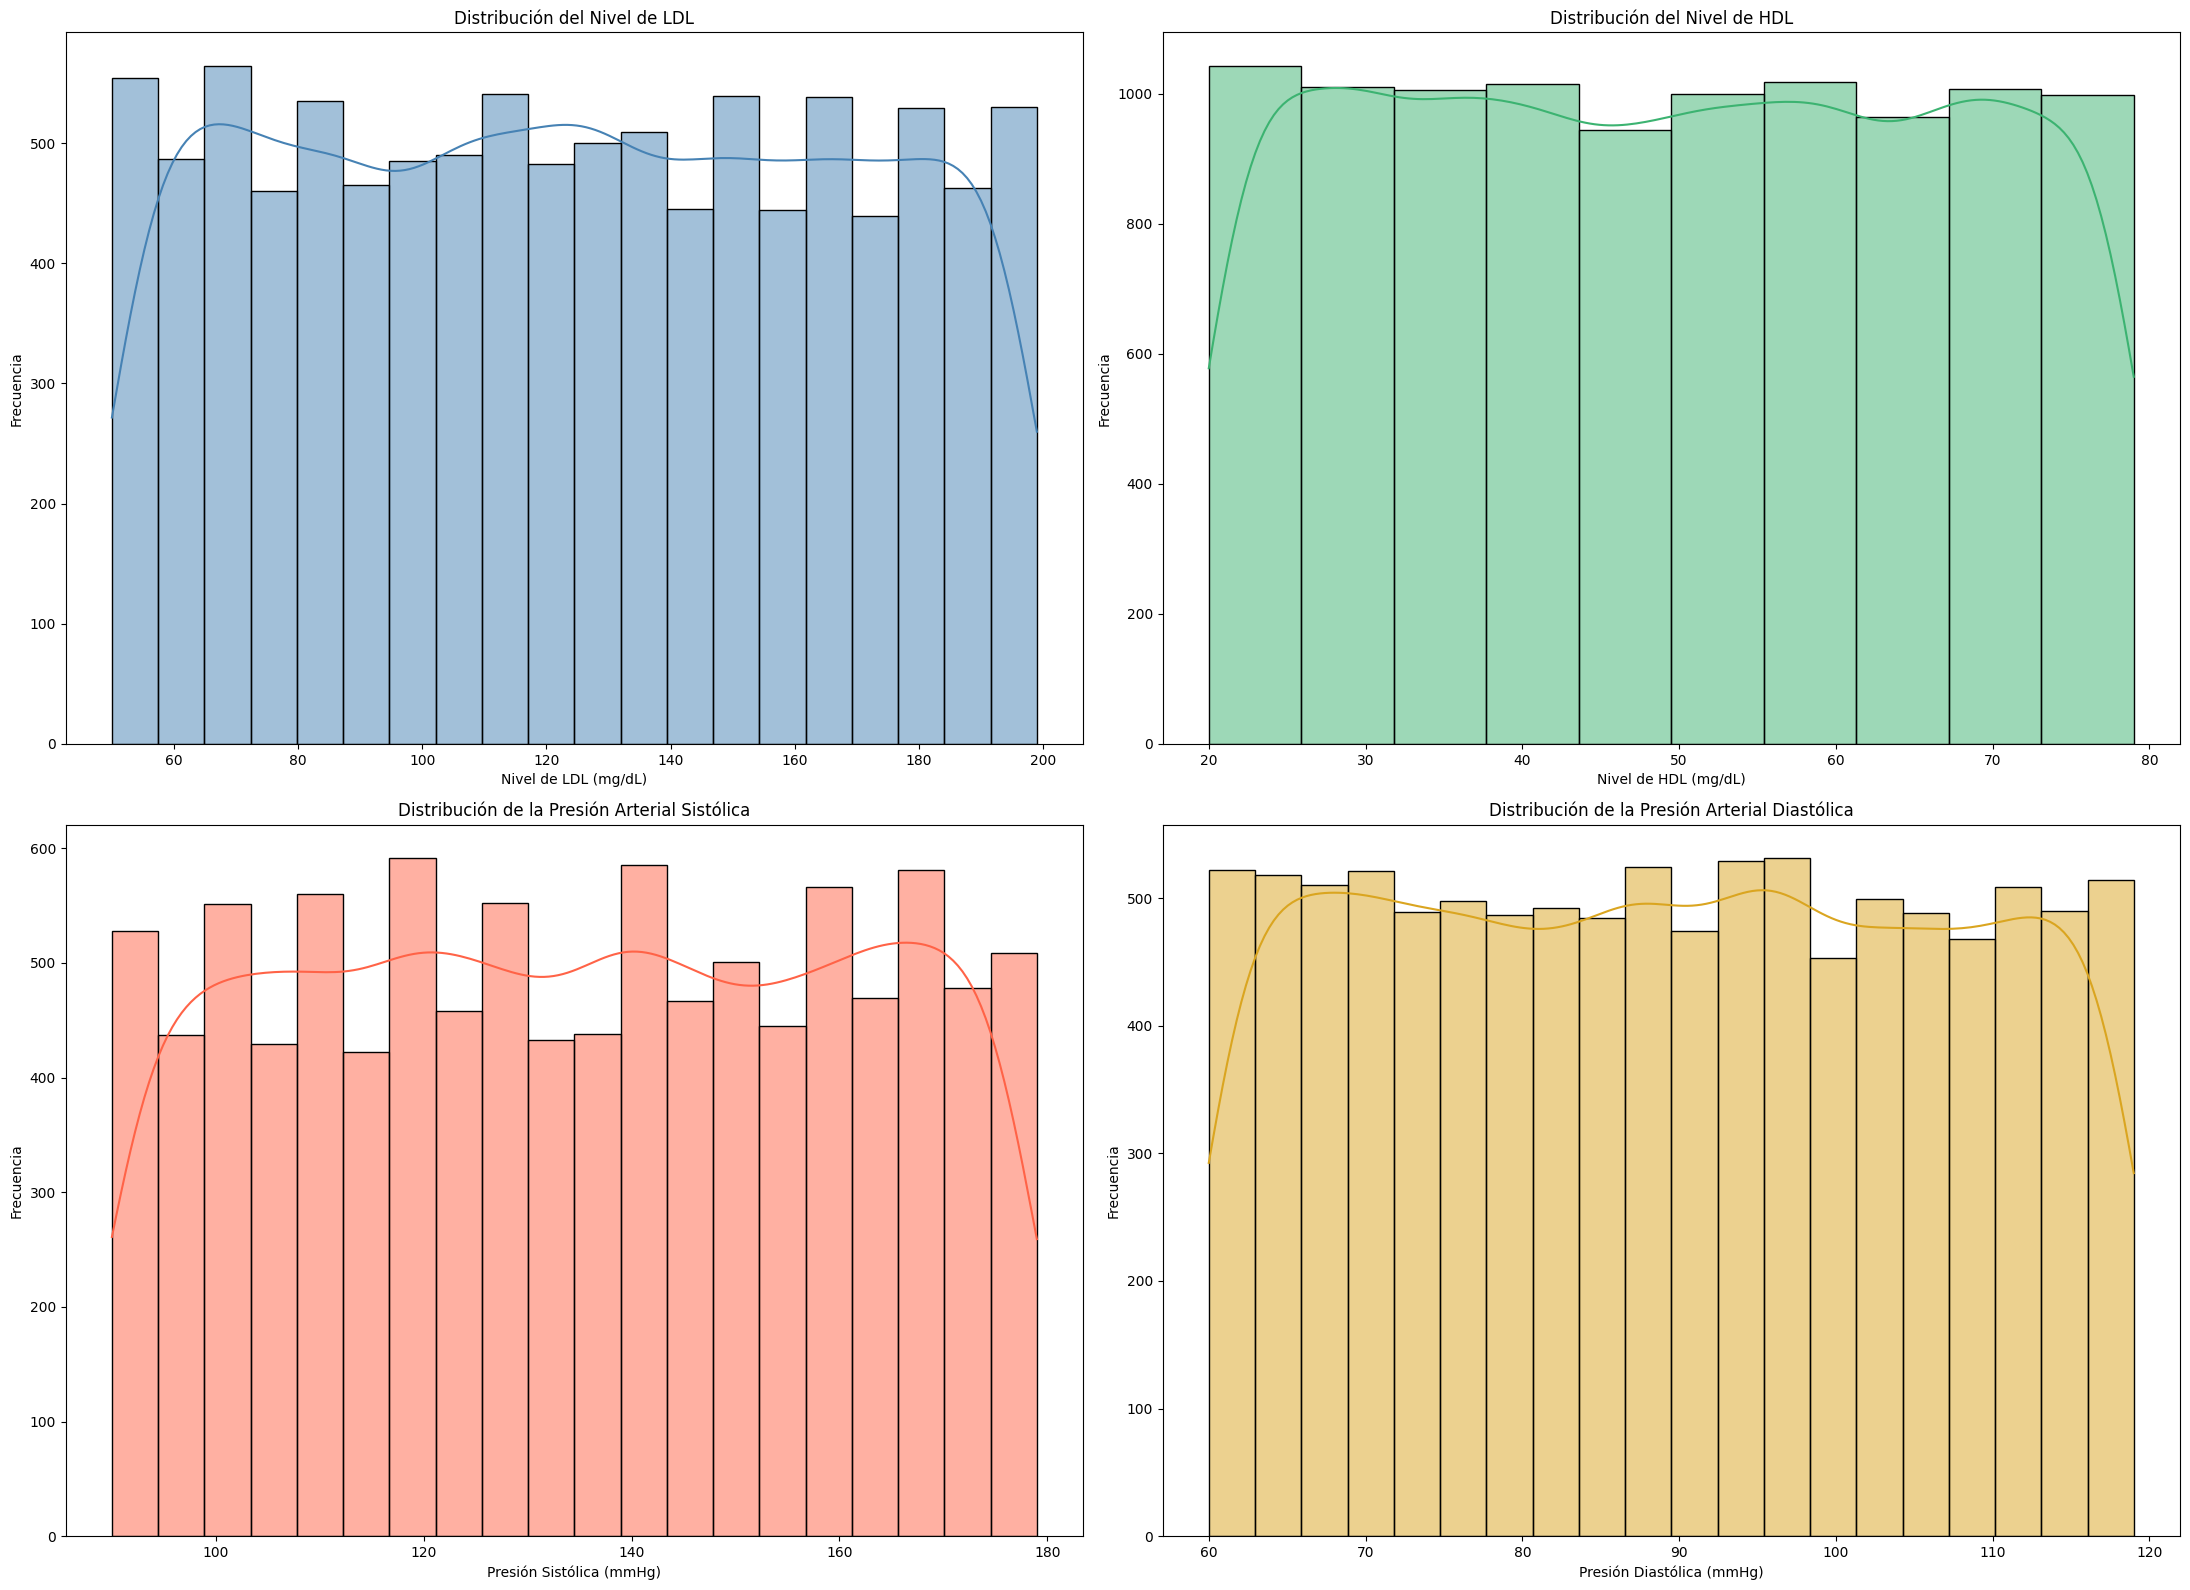

GRÁFICO 1: Distribución del Nivel de LDL
    - Valor máximo de LDL: 199
    - Valor medio de LDL: 123.8721
    - Valor mediano de LDL: 124.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Distribución del Nivel de HDL
    - Valor máximo de HDL: 79
    - Valor medio de HDL: 49.3355
    - Valor mediano de HDL: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Distribución de la Presión Arterial Sistólica
    - Valor máximo de Presión Sistólica: 179
    - Valor medio de Presión Sistólica: 134.7259
    - Valor mediano de Presión Sistólica: 135.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Distribución de la Presión Arterial Diastólica
    - Valor máximo de Presión Diastólica: 119
    - Valor medio de Presión Diastólica: 89.312
    - Valor mediano de Presión Diastólica: 89.0


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Gráfico 1: Distribución de LDL
sns.histplot(data=heartAttackPrediction_India, x='LDL_Level', bins=20, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Distribución del Nivel de LDL')
axs[0, 0].set_xlabel('Nivel de LDL (mg/dL)')
axs[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Distribución de HDL
sns.histplot(data=heartAttackPrediction_India, x='HDL_Level', bins=10, kde=True, ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Distribución del Nivel de HDL')
axs[0, 1].set_xlabel('Nivel de HDL (mg/dL)')
axs[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Distribución de Presión Sistólica
sns.histplot(data=heartAttackPrediction_India, x='Systolic_BP', bins=20, kde=True, ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Distribución de la Presión Arterial Sistólica')
axs[1, 0].set_xlabel('Presión Sistólica (mmHg)')
axs[1, 0].set_ylabel('Frecuencia')

# Gráfico 4: Distribución de Presión Diastólica
sns.histplot(data=heartAttackPrediction_India, x='Diastolic_BP', bins=20, kde=True, ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Distribución de la Presión Arterial Diastólica')
axs[1, 1].set_xlabel('Presión Diastólica (mmHg)')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Distribución del Nivel de LDL')
print(f'    - Valor máximo de LDL: {heartAttackPrediction_India["LDL_Level"].max()}')
print(f'    - Valor medio de LDL: {heartAttackPrediction_India["LDL_Level"].mean()}')
print(f'    - Valor mediano de LDL: {heartAttackPrediction_India["LDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Distribución del Nivel de HDL')
print(f'    - Valor máximo de HDL: {heartAttackPrediction_India["HDL_Level"].max()}')
print(f'    - Valor medio de HDL: {heartAttackPrediction_India["HDL_Level"].mean()}')
print(f'    - Valor mediano de HDL: {heartAttackPrediction_India["HDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Distribución de la Presión Arterial Sistólica')
print(f'    - Valor máximo de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].max()}')
print(f'    - Valor medio de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Distribución de la Presión Arterial Diastólica')
print(f'    - Valor máximo de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].max()}')
print(f'    - Valor medio de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].median()}')

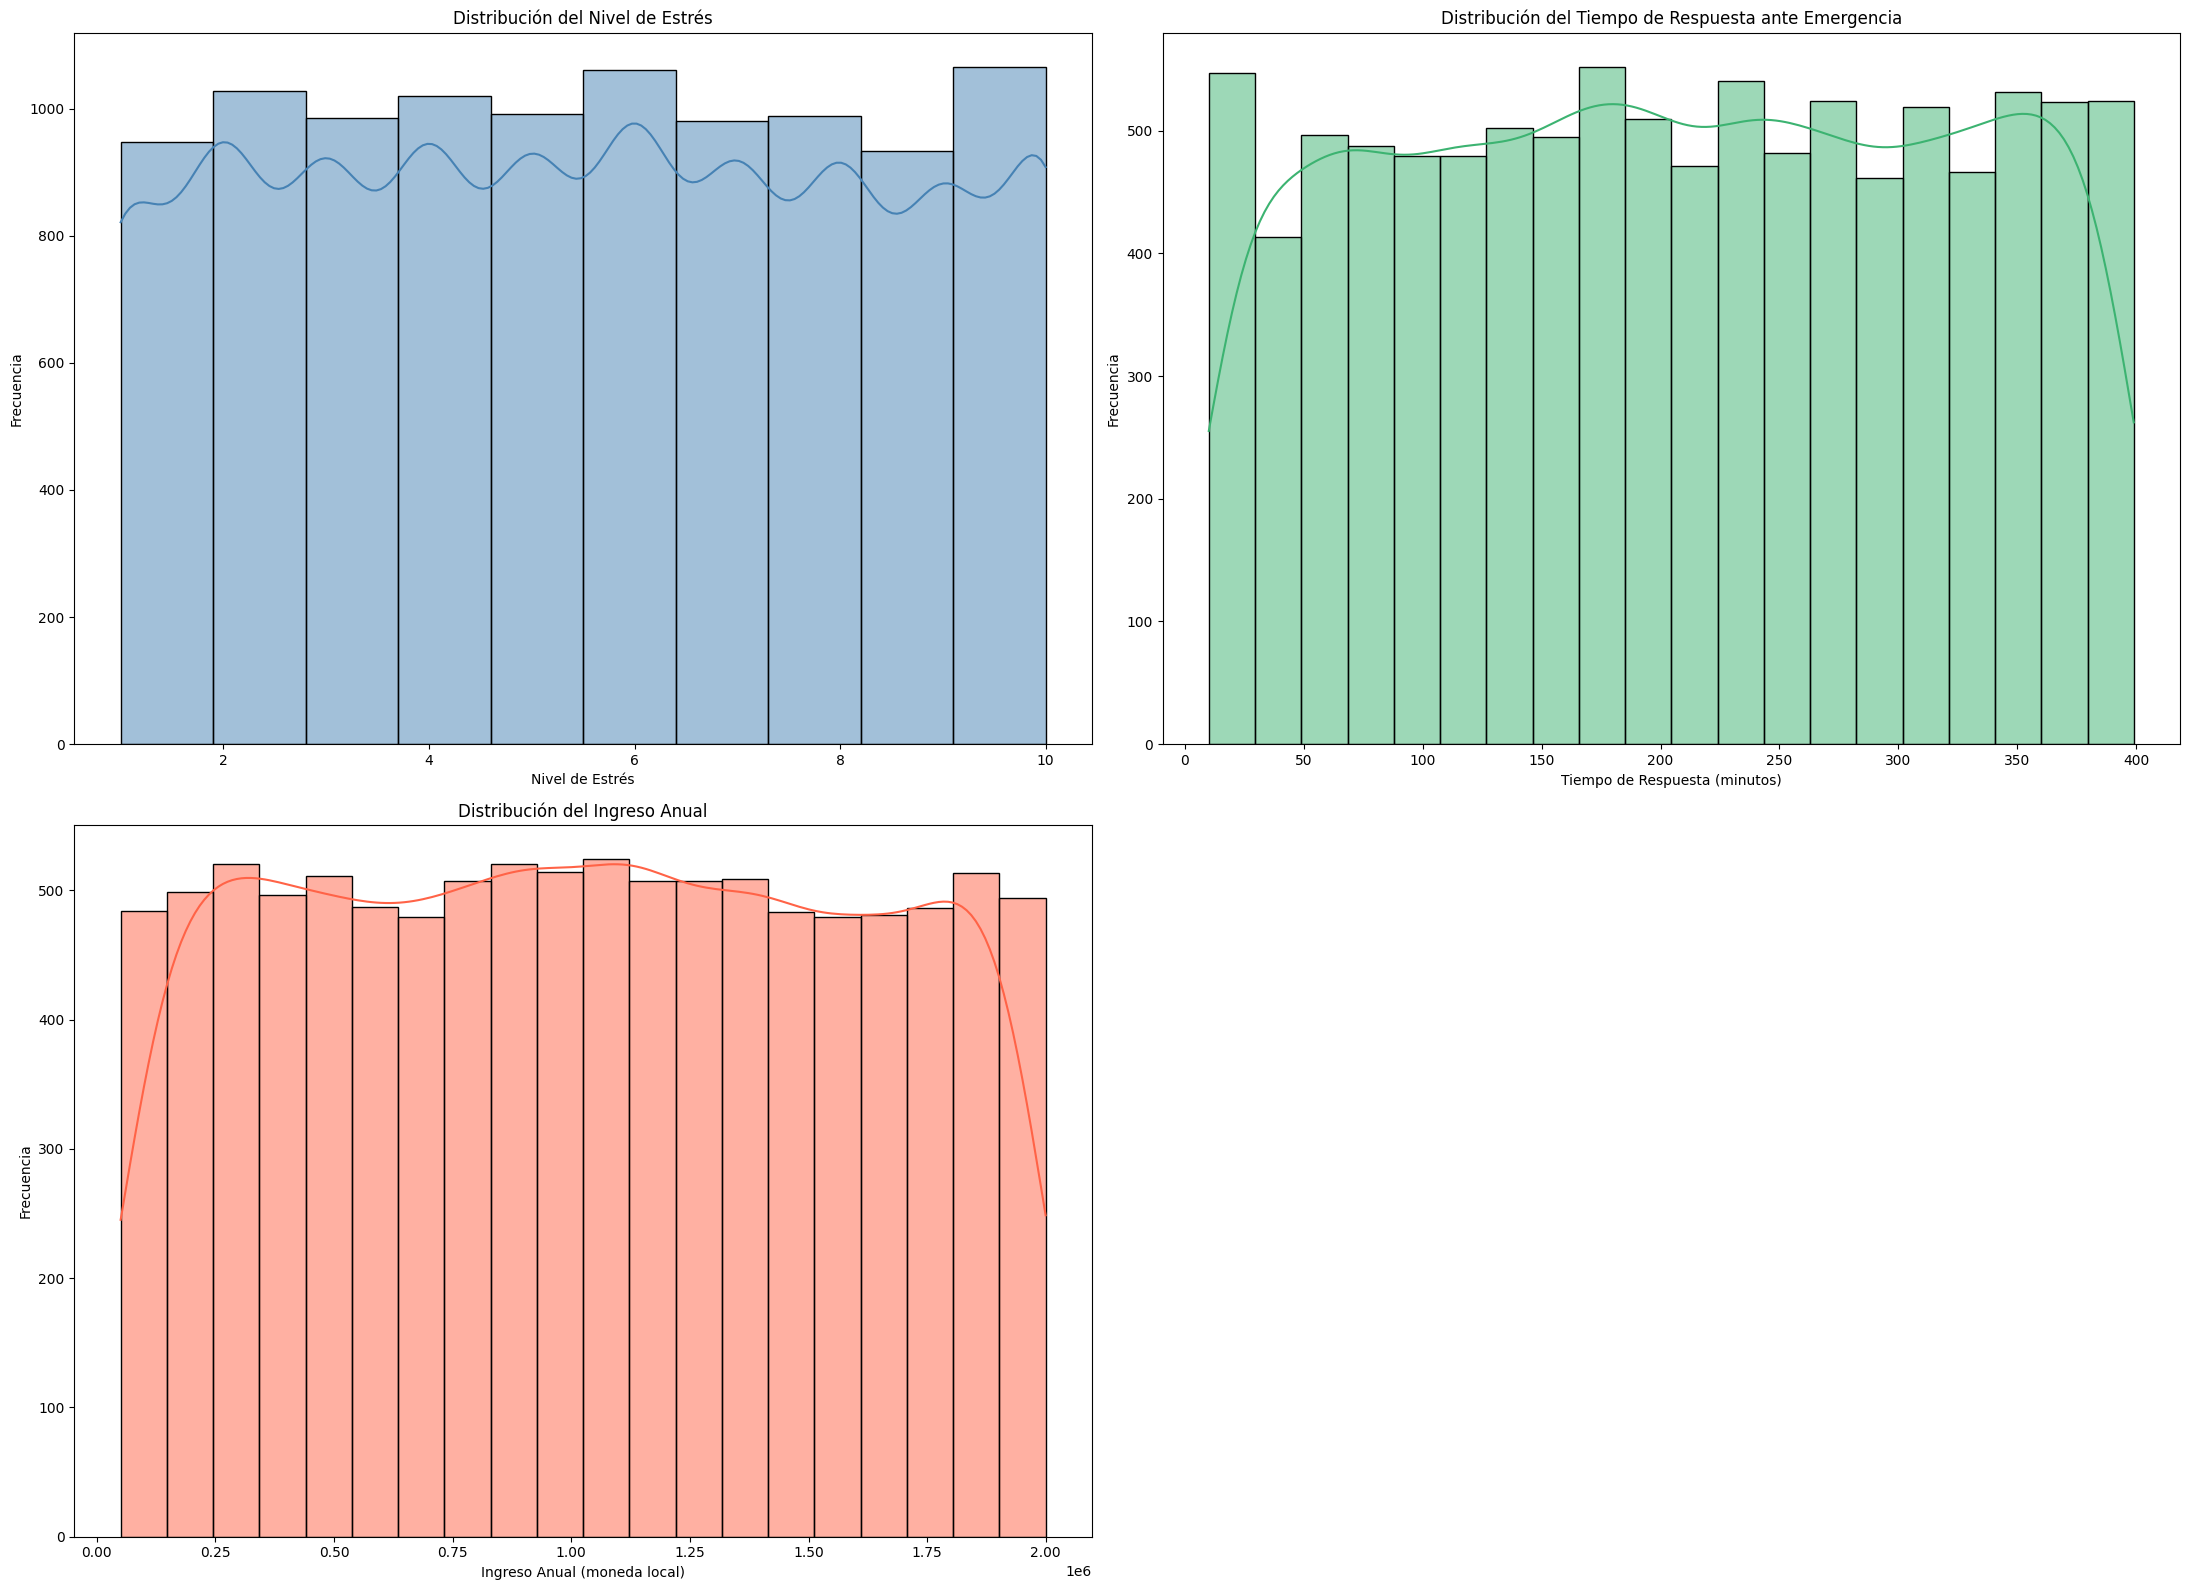

GRÁFICO 1: Distribución del Nivel de Estrés
    - Valor máximo de Estrés: 10
    - Valor medio de Estrés: 5.5188
    - Valor mediano de Estrés: 6.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Distribución del Tiempo de Respuesta ante Emergencia
    - Valor máximo del Tiempo de Respuesta: 399 minutos
    - Valor medio del Tiempo de Respuesta: 206.3834 minutos
    - Valor mediano del Tiempo de Respuesta: 206.0 minutos
---------------------------------------------------------------------------------------------
GRÁFICO 3: Distribución del Ingreso Anual
    - Valor máximo del Ingreso Anual: 1999714 rupias indias
    - Valor medio del Ingreso Anual: 1022062.1708 rupias indias
    - Valor mediano del Ingreso Anual: 1021383.0 rupias indias


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Gráfico 1: Nivel de Estrés
sns.histplot(data=heartAttackPrediction_India, x='Stress_Level', bins=10, kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Distribución del Nivel de Estrés')
axs[0, 0].set_xlabel('Nivel de Estrés')
axs[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Tiempo de Respuesta ante Emergencia
sns.histplot(data=heartAttackPrediction_India, x='Emergency_Response_Time', bins=20, kde=True, ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Distribución del Tiempo de Respuesta ante Emergencia')
axs[0, 1].set_xlabel('Tiempo de Respuesta (minutos)')
axs[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Ingreso Anual
sns.histplot(data=heartAttackPrediction_India, x='Annual_Income', bins=20, kde=True, ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Distribución del Ingreso Anual')
axs[1, 0].set_xlabel('Ingreso Anual (moneda local)')
axs[1, 0].set_ylabel('Frecuencia')

# Dejar el último gráfico en blanco
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Distribución del Nivel de Estrés')
print(f'    - Valor máximo de Estrés: {heartAttackPrediction_India["Stress_Level"].max()}')
print(f'    - Valor medio de Estrés: {heartAttackPrediction_India["Stress_Level"].mean()}')
print(f'    - Valor mediano de Estrés: {heartAttackPrediction_India["Stress_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Distribución del Tiempo de Respuesta ante Emergencia')
print(f'    - Valor máximo del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].max()} minutos')
print(f'    - Valor medio del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].mean()} minutos')
print(f'    - Valor mediano del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].median()} minutos')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Distribución del Ingreso Anual')
print(f'    - Valor máximo del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].max()} rupias indias')
print(f'    - Valor medio del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].mean()} rupias indias')
print(f'    - Valor mediano del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].median()} rupias indias')

---
---
---
---

## **DIAGRAMAS DE CAJA (BOXPLOTS) - DETECCIÓN DE OUTLIERS**

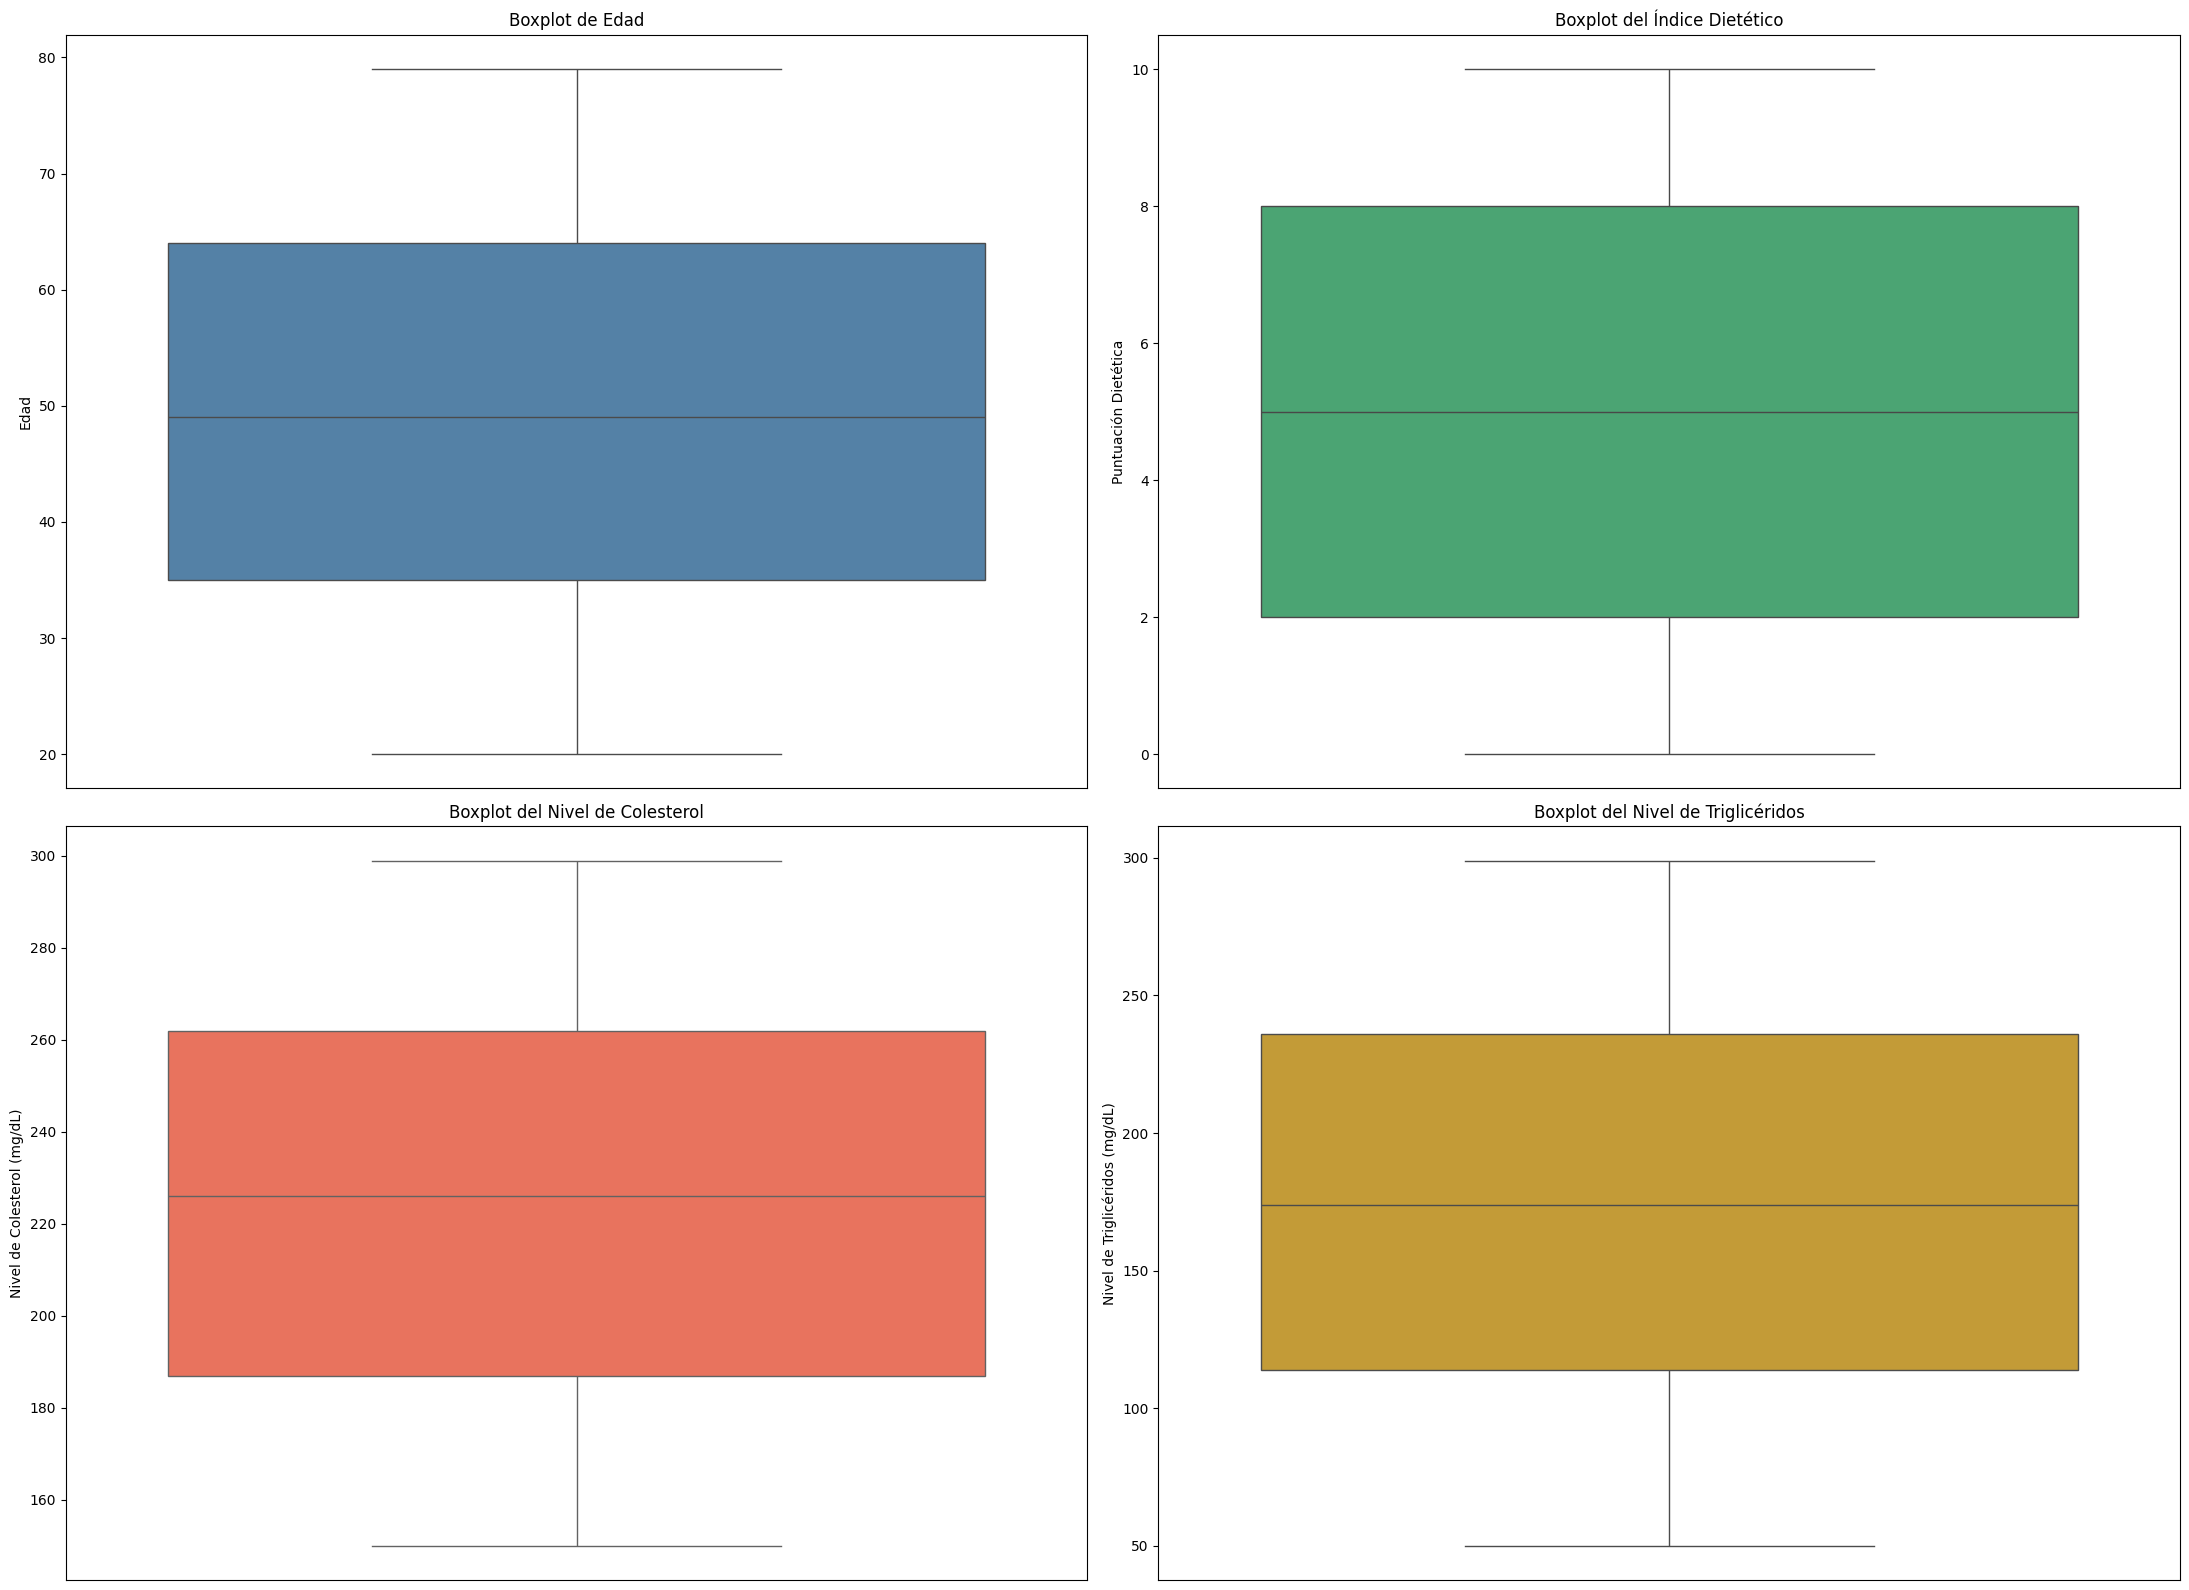

GRÁFICO 1: Boxplot de la Edad
    - Valor máximo de Edad: 79
    - Valor medio de Edad: 49.3949
    - Valor mediano de Edad: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Boxplot del Índice Dietético
    - Valor máximo del Índice Dietético: 10
    - Valor medio del Índice Dietético: 5.0217
    - Valor mediano del Índice Dietético: 5.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Boxplot del Nivel de Colesterol
    - Valor máximo del Nivel de Colesterol: 299
    - Valor medio del Nivel de Colesterol: 224.753
    - Valor mediano del Nivel de Colesterol: 226.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Boxplot del Nivel de Triglicéridos
    - Valor máximo del Nivel de Triglicéridos: 299
    - Valor medio del Nivel de Triglicéridos: 174.7333
    - Valor mediano del Nivel de Triglicéridos: 174.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Boxplot 1: Edad
sns.boxplot(data=heartAttackPrediction_India, y='Age', ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Boxplot de Edad')
axs[0, 0].set_ylabel('Edad')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks([])

# Boxplot 2: Índice Dietético
sns.boxplot(data=heartAttackPrediction_India, y='Diet_Score', ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Boxplot del Índice Dietético')
axs[0, 1].set_ylabel('Puntuación Dietética')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticks([])

# Boxplot 3: Colesterol
sns.boxplot(data=heartAttackPrediction_India, y='Cholesterol_Level', ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Boxplot del Nivel de Colesterol')
axs[1, 0].set_ylabel('Nivel de Colesterol (mg/dL)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticks([])

# Boxplot 4: Triglicéridos
sns.boxplot(data=heartAttackPrediction_India, y='Triglyceride_Level', ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Boxplot del Nivel de Triglicéridos')
axs[1, 1].set_ylabel('Nivel de Triglicéridos (mg/dL)')
axs[1, 1].set_xlabel('')
axs[1, 1].set_xticks([])

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Boxplot de la Edad')
print(f'    - Valor máximo de Edad: {heartAttackPrediction_India["Age"].max()}')
print(f'    - Valor medio de Edad: {heartAttackPrediction_India["Age"].mean()}')
print(f'    - Valor mediano de Edad: {heartAttackPrediction_India["Age"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Boxplot del Índice Dietético')
print(f'    - Valor máximo del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].max()}')
print(f'    - Valor medio del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].mean()}')
print(f'    - Valor mediano del Índice Dietético: {heartAttackPrediction_India["Diet_Score"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Boxplot del Nivel de Colesterol')
print(f'    - Valor máximo del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].max()}')
print(f'    - Valor medio del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Colesterol: {heartAttackPrediction_India["Cholesterol_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Boxplot del Nivel de Triglicéridos')
print(f'    - Valor máximo del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].max()}')
print(f'    - Valor medio del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].mean()}')
print(f'    - Valor mediano del Nivel de Triglicéridos: {heartAttackPrediction_India["Triglyceride_Level"].median()}')

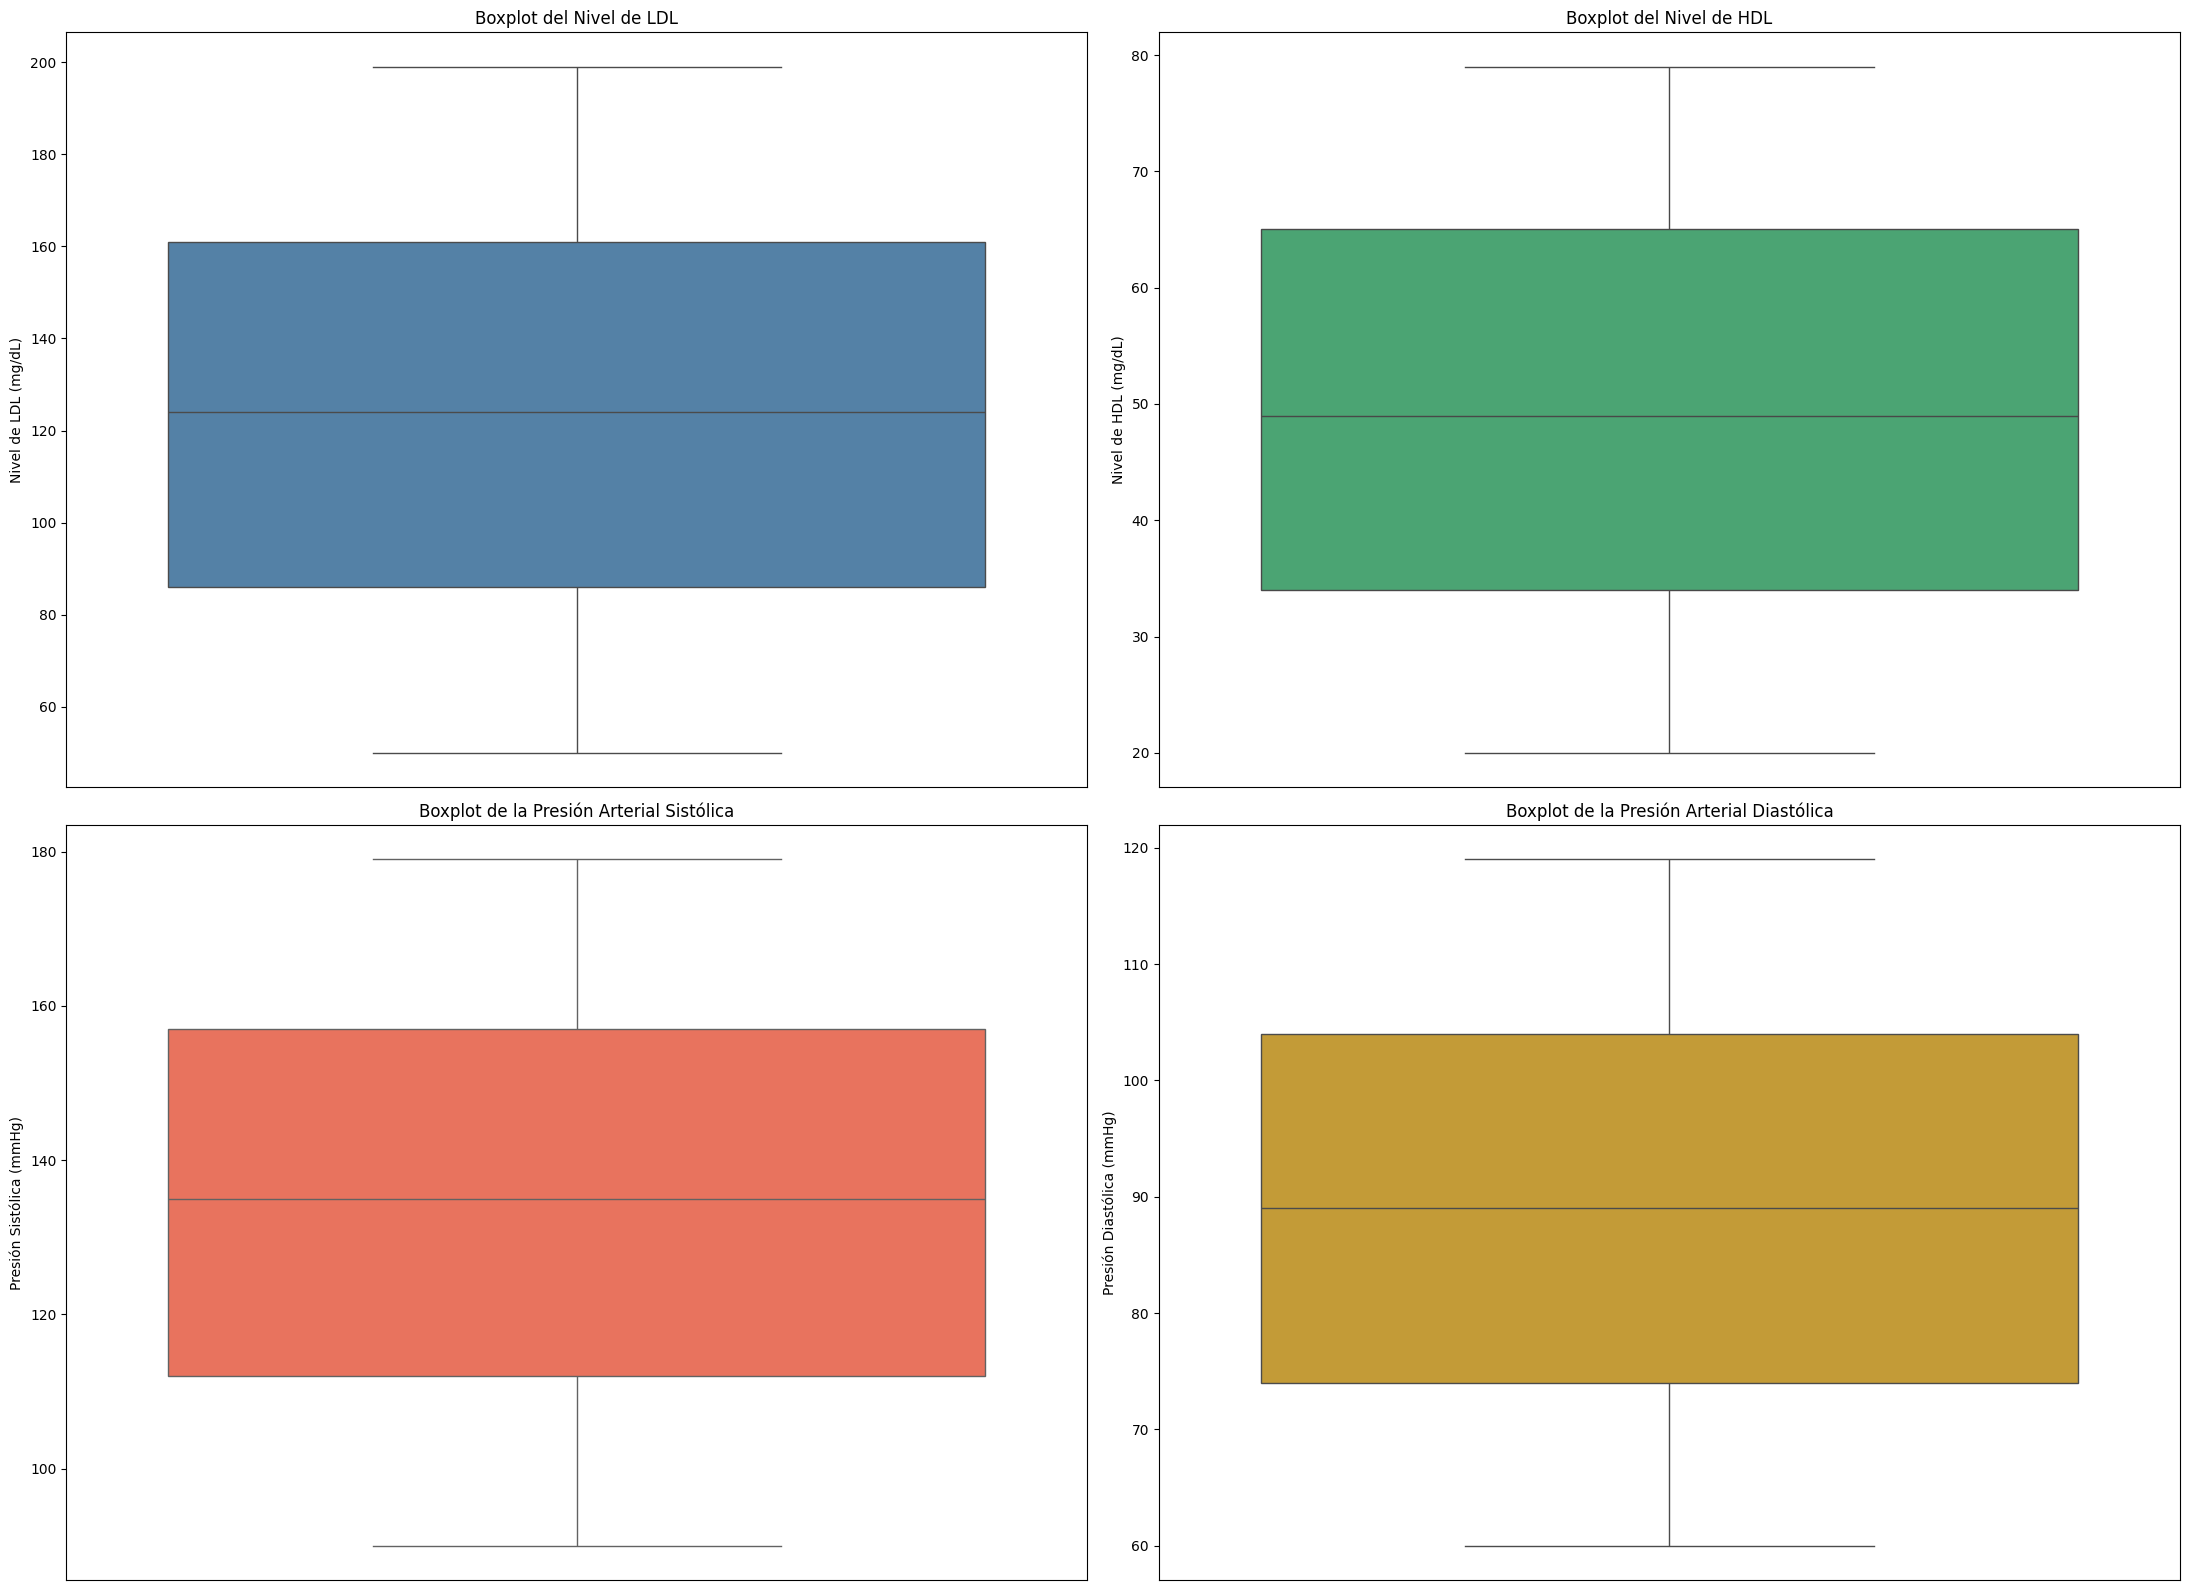

GRÁFICO 1: Boxplot del Nivel de LDL
    - Valor máximo de LDL: 199
    - Valor medio de LDL: 123.8721
    - Valor mediano de LDL: 124.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Boxplot del Nivel de HDL
    - Valor máximo de HDL: 79
    - Valor medio de HDL: 49.3355
    - Valor mediano de HDL: 49.0
---------------------------------------------------------------------------------------------
GRÁFICO 3: Boxplot de la Presión Arterial Sistólica
    - Valor máximo de Presión Sistólica: 179
    - Valor medio de Presión Sistólica: 134.7259
    - Valor mediano de Presión Sistólica: 135.0
---------------------------------------------------------------------------------------------
GRÁFICO 4: Boxplot de la Presión Arterial Diastólica
    - Valor máximo de Presión Diastólica: 119
    - Valor medio de Presión Diastólica: 89.312
    - Valor mediano de Presión Diastólica: 89.0


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Boxplot 1: LDL
sns.boxplot(data=heartAttackPrediction_India, y='LDL_Level', ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Boxplot del Nivel de LDL')
axs[0, 0].set_ylabel('Nivel de LDL (mg/dL)')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks([])

# Boxplot 2: HDL
sns.boxplot(data=heartAttackPrediction_India, y='HDL_Level', ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Boxplot del Nivel de HDL')
axs[0, 1].set_ylabel('Nivel de HDL (mg/dL)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticks([])

# Boxplot 3: Presión Arterial Sistólica
sns.boxplot(data=heartAttackPrediction_India, y='Systolic_BP', ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Boxplot de la Presión Arterial Sistólica')
axs[1, 0].set_ylabel('Presión Sistólica (mmHg)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticks([])

# Boxplot 4: Presión Arterial Diastólica
sns.boxplot(data=heartAttackPrediction_India, y='Diastolic_BP', ax=axs[1, 1], color='goldenrod')
axs[1, 1].set_title('Boxplot de la Presión Arterial Diastólica')
axs[1, 1].set_ylabel('Presión Diastólica (mmHg)')
axs[1, 1].set_xlabel('')
axs[1, 1].set_xticks([])

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Boxplot del Nivel de LDL')
print(f'    - Valor máximo de LDL: {heartAttackPrediction_India["LDL_Level"].max()}')
print(f'    - Valor medio de LDL: {heartAttackPrediction_India["LDL_Level"].mean()}')
print(f'    - Valor mediano de LDL: {heartAttackPrediction_India["LDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Boxplot del Nivel de HDL')
print(f'    - Valor máximo de HDL: {heartAttackPrediction_India["HDL_Level"].max()}')
print(f'    - Valor medio de HDL: {heartAttackPrediction_India["HDL_Level"].mean()}')
print(f'    - Valor mediano de HDL: {heartAttackPrediction_India["HDL_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Boxplot de la Presión Arterial Sistólica')
print(f'    - Valor máximo de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].max()}')
print(f'    - Valor medio de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Sistólica: {heartAttackPrediction_India["Systolic_BP"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 4: Boxplot de la Presión Arterial Diastólica')
print(f'    - Valor máximo de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].max()}')
print(f'    - Valor medio de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].mean()}')
print(f'    - Valor mediano de Presión Diastólica: {heartAttackPrediction_India["Diastolic_BP"].median()}')


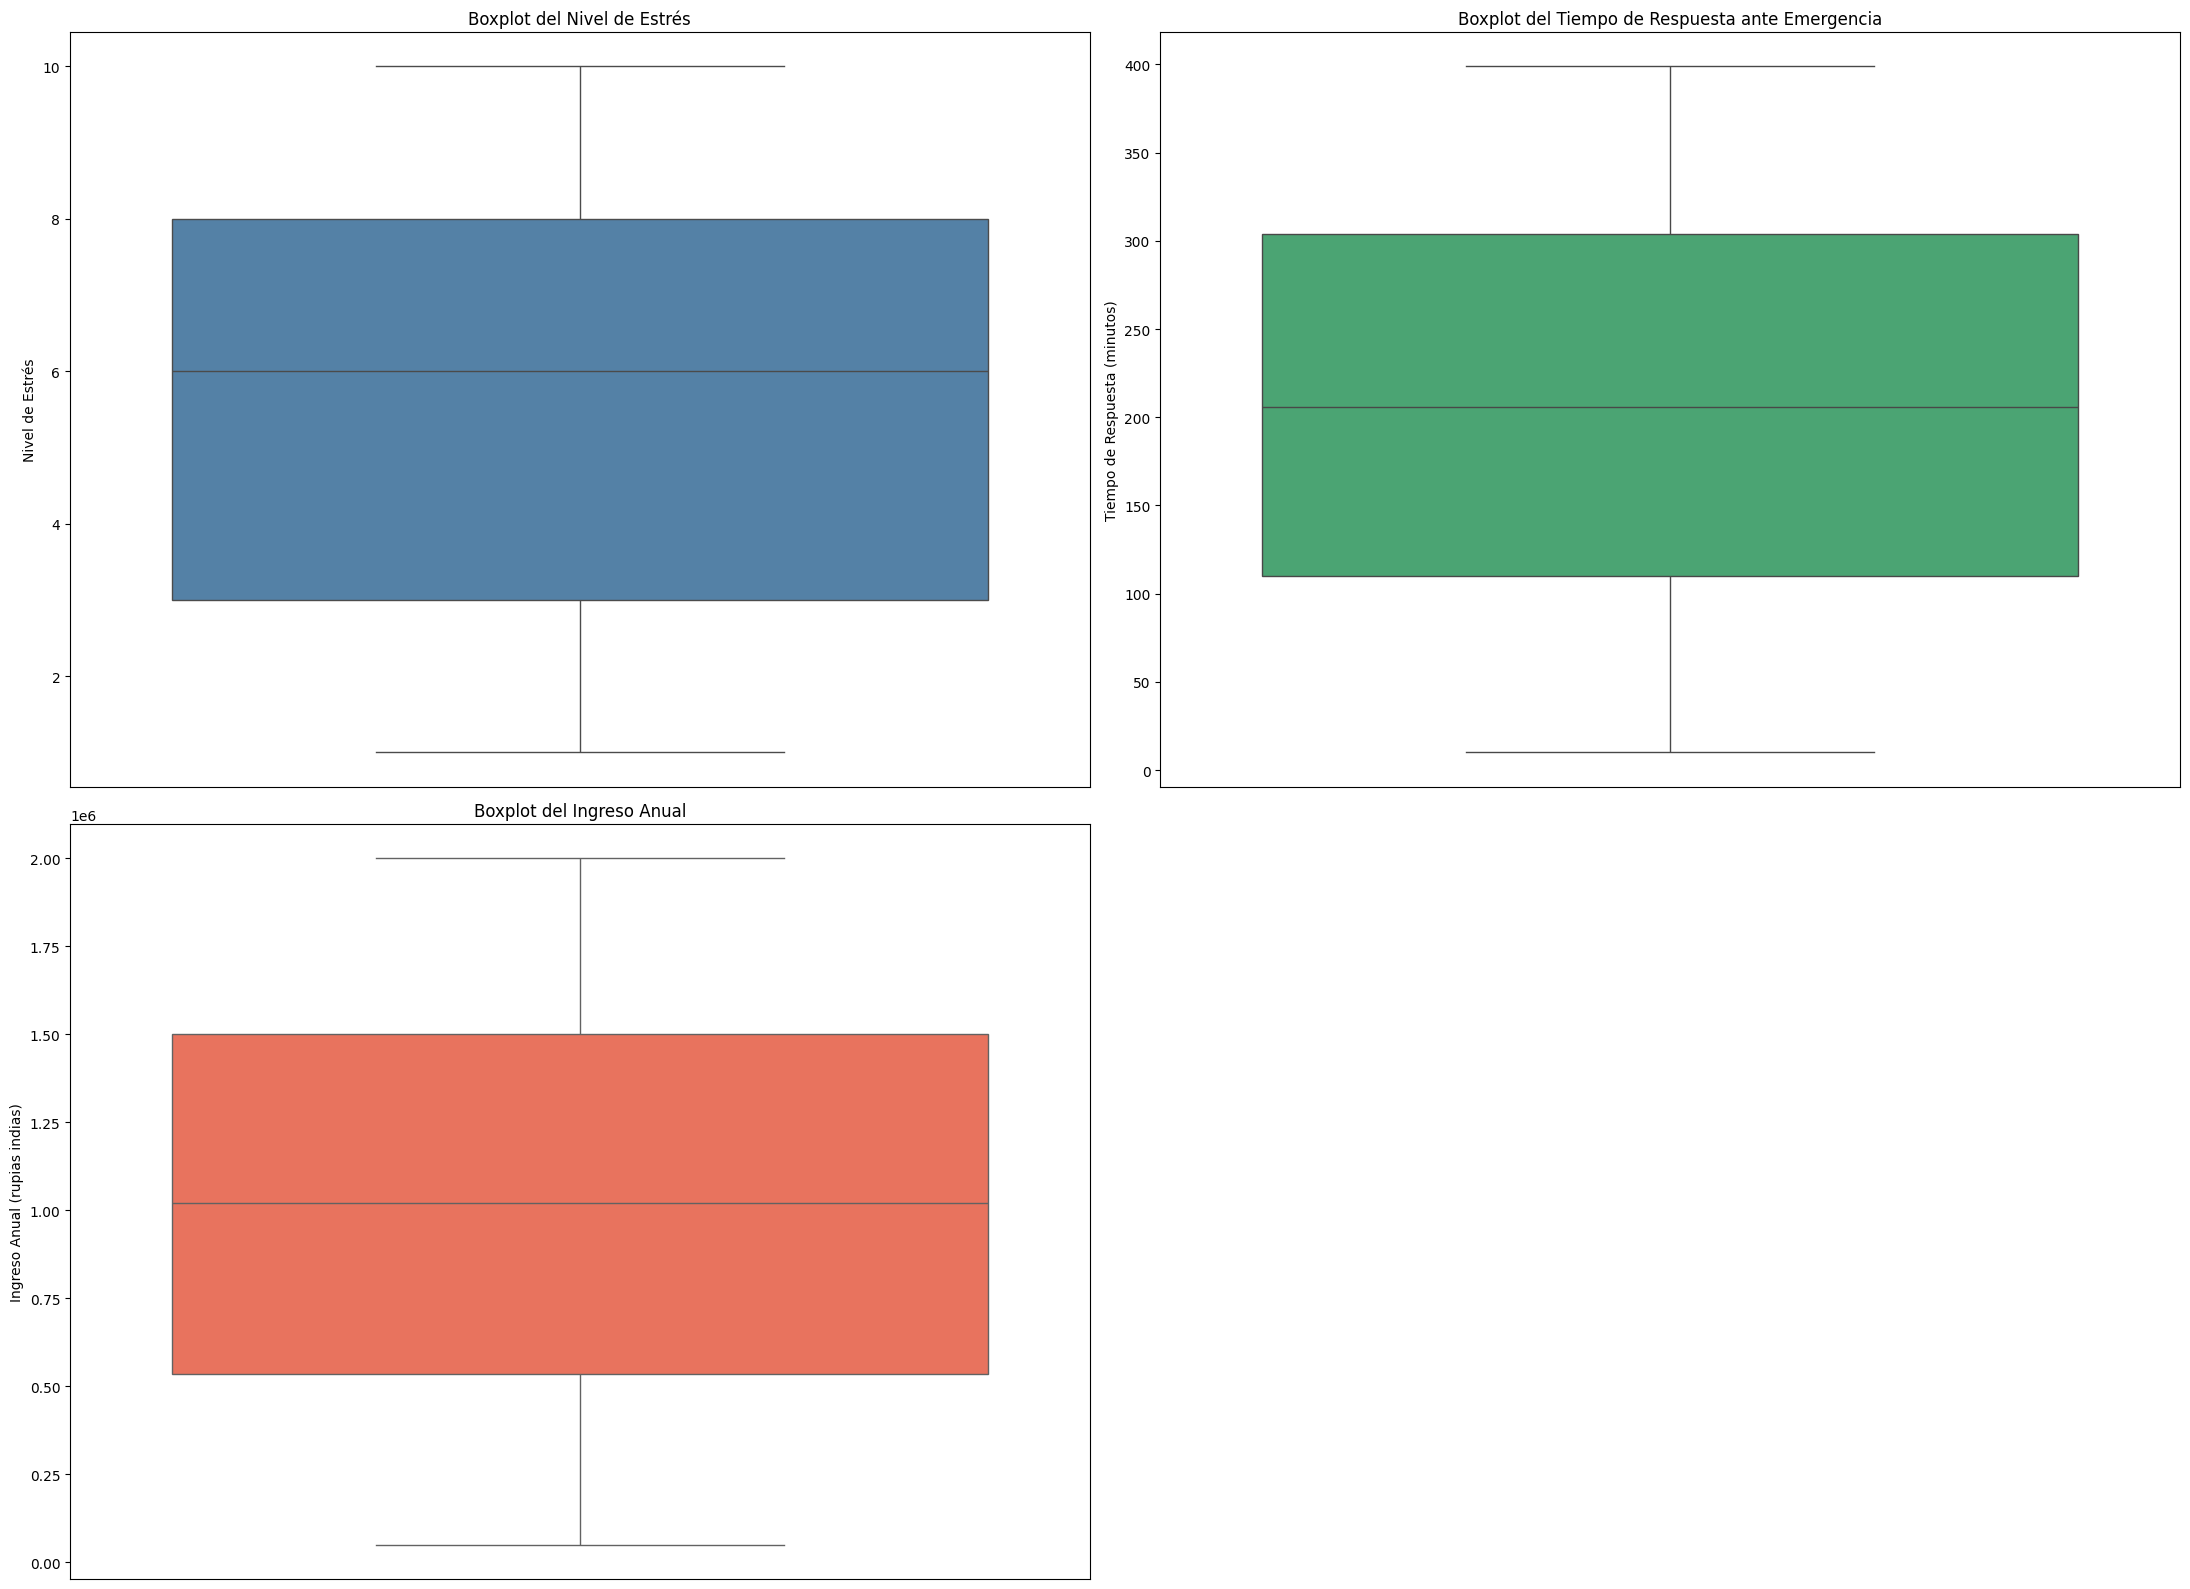

GRÁFICO 1: Boxplot del Nivel de Estrés
    - Valor máximo de Estrés: 10
    - Valor medio de Estrés: 5.5188
    - Valor mediano de Estrés: 6.0
---------------------------------------------------------------------------------------------
GRÁFICO 2: Boxplot del Tiempo de Respuesta ante Emergencia
    - Valor máximo del Tiempo de Respuesta: 399 minutos
    - Valor medio del Tiempo de Respuesta: 206.3834 minutos
    - Valor mediano del Tiempo de Respuesta: 206.0 minutos
---------------------------------------------------------------------------------------------
GRÁFICO 3: Boxplot del Ingreso Anual
    - Valor máximo del Ingreso Anual: 1999714 rupias indias
    - Valor medio del Ingreso Anual: 1022062.1708 rupias indias
    - Valor mediano del Ingreso Anual: 1021383.0 rupias indias


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(22, 16))

# Boxplot 1: Nivel de Estrés
sns.boxplot(data=heartAttackPrediction_India, y='Stress_Level', ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Boxplot del Nivel de Estrés')
axs[0, 0].set_ylabel('Nivel de Estrés')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks([])

# Boxplot 2: Tiempo de Respuesta ante Emergencia
sns.boxplot(data=heartAttackPrediction_India, y='Emergency_Response_Time', ax=axs[0, 1], color='mediumseagreen')
axs[0, 1].set_title('Boxplot del Tiempo de Respuesta ante Emergencia')
axs[0, 1].set_ylabel('Tiempo de Respuesta (minutos)')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticks([])

# Boxplot 3: Ingreso Anual
sns.boxplot(data=heartAttackPrediction_India, y='Annual_Income', ax=axs[1, 0], color='tomato')
axs[1, 0].set_title('Boxplot del Ingreso Anual')
axs[1, 0].set_ylabel('Ingreso Anual (rupias indias)')
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticks([])

# Dejar el último gráfico vacío
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

print('GRÁFICO 1: Boxplot del Nivel de Estrés')
print(f'    - Valor máximo de Estrés: {heartAttackPrediction_India["Stress_Level"].max()}')
print(f'    - Valor medio de Estrés: {heartAttackPrediction_India["Stress_Level"].mean()}')
print(f'    - Valor mediano de Estrés: {heartAttackPrediction_India["Stress_Level"].median()}')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 2: Boxplot del Tiempo de Respuesta ante Emergencia')
print(f'    - Valor máximo del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].max()} minutos')
print(f'    - Valor medio del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].mean()} minutos')
print(f'    - Valor mediano del Tiempo de Respuesta: {heartAttackPrediction_India["Emergency_Response_Time"].median()} minutos')
print('---------------------------------------------------------------------------------------------')
print('GRÁFICO 3: Boxplot del Ingreso Anual')
print(f'    - Valor máximo del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].max()} rupias indias')
print(f'    - Valor medio del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].mean()} rupias indias')
print(f'    - Valor mediano del Ingreso Anual: {heartAttackPrediction_India["Annual_Income"].median()} rupias indias')

---
---
---
---

## **DETECCIÓN DE OUTLIERS**

#### **MÉTODO DEL RANGO INTERCUARTÍLICO (IQR)**

In [ ]:
def detectar_outliers_IQR(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f'Variable: {columna}')
    print(f'  - Q1: {Q1}')
    print(f'  - Q3: {Q3}')
    print(f'  - IQR: {IQR}')
    print(f'  - Límite inferior: {limite_inferior}')
    print(f'  - Límite superior: {limite_superior}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

variables = ['Age', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP',
             'Cholesterol_Level', 'Triglyceride_Level', 'Stress_Level', 'Emergency_Response_Time', 'Annual_Income']

for var in variables:
    detectar_outliers_IQR(heartAttackPrediction_India, var)

Variable: Age
  - Q1: 35.0
  - Q3: 64.0
  - IQR: 29.0
  - Límite inferior: -8.5
  - Límite superior: 107.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Q1: 86.0
  - Q3: 161.0
  - IQR: 75.0
  - Límite inferior: -26.5
  - Límite superior: 273.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: HDL_Level
  - Q1: 34.0
  - Q3: 65.0
  - IQR: 31.0
  - Límite inferior: -12.5
  - Límite superior: 111.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Q1: 112.0
  - Q3: 157.0
  - IQR: 45.0
  - Límite inferior: 44.5
  - Límite superior: 224.5
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Q1: 74.0
  - Q3: 104.0
  - IQR: 30.0
  - Límite inferior: 29.0
  - Límite superior: 149.0
  - Total de outliers detectados: 0
------

#### **Z-score**

In [ ]:
from scipy.stats import zscore
import numpy as np

def detectar_outliers_zscore(df, columna, umbral=3):
    z_scores = zscore(df[columna])
    outliers = df[np.abs(z_scores) > umbral]
    
    print(f'Variable: {columna}')
    print(f'  - Media: {df[columna].mean()}')
    print(f'  - Desviación estándar: {df[columna].std()}')
    print(f'  - Umbral Z-score: ±{umbral}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

variables = ['Age', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP',
             'Cholesterol_Level', 'Triglyceride_Level', 'Stress_Level', 
             'Emergency_Response_Time', 'Annual_Income']

for var in variables:
    detectar_outliers_zscore(heartAttackPrediction_India, var)

Variable: Age
  - Media: 49.3949
  - Desviación estándar: 17.28030135360744
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Media: 123.8721
  - Desviación estándar: 43.41076584269281
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: HDL_Level
  - Media: 49.3355
  - Desviación estándar: 17.399896993704854
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Media: 134.7259
  - Desviación estándar: 25.849077095104708
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Media: 89.312
  - Desviación estándar: 17.39648584547975
  - Umbral Z-score: ±3
  - Total de outliers detectados: 0
-------------------------------------------------

#### **Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

def detectar_outliers_isolation_forest(df, columna, contamination=0.01):
    model = IsolationForest(contamination=contamination, random_state=42)
    df_filtered = df[[columna]].dropna()
    model.fit(df_filtered)
    df_filtered['outlier'] = model.predict(df_filtered)
    outliers = df_filtered[df_filtered['outlier'] == -1]
    
    print(f'Variable: {columna}')
    print(f'  - Contaminación estimada: {contamination}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

for var in variables:
    detectar_outliers_isolation_forest(heartAttackPrediction_India, var)

Variable: Age
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 77
------------------------------------------------------------
Variable: HDL_Level
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Cholesterol_Level
  - Contaminación estimada: 0.01
  - Total de outliers detectados: 70
------------------------------------------------------------
Variable: Triglyceride_Level
  - Contaminación estimada: 0.01
  - Total de outliers detecta

#### **Local Outlier Factor**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def detectar_outliers_lof(df, columna, n_neighbors=15):
    df_filtered = df[[columna]].dropna()
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    y_pred = lof.fit_predict(df_filtered)
    outliers = df_filtered[y_pred == -1]
    
    print(f'Variable: {columna}')
    print(f'  - Vecinos considerados: {n_neighbors}')
    print(f'  - Total de outliers detectados: {outliers.shape[0]}')
    print('------------------------------------------------------------')

for var in variables:
    detectar_outliers_lof(heartAttackPrediction_India, var)

Variable: Age
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: LDL_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: HDL_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Systolic_BP
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Diastolic_BP
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Cholesterol_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
------------------------------------------------------------
Variable: Triglyceride_Level
  - Vecinos considerados: 15
  - Total de outliers detectados: 0
-----------------------

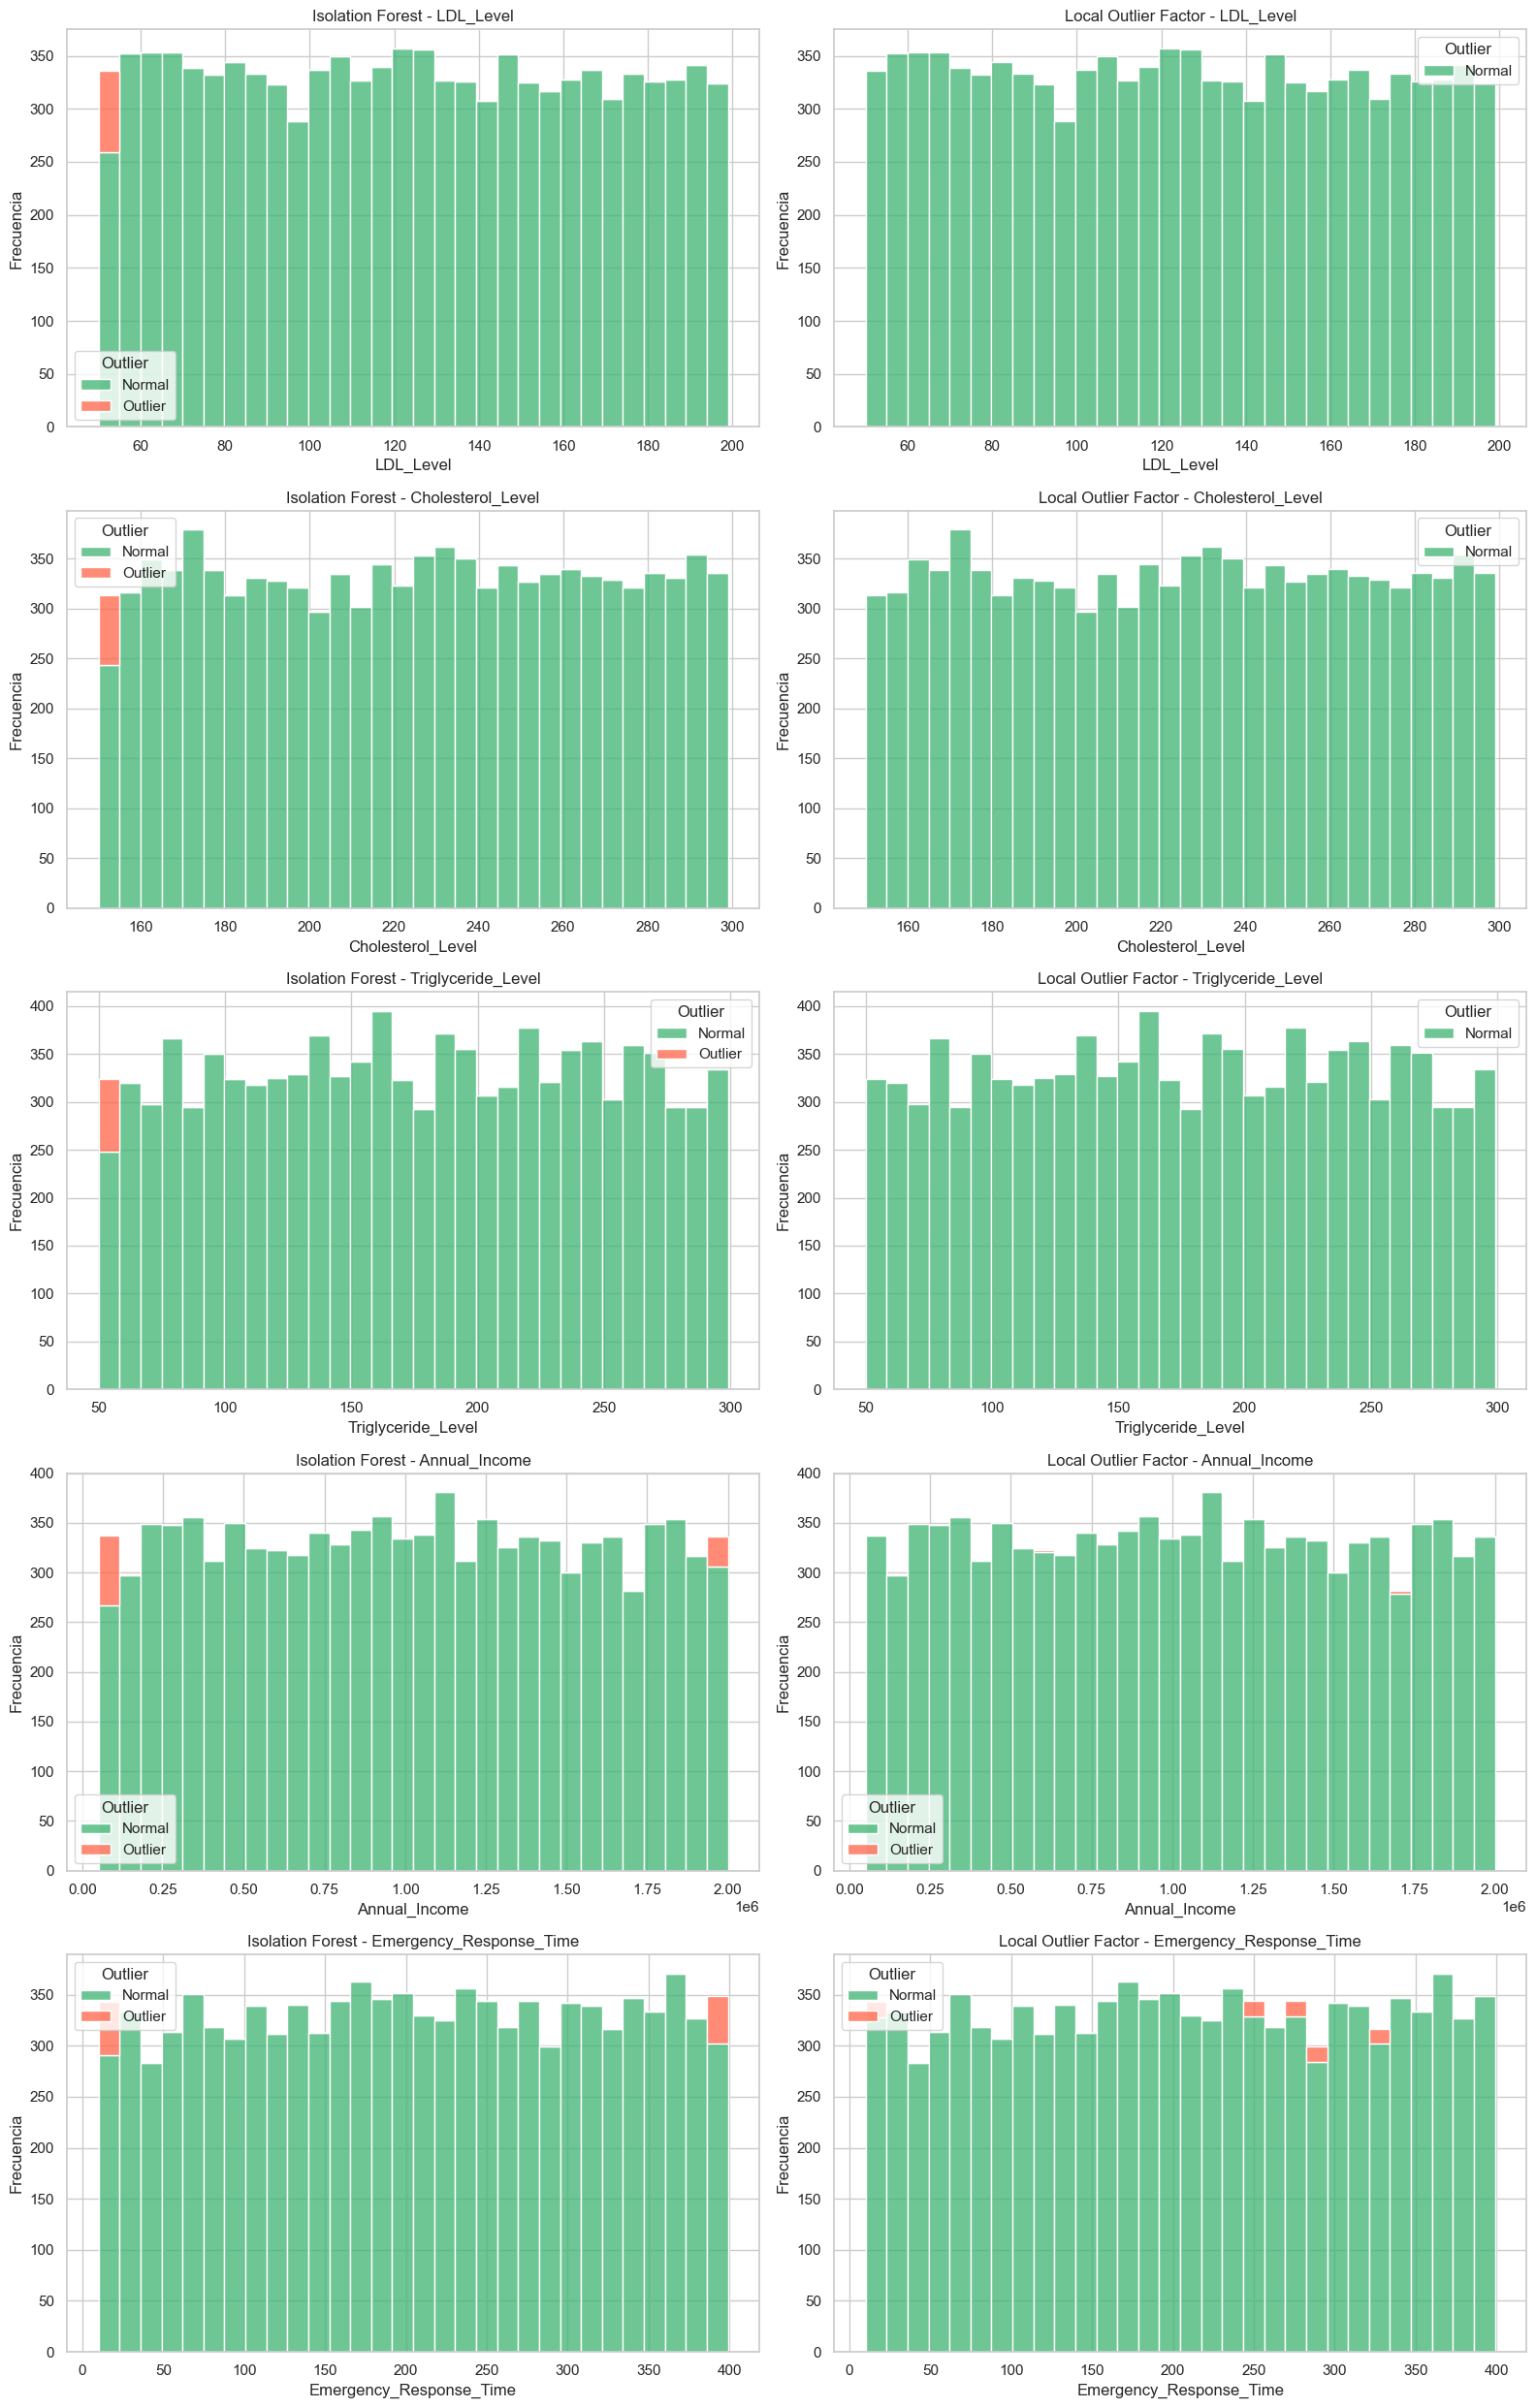

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Variables a evaluar
variables = ['LDL_Level', 'Cholesterol_Level', 'Triglyceride_Level', 'Annual_Income', 'Emergency_Response_Time']

# Crear figura con subplots (5 variables × 2 métodos = 10 subplots)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 25))
axs = axs.flatten()

# Iterar sobre cada variable y método
for i, var in enumerate(variables):
    # --- Isolation Forest ---
    df_iso = heartAttackPrediction_India[[var]].dropna().copy()
    iso = IsolationForest(contamination=0.01, random_state=42)
    df_iso['outlier'] = iso.fit_predict(df_iso[[var]])
    
    sns.histplot(
        data=df_iso, x=var, hue='outlier', multiple='stack',
        palette={1: 'mediumseagreen', -1: 'tomato'}, bins=30, ax=axs[i*2]
    )
    axs[i*2].set_title(f'Isolation Forest - {var}')
    axs[i*2].set_ylabel('Frecuencia')
    axs[i*2].legend(title='Outlier', labels=['Normal', 'Outlier'])

    # --- Local Outlier Factor ---
    df_lof = heartAttackPrediction_India[[var]].dropna().copy()
    lof = LocalOutlierFactor(n_neighbors=15)
    df_lof['outlier'] = lof.fit_predict(df_lof[[var]])

    sns.histplot(
        data=df_lof, x=var, hue='outlier', multiple='stack',
        palette={1: 'mediumseagreen', -1: 'tomato'}, bins=30, ax=axs[i*2+1]
    )
    axs[i*2+1].set_title(f'Local Outlier Factor - {var}')
    axs[i*2+1].set_ylabel('Frecuencia')
    axs[i*2+1].legend(title='Outlier', labels=['Normal', 'Outlier'])

plt.tight_layout()
plt.show()


---
---
---
---

## **Distribucion de las Variables**

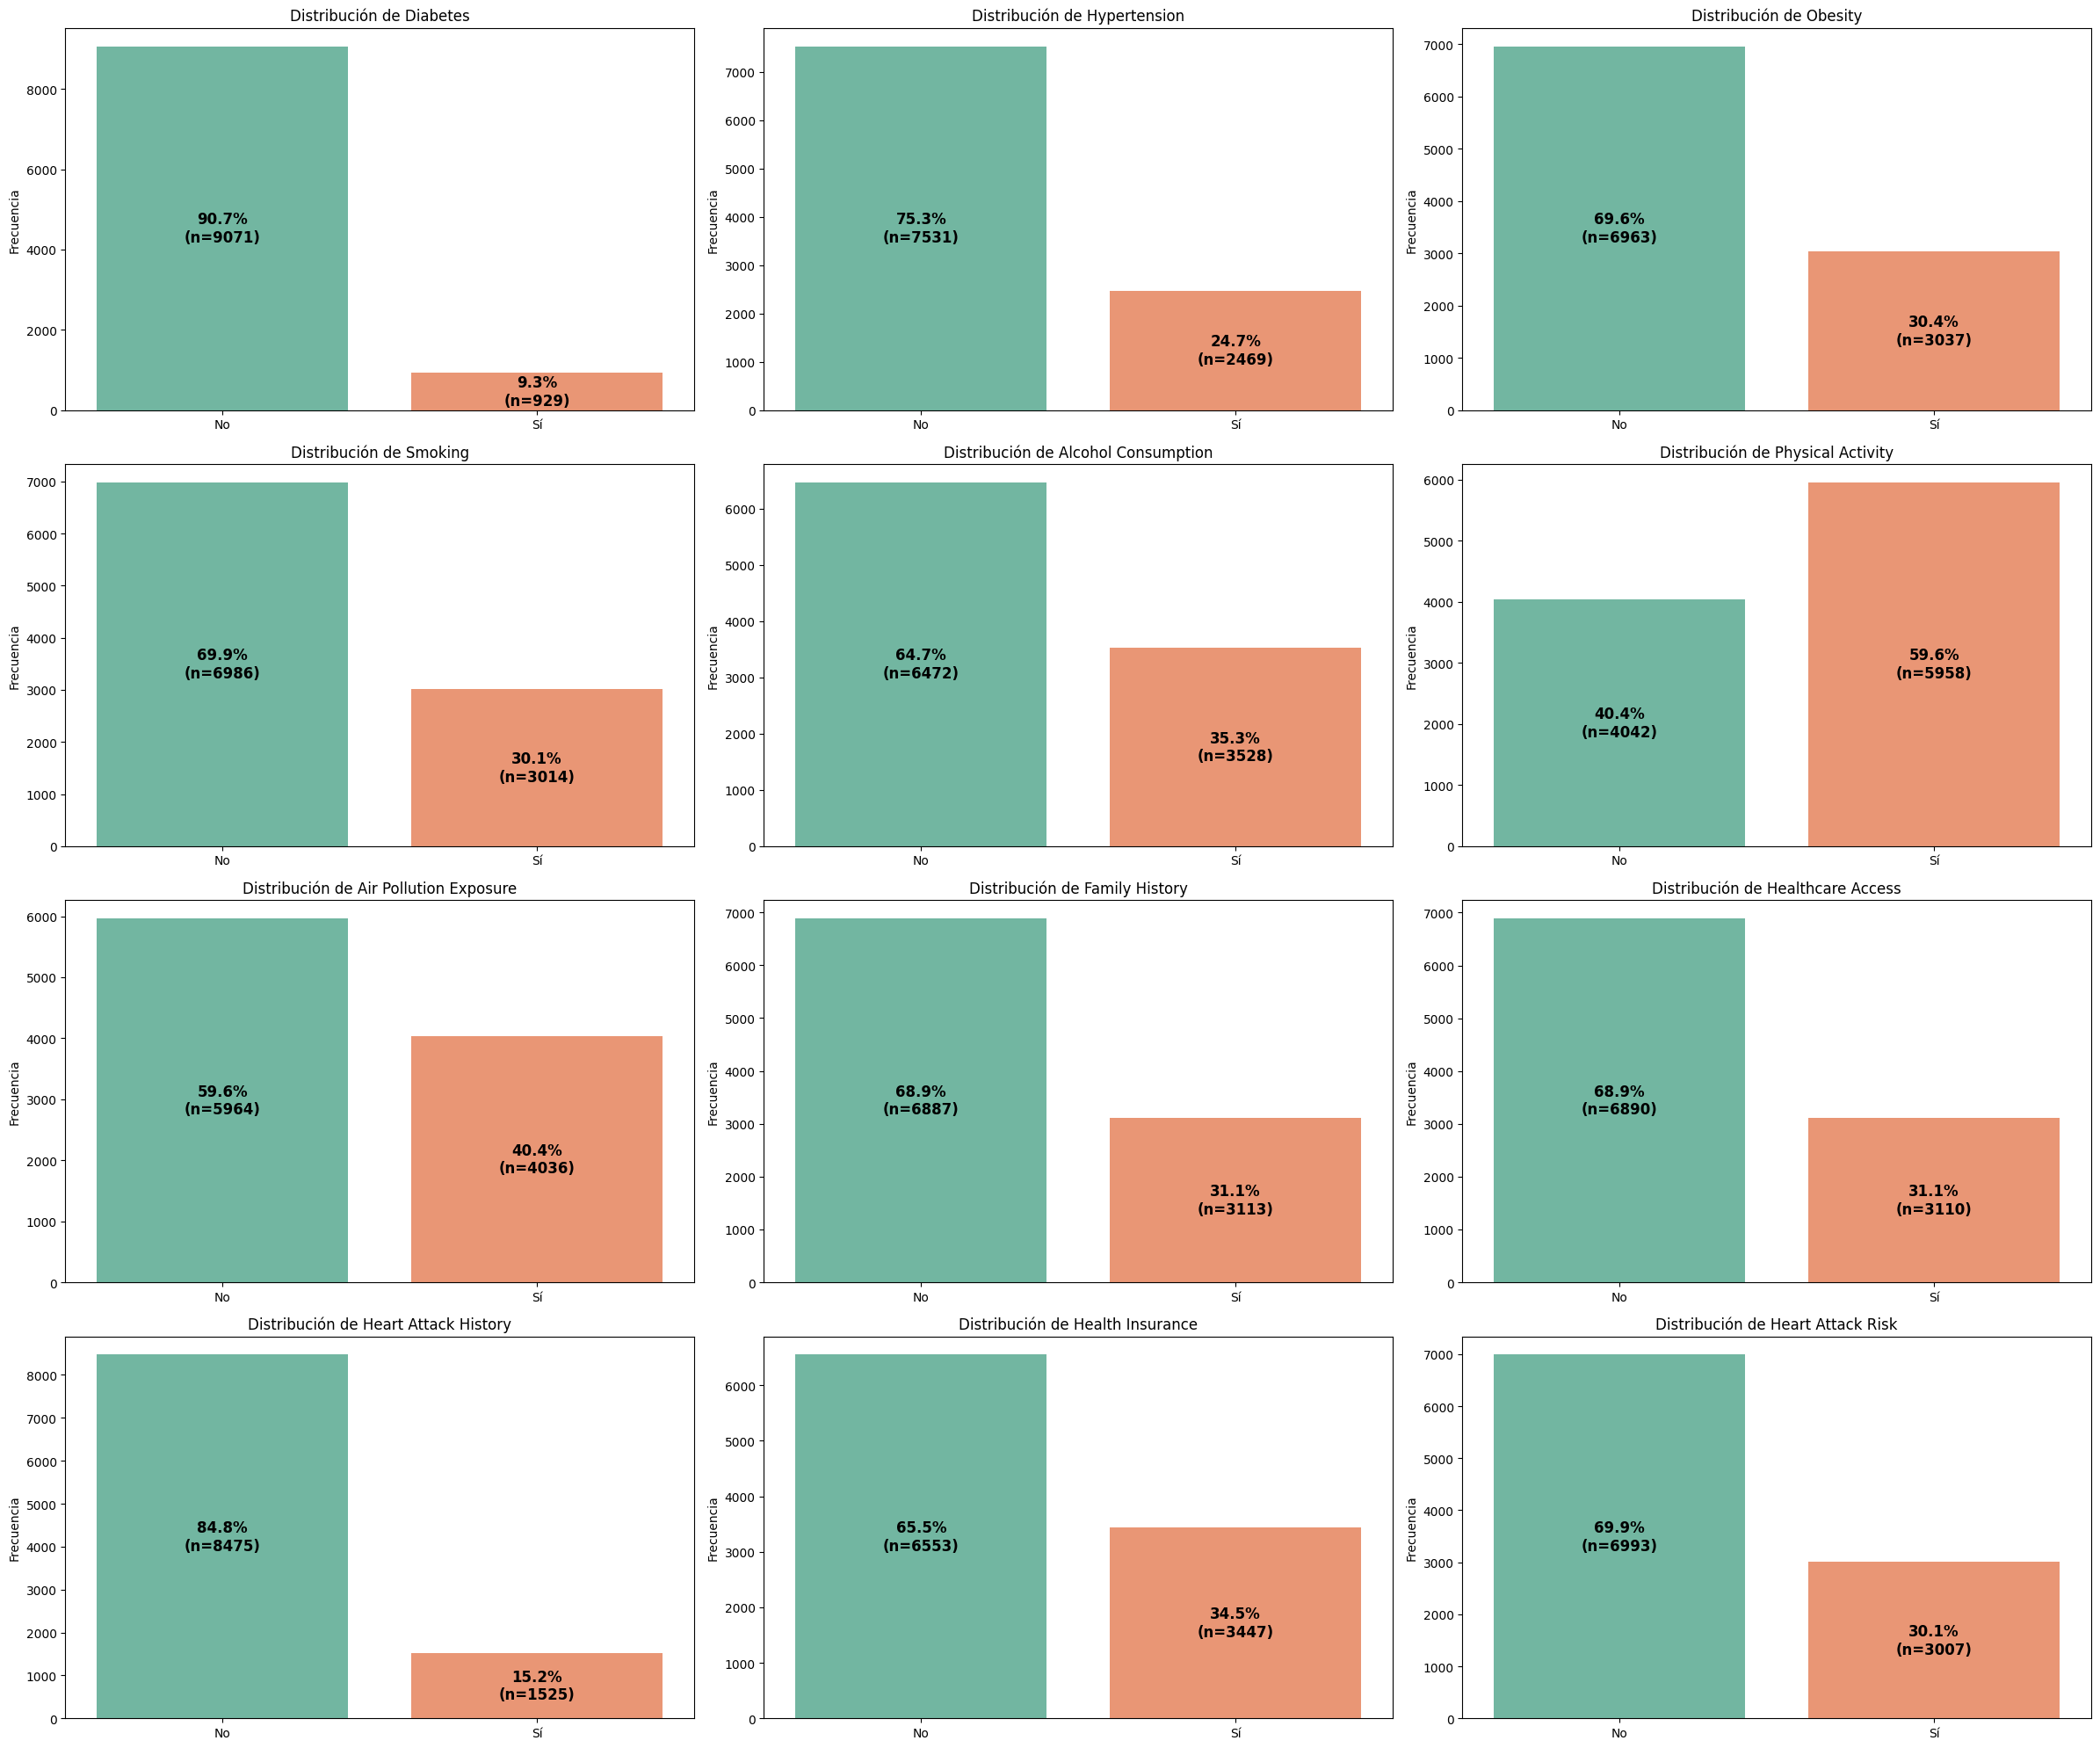

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables binarias
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Crear figura y ejes
fig, axs = plt.subplots(4, 3, figsize=(24, 20))
axs = axs.flatten()

# Total de registros
total = len(heartAttackPrediction_India)

# Recorrer variables
for i, var in enumerate(binary_vars):
    ax = axs[i]
    data = heartAttackPrediction_India[var].value_counts().sort_index()
    bars = sns.barplot(x=data.index, y=data.values, palette='Set2', ax=ax)

    ax.set_title(f'Distribución de {var.replace("_", " ")}')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Añadir porcentaje y n dentro de cada barra
    for j, count in enumerate(data.values):
        percentage = count / total * 100
        ax.text(j, count / 2,
                f'{percentage:.1f}%\n(n={count})',
                ha='center', va='center',
                fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()

#### **POR GENERO**

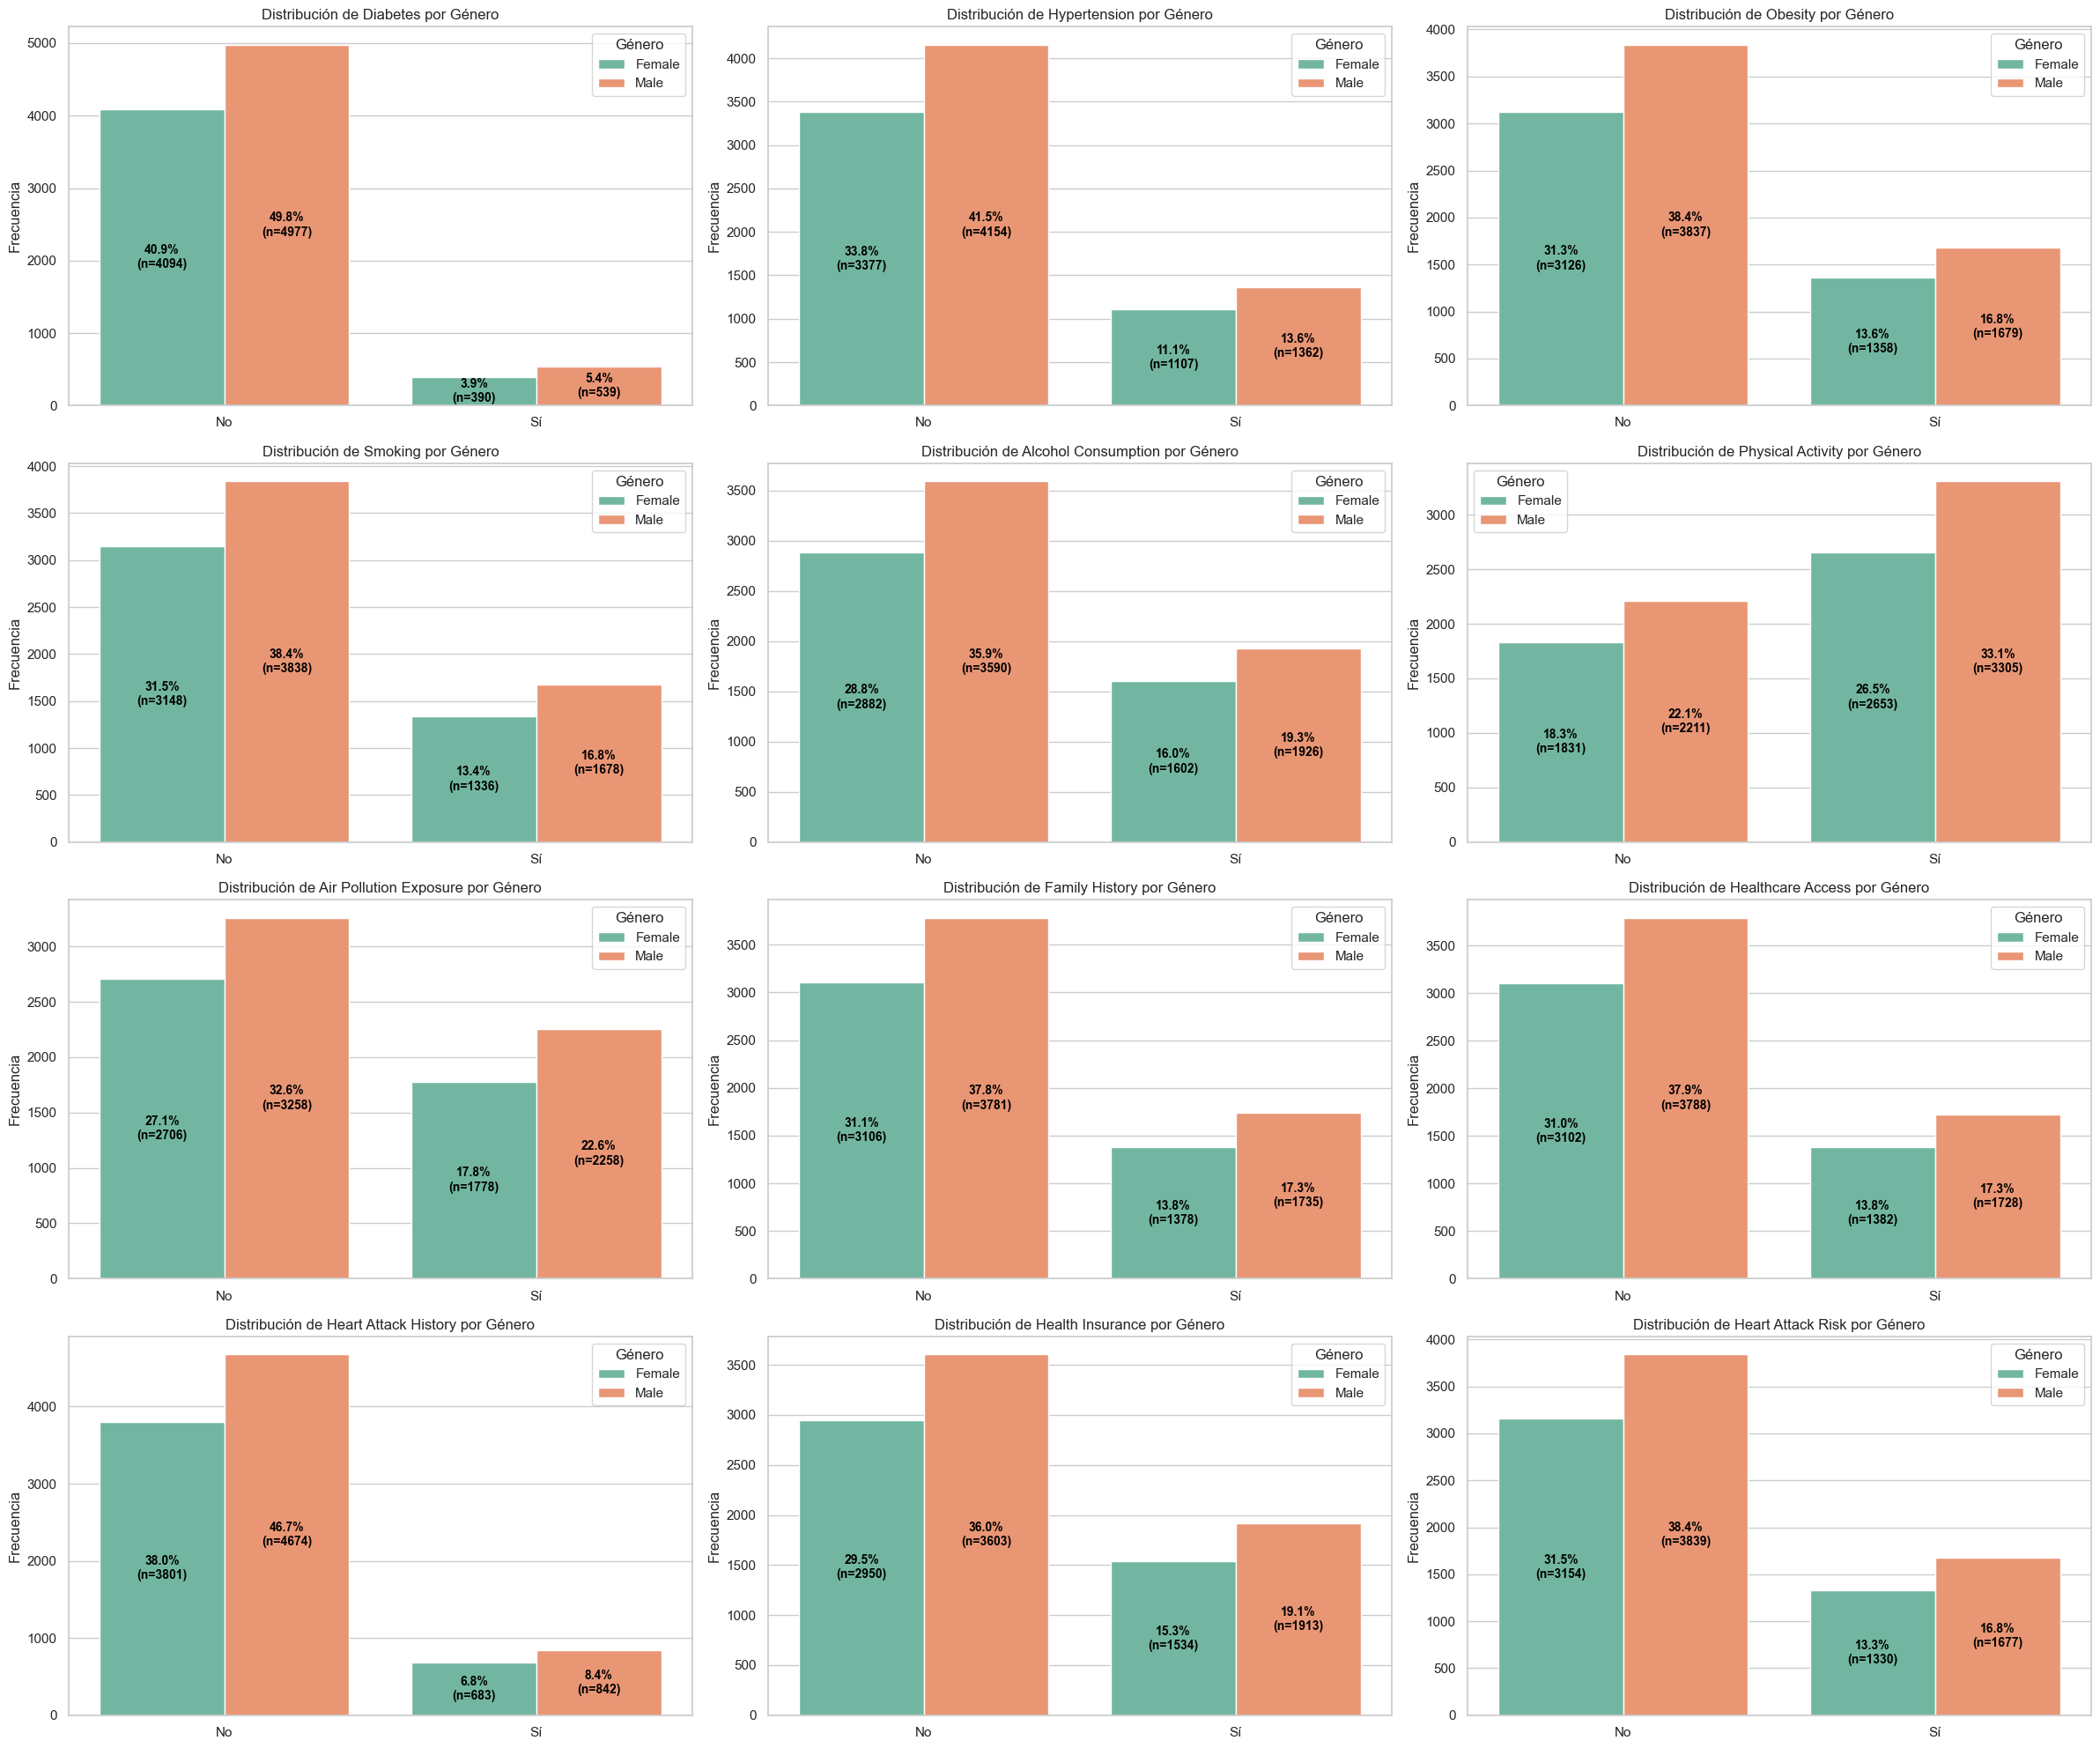

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables binarias
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Paleta fija: Female = verde, Male = naranja
gender_palette = {'Female': '#66c2a5', 'Male': '#fc8d62'}

# Total de pacientes
total_patients = len(heartAttackPrediction_India)

# Crear figura
fig, axs = plt.subplots(4, 3, figsize=(24, 20))
axs = axs.flatten()

for i, var in enumerate(binary_vars):
    ax = axs[i]

    # Agrupar y calcular porcentaje
    grouped = (
        heartAttackPrediction_India
        .groupby([var, 'Gender'])
        .size()
        .reset_index(name='count')
    )
    grouped['percentage'] = (grouped['count'] / total_patients * 100).round(1)

    # Asegurar orden correcto de categorías
    grouped[var] = pd.Categorical(grouped[var], categories=[0, 1], ordered=True)
    grouped['Gender'] = pd.Categorical(grouped['Gender'], categories=['Female', 'Male'], ordered=True)

    # Gráfico
    sns.barplot(data=grouped, x=var, y='count', hue='Gender', palette=gender_palette, ax=ax)
    ax.set_title(f'Distribución de {var.replace("_", " ")} por Género')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Ajustar manualmente la leyenda con el orden correcto
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=[handles[0], handles[1]], labels=['Female', 'Male'], title='Género')

    # Añadir etiquetas
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, f'{(height / total_patients) * 100:.1f}%\n(n={int(height)})',
                    ha='center', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

---
---

### **POR RIESGO DE ATAQUE AL CORAZÓN**

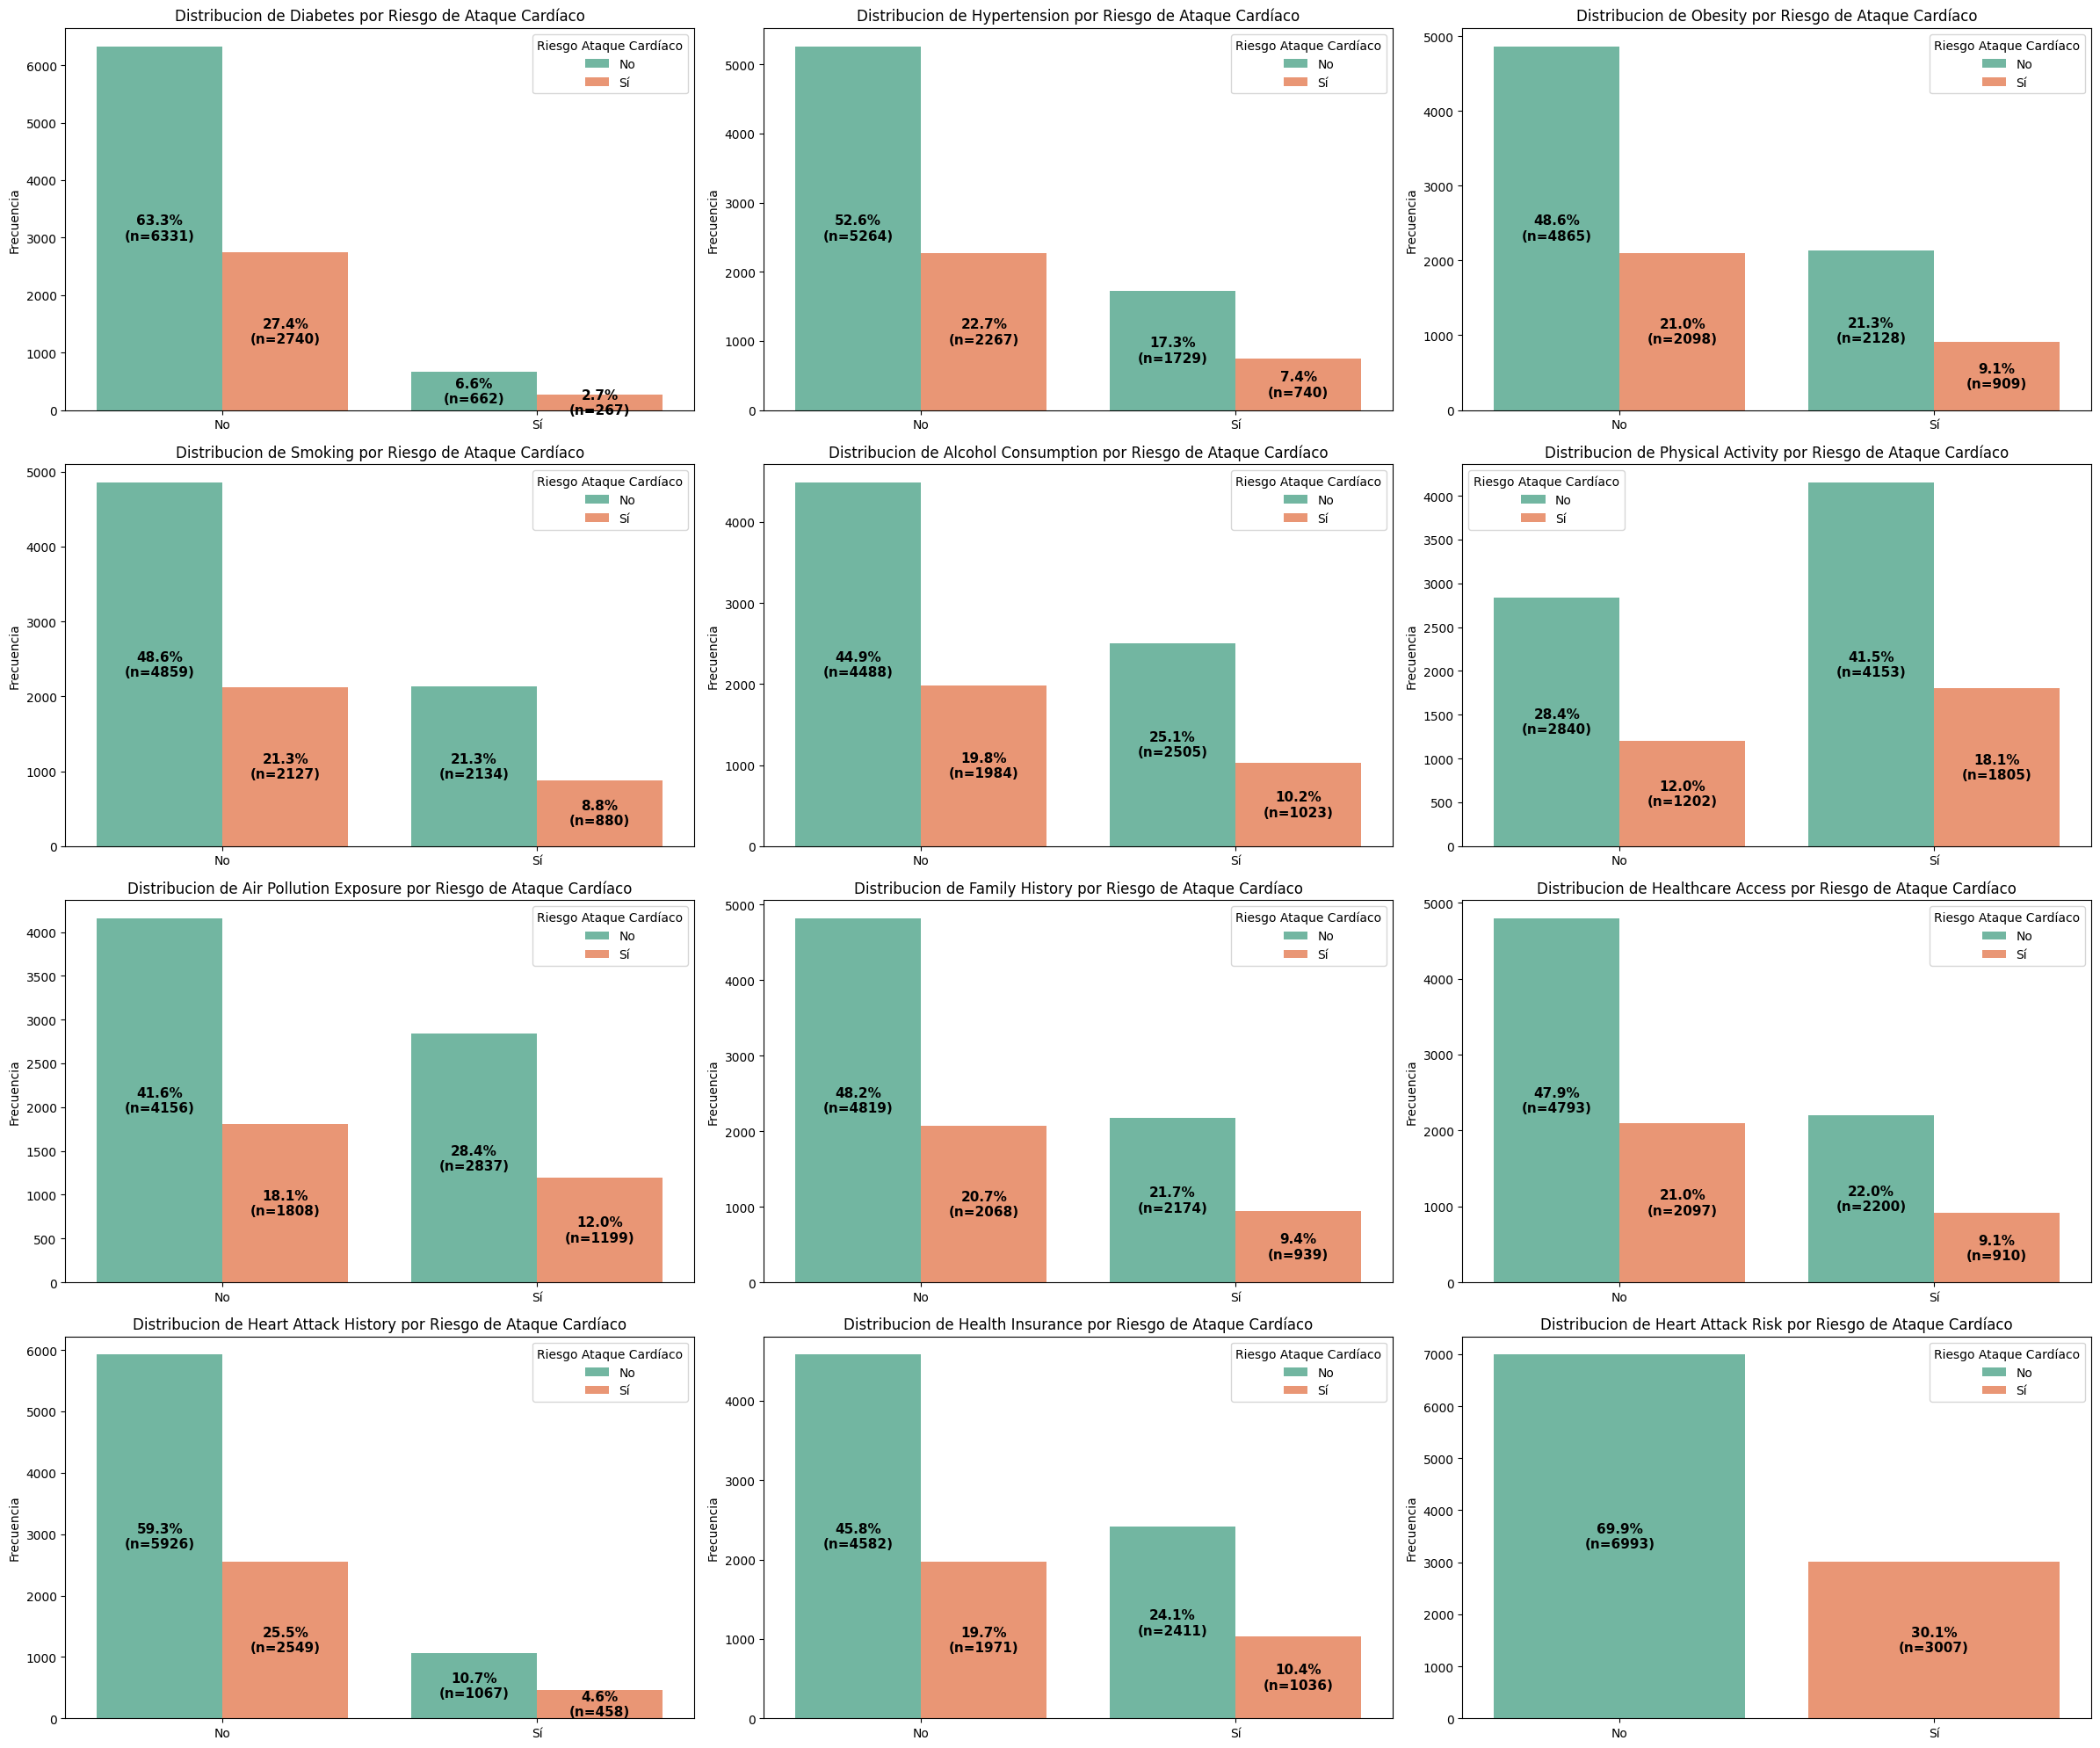

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables binarias
binary_vars = [
    'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History', 'Health_Insurance', 'Heart_Attack_Risk'
]

# Crear figura
fig, axs = plt.subplots(4, 3, figsize=(24, 20))
axs = axs.flatten()

# Conteo total de pacientes
total_patients = len(heartAttackPrediction_India)

for i, var in enumerate(binary_vars):
    ax = axs[i]

    sns.countplot(data=heartAttackPrediction_India, x=var, hue='Heart_Attack_Risk', palette='Set2', ax=ax)
    ax.set_title(f'Distribucion de {var.replace("_", " ")} por Riesgo de Ataque Cardíaco')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    ax.legend(title='Riesgo Ataque Cardíaco', labels=['No', 'Sí'])

    # Añadir porcentaje sobre total y número de pacientes
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            pct = height / total_patients * 100
            ax.text(x, y, f'{pct:.1f}%\n(n={int(height)})',
                    ha='center', va='center', fontsize=11,
                    color='black', weight='bold')

plt.tight_layout()
plt.show()

---
---
---
---

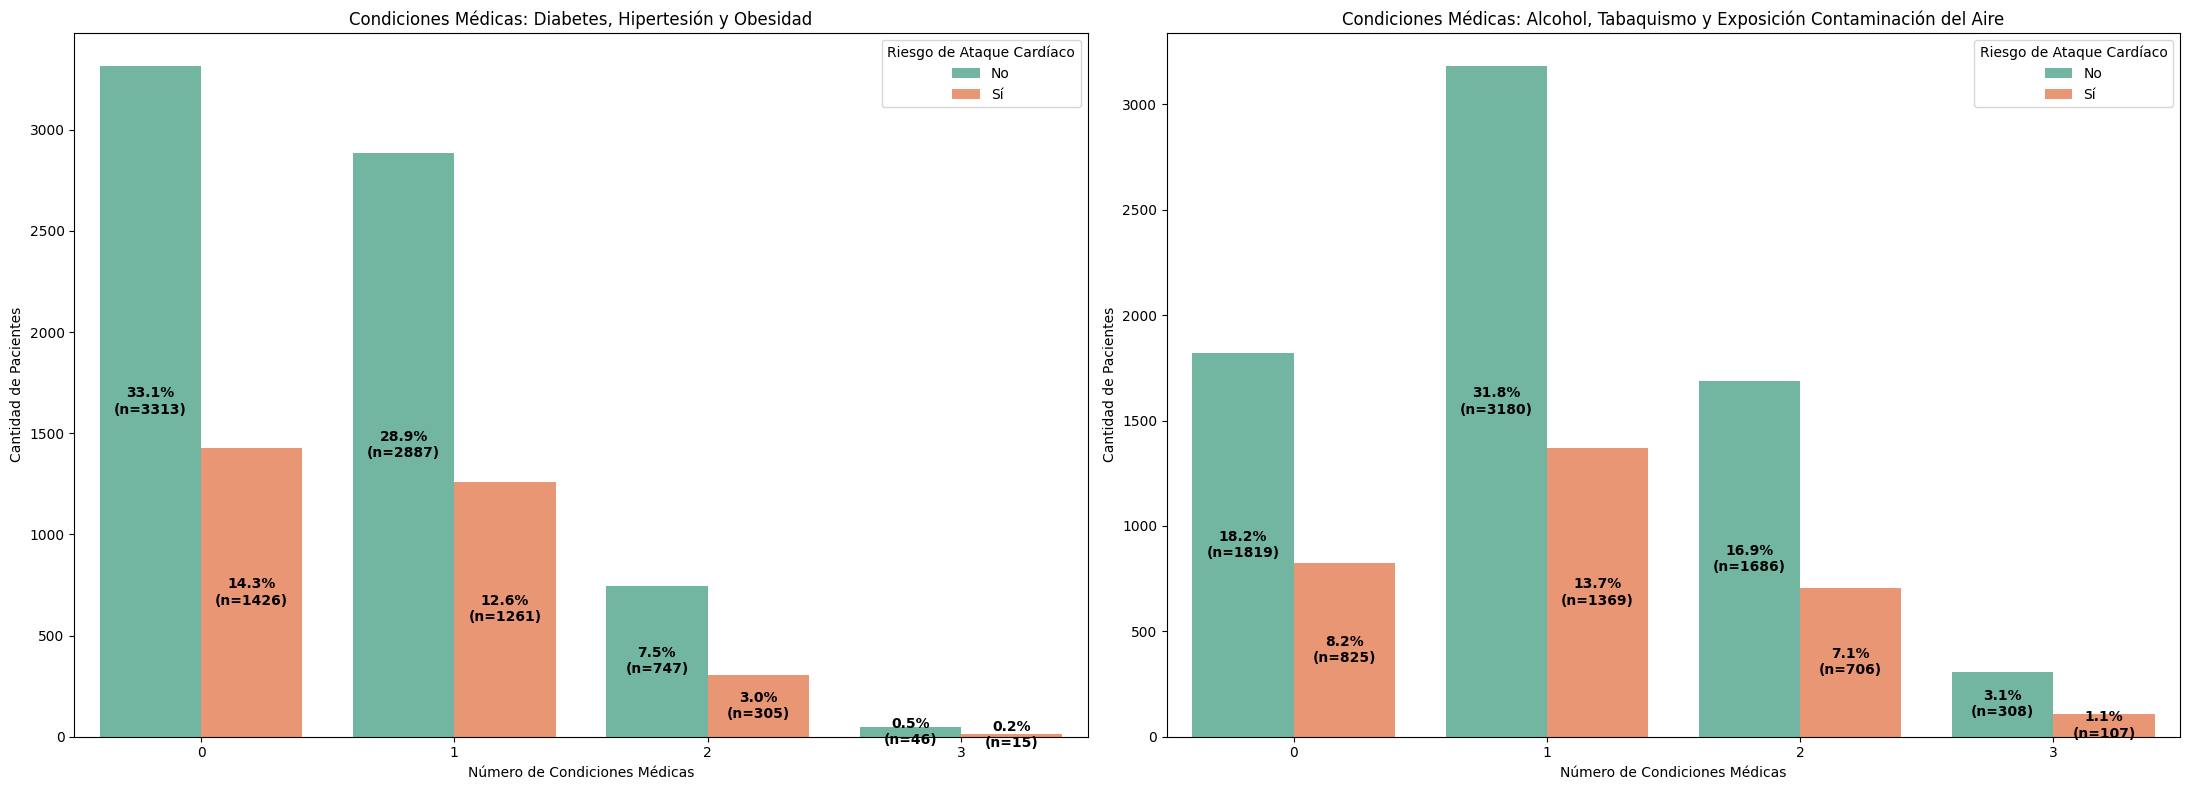

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear las variables combinadas
heartAttackPrediction_India['Condiciones_Medicas_1'] = (
    heartAttackPrediction_India['Diabetes'] + heartAttackPrediction_India['Hypertension'] + heartAttackPrediction_India['Obesity']
)
heartAttackPrediction_India['Condiciones_Medicas_2'] = (
    heartAttackPrediction_India['Alcohol_Consumption'] + heartAttackPrediction_India['Smoking'] + heartAttackPrediction_India['Air_Pollution_Exposure']
)

# Etiquetas para la leyenda
heartAttackPrediction_India['Heart_Attack_Risk_Label'] = heartAttackPrediction_India['Heart_Attack_Risk'].map({0: 'No', 1: 'Sí'})

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

# Función para graficar con etiquetas sobre el total de pacientes
def plot_bar_total_pct(ax, df, x_var, hue_var, title, xlabel, palette):
    # Agrupar datos
    grouped = df.groupby([x_var, hue_var]).size().reset_index(name='count')
    total_pacientes = grouped['count'].sum()
    grouped['percentage'] = (grouped['count'] / total_pacientes * 100).round(1)

    # Plot
    barplot = sns.barplot(data=grouped, x=x_var, y='count', hue=hue_var, palette=palette, ax=ax)

    # Añadir porcentajes y n
    for bar in barplot.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2

            # Obtener x e y originales
            cat = int(bar.get_x() + bar.get_width() / 2 + 0.5)
            label = bar.get_label()
            hue = bar.get_facecolor()

            # Determinar etiqueta 'No' o 'Sí' por el color
            hue_val = 'Sí' if hue[0] > 0.9 else 'No'

            # Buscar la fila correspondiente
            match = grouped[(grouped[x_var] == cat) & (grouped[hue_var] == hue_val)]
            if not match.empty:
                pct = match['percentage'].values[0]
                count = match['count'].values[0]
                ax.text(x, y, f'{pct:.1f}%\n(n={count})', ha='center', va='center', color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')
    ax.legend(title='Riesgo de Ataque Cardíaco', loc='upper right')

# Gráfico 1
plot_bar_total_pct(
    ax=axs[0],
    df=heartAttackPrediction_India,
    x_var='Condiciones_Medicas_1',
    hue_var='Heart_Attack_Risk_Label',
    title='Condiciones Médicas: Diabetes, Hipertesión y Obesidad',
    xlabel='Número de Condiciones Médicas',
    palette='Set2'
)

# Gráfico 2
plot_bar_total_pct(
    ax=axs[1],
    df=heartAttackPrediction_India,
    x_var='Condiciones_Medicas_2',
    hue_var='Heart_Attack_Risk_Label',
    title='Condiciones Médicas: Alcohol, Tabaquismo y Exposición Contaminación del Aire',
    xlabel='Número de Condiciones Médicas',
    palette='Set2'
)

plt.tight_layout()
plt.show()

---
---
---
---

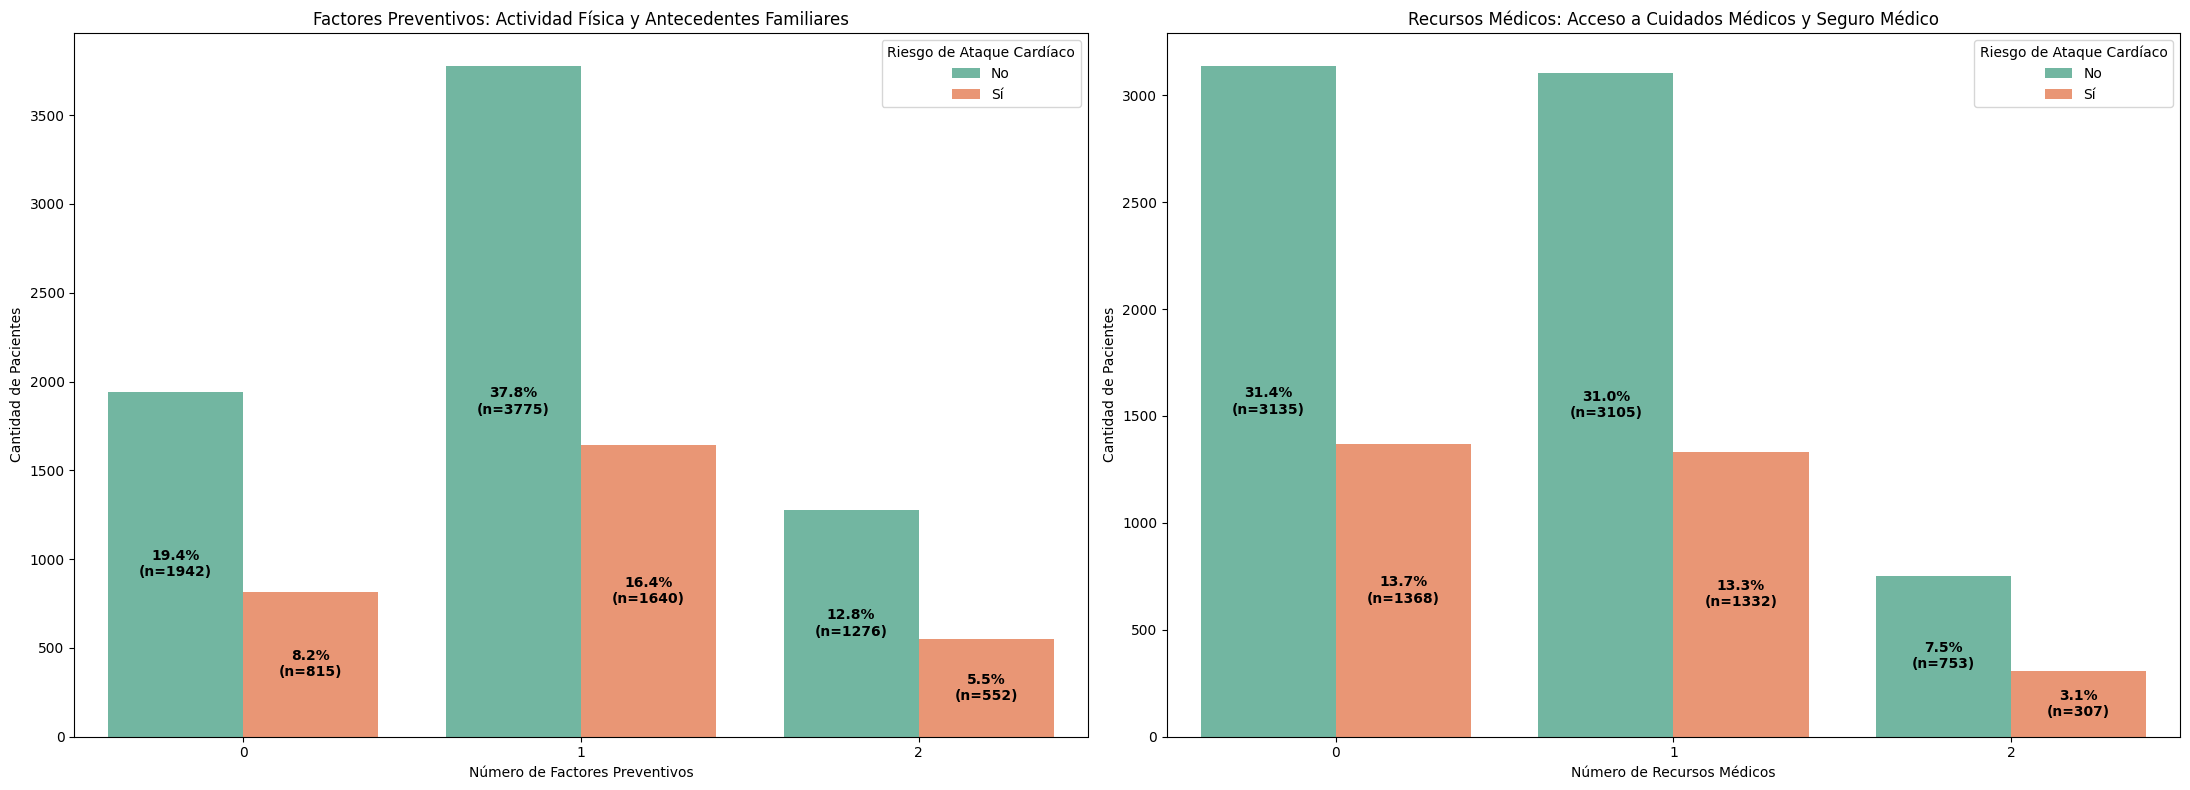

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear las variables combinadas
heartAttackPrediction_India['Factores_Preventivos'] = (
    heartAttackPrediction_India['Physical_Activity'] + heartAttackPrediction_India['Family_History']
)
heartAttackPrediction_India['Recursos_Medicos'] = (
    heartAttackPrediction_India['Healthcare_Access'] + heartAttackPrediction_India['Health_Insurance']
)

# Etiquetas para la leyenda
heartAttackPrediction_India['Heart_Attack_Risk_Label'] = heartAttackPrediction_India['Heart_Attack_Risk'].map({0: 'No', 1: 'Sí'})

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

# Función para graficar con etiquetas sobre el total de pacientes
def plot_bar_total_pct(ax, df, x_var, hue_var, title, xlabel, palette):
    # Agrupar datos
    grouped = df.groupby([x_var, hue_var]).size().reset_index(name='count')
    total_pacientes = grouped['count'].sum()
    grouped['percentage'] = (grouped['count'] / total_pacientes * 100).round(1)

    # Plot
    barplot = sns.barplot(data=grouped, x=x_var, y='count', hue=hue_var, palette=palette, ax=ax)

    # Añadir porcentajes y n
    for bar in barplot.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2

            # Obtener x e y originales
            cat = int(bar.get_x() + bar.get_width() / 2 + 0.5)
            label = bar.get_label()
            hue = bar.get_facecolor()

            # Determinar etiqueta 'No' o 'Sí' por el color
            hue_val = 'Sí' if hue[0] > 0.9 else 'No'

            # Buscar la fila correspondiente
            match = grouped[(grouped[x_var] == cat) & (grouped[hue_var] == hue_val)]
            if not match.empty:
                pct = match['percentage'].values[0]
                count = match['count'].values[0]
                ax.text(x, y, f'{pct:.1f}%\n(n={count})', ha='center', va='center', color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')
    ax.legend(title='Riesgo de Ataque Cardíaco', loc='upper right')

# Gráfico 1
plot_bar_total_pct(
    ax=axs[0],
    df=heartAttackPrediction_India,
    x_var='Factores_Preventivos',
    hue_var='Heart_Attack_Risk_Label',
    title='Factores Preventivos: Actividad Física y Antecedentes Familiares',
    xlabel='Número de Factores Preventivos',
    palette='Set2'
)

# Gráfico 2
plot_bar_total_pct(
    ax=axs[1],
    df=heartAttackPrediction_India,
    x_var='Recursos_Medicos',
    hue_var='Heart_Attack_Risk_Label',
    title='Recursos Médicos: Acceso a Cuidados Médicos y Seguro Médico',
    xlabel='Número de Recursos Médicos',
    palette='Set2'
)

plt.tight_layout()
plt.show()

---
---
---
---

## **Distribucion por Estados de la India**

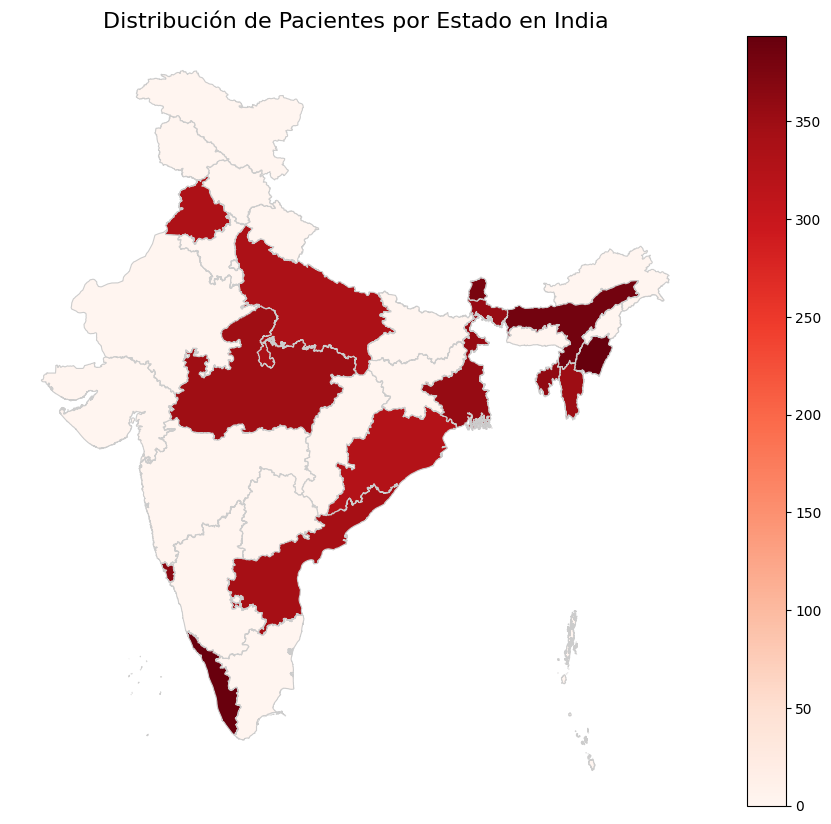

In [185]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar shapefile
shapefile_path = '../Codigo/geoBoundaries-IND-ADM1-all/geoBoundaries-IND-ADM1.shp'
india_states = gpd.read_file(shapefile_path)

# 2. Agrupar tus datos reales por estado
state_counts = heartAttackPrediction_India['State_Name'].value_counts().reset_index()
state_counts.columns = ['State_Name', 'Patient_Count']

# 3. Asegurar consistencia en los nombres
india_states['shapeName'] = india_states['shapeName'].str.lower().str.strip()
state_counts['State_Name'] = state_counts['State_Name'].str.lower().str.strip()

# 4. Unir los datos de pacientes con el mapa
merged = india_states.merge(state_counts, left_on='shapeName', right_on='State_Name', how='left')
merged['Patient_Count'] = merged['Patient_Count'].fillna(0)

# 5. Graficar heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Patient_Count',
            cmap='Reds',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True)
ax.set_title('Distribución de Pacientes por Estado en India', fontsize=16)
ax.axis('off')

plt.show()

In [183]:
print(india_states.columns)

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')


In [186]:
# Mostrar todos los estados únicos del dataset
estados_unicos = heartAttackPrediction_India['State_Name'].unique()
print("Estados únicos en el dataset:")
for estado in sorted(estados_unicos):
    print(f"- {estado}")


Estados únicos en el dataset:
- Andhra Pradesh
- Arunachal Pradesh
- Assam
- Bihar
- Chhattisgarh
- Goa
- Gujarat
- Haryana
- Himachal Pradesh
- Jharkhand
- Karnataka
- Kerala
- Madhya Pradesh
- Maharashtra
- Manipur
- Meghalaya
- Mizoram
- Nagaland
- Odisha
- Punjab
- Rajasthan
- Sikkim
- Tamil Nadu
- Telangana
- Tripura
- Uttar Pradesh
- Uttarakhand
- West Bengal


In [187]:
# Conteo de pacientes por estado
conteo_estados = heartAttackPrediction_India['State_Name'].value_counts()
print("Cantidad de pacientes por estado:")
print(conteo_estados)

Cantidad de pacientes por estado:
State_Name
Chhattisgarh         399
Meghalaya            396
Manipur              394
Arunachal Pradesh    392
Kerala               392
Assam                384
Sikkim               379
Goa                  366
Bihar                365
Karnataka            362
Tripura              361
Maharashtra          359
West Bengal          357
Telangana            356
Uttarakhand          350
Mizoram              350
Tamil Nadu           349
Madhya Pradesh       348
Nagaland             347
Himachal Pradesh     347
Andhra Pradesh       342
Haryana              338
Uttar Pradesh        335
Punjab               333
Rajasthan            326
Odisha               326
Gujarat              324
Jharkhand            323
Name: count, dtype: int64


---
---
---
---

## **Pie Charts** 

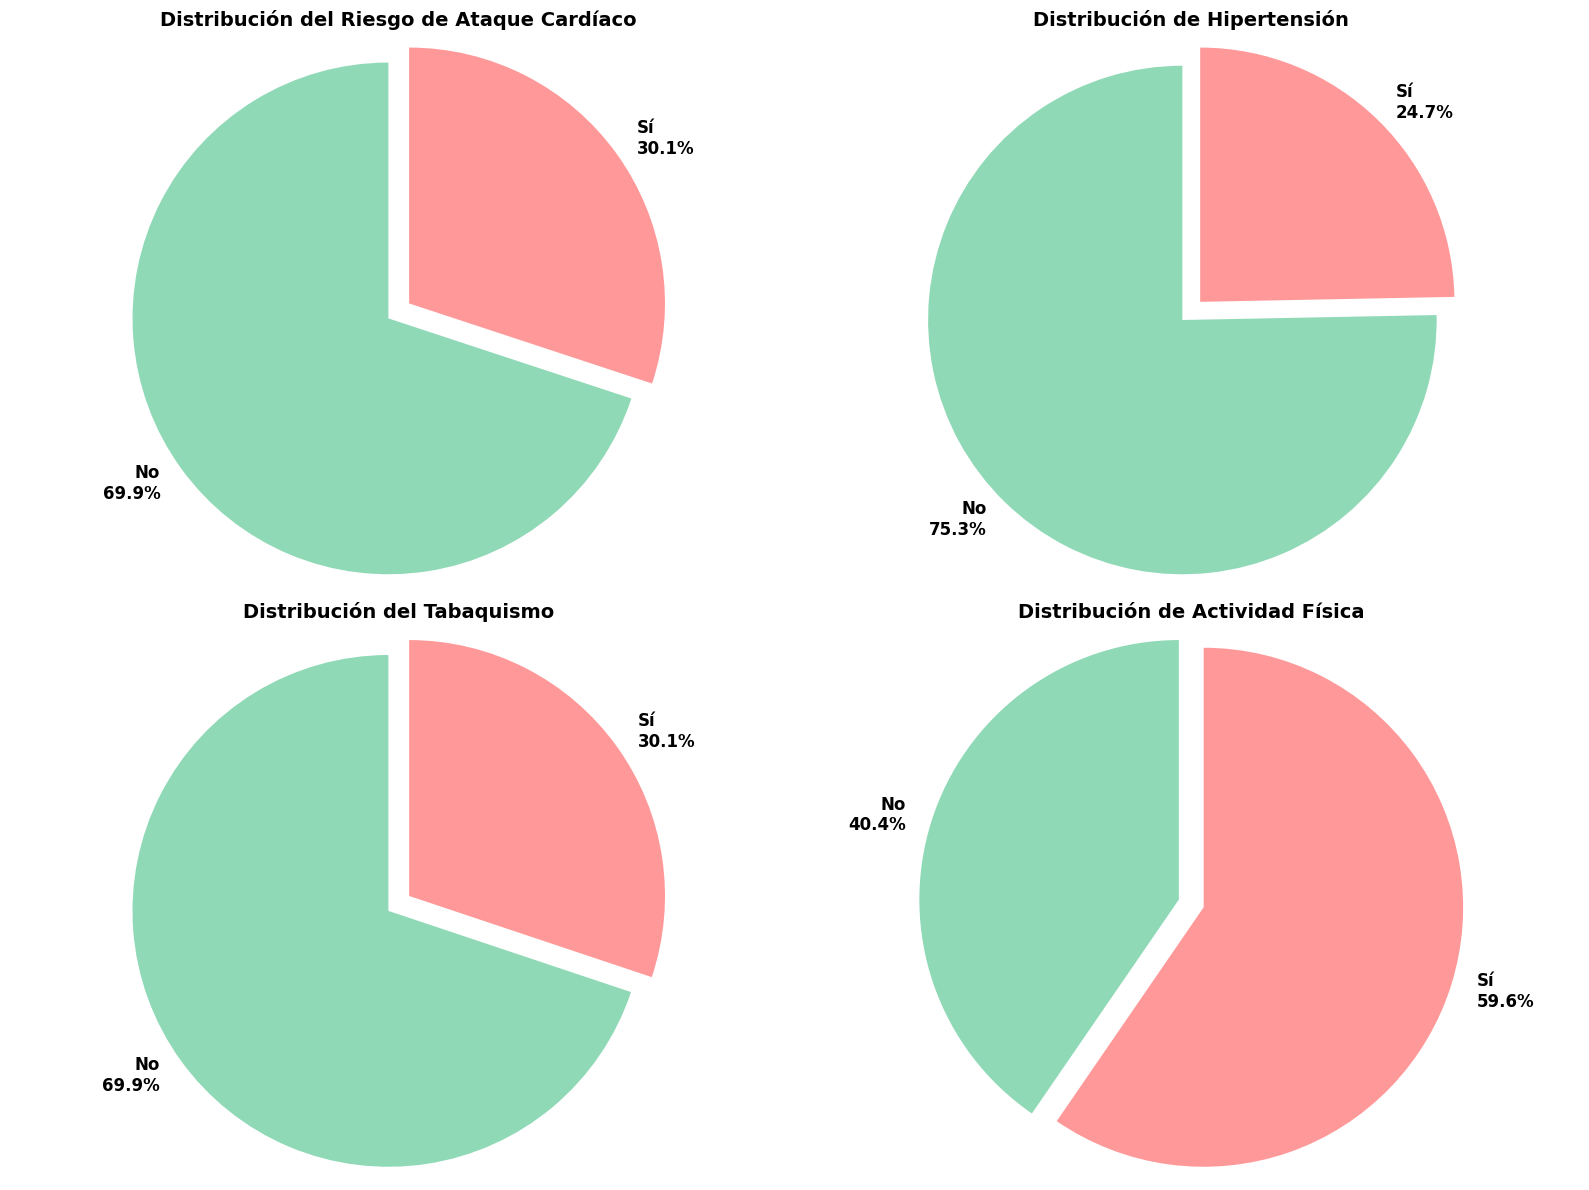

In [188]:
import matplotlib.pyplot as plt

# Variables seleccionadas
vars_pie = ['Heart_Attack_Risk', 'Hypertension', 'Smoking', 'Physical_Activity']
titles = [
    'Distribución del Riesgo de Ataque Cardíaco',
    'Distribución de Hipertensión',
    'Distribución del Tabaquismo',
    'Distribución de Actividad Física'
]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, var in enumerate(vars_pie):
    counts = heartAttackPrediction_India[var].value_counts().sort_index()
    labels = ['No', 'Sí']
    sizes = counts.values
    explode = (0.05, 0.05)  # separa ambas secciones para destacarlas
    colors = ['#8fd9b6', '#ff9999']  # verde claro / rosa

    axs[i].pie(
        sizes,
        labels=[f'{l}\n{p:.1f}%' for l, p in zip(labels, sizes / sizes.sum() * 100)],
        autopct=None,
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'fontsize': 12, 'weight': 'bold'}
    )
    axs[i].axis('equal')
    axs[i].set_title(titles[i], fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
---
---
---

## **Ataques Cardiacos por ...**

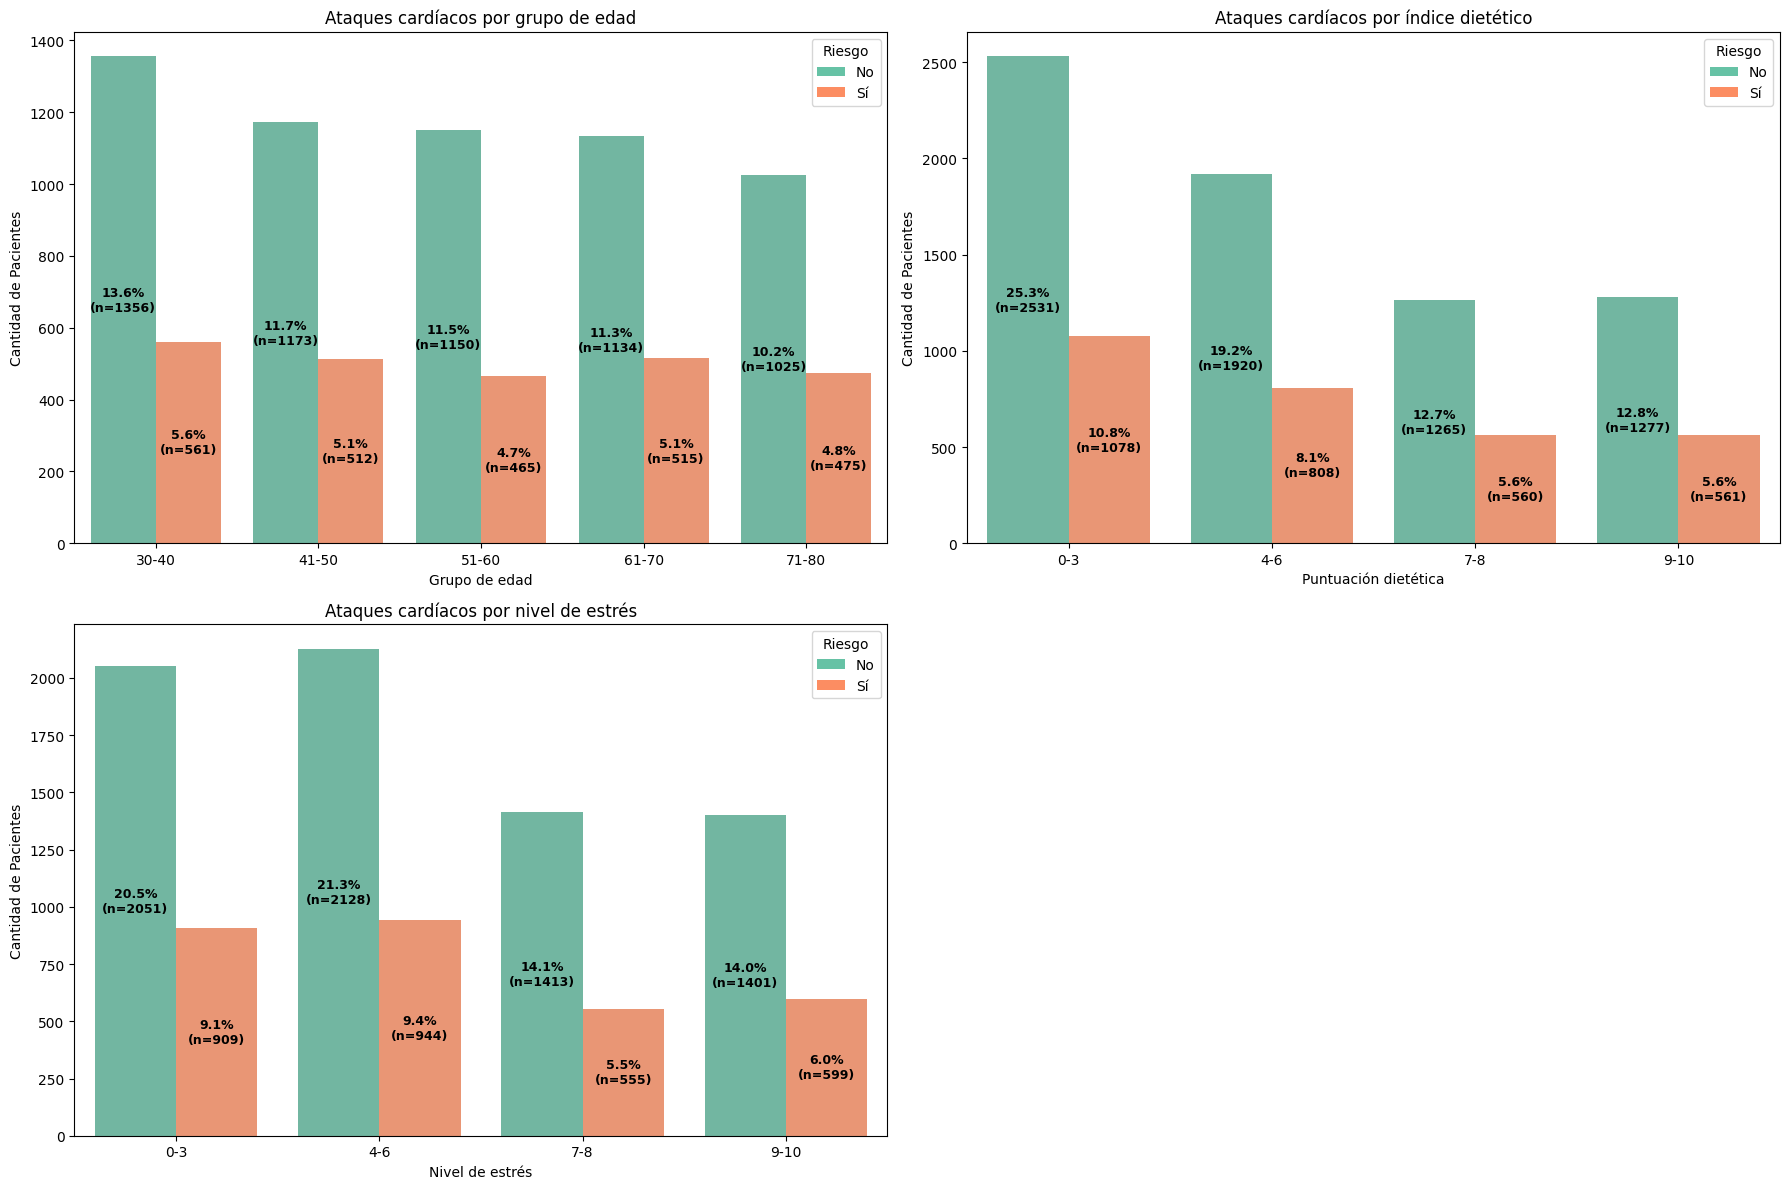

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Crear nuevas columnas de rangos categorizados
heartAttackPrediction_India['Age_Group'] = pd.cut(
    heartAttackPrediction_India['Age'],
    bins=[29, 40, 50, 60, 70, 80],
    labels=['30-40', '41-50', '51-60', '61-70', '71-80'],
    right=True
)

heartAttackPrediction_India['Diet_Score_Group'] = pd.cut(
    heartAttackPrediction_India['Diet_Score'],
    bins=[-1, 3, 6, 8, 10],
    labels=['0-3', '4-6', '7-8', '9-10'],
    right=True
)

heartAttackPrediction_India['Stress_Level_Group'] = pd.cut(
    heartAttackPrediction_India['Stress_Level'],
    bins=[-1, 3, 6, 8, 10],
    labels=['0-3', '4-6', '7-8', '9-10'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Crear figura 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

# Función para graficar con porcentajes y n
def plot_with_percentages(ax, x_col, title, xlabel, palette):
    data = heartAttackPrediction_India.copy()
    grouped = data.groupby([x_col, 'Heart_Attack_Risk']).size().reset_index(name='count')

    # Gráfico
    sns.barplot(data=grouped, x=x_col, y='count', hue='Heart_Attack_Risk', palette=palette, ax=ax)

    # Etiquetas dentro de las barras
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2
                ax.text(x, y, f"{(height / total_pacientes) * 100:.1f}%\n(n={int(height)})",
                        ha='center', va='center', fontsize=9, color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')

    # Crear leyenda personalizada con los colores reales de 'Set2'
    legend_elements = [
        Patch(facecolor=sns.color_palette(palette)[0], label='No'),
        Patch(facecolor=sns.color_palette(palette)[1], label='Sí')
    ]
    ax.legend(handles=legend_elements, title='Riesgo')

# Gráficos en 3 de los 4 espacios
plot_with_percentages(axs[0], 'Age_Group', 'Ataques cardíacos por grupo de edad', 'Grupo de edad', 'Set2')
plot_with_percentages(axs[1], 'Diet_Score_Group', 'Ataques cardíacos por índice dietético', 'Puntuación dietética', 'Set2')
plot_with_percentages(axs[2], 'Stress_Level_Group', 'Ataques cardíacos por nivel de estrés', 'Nivel de estrés', 'Set2')

# Dejar el cuarto gráfico vacío
axs[3].axis('off')

plt.tight_layout()
plt.show()

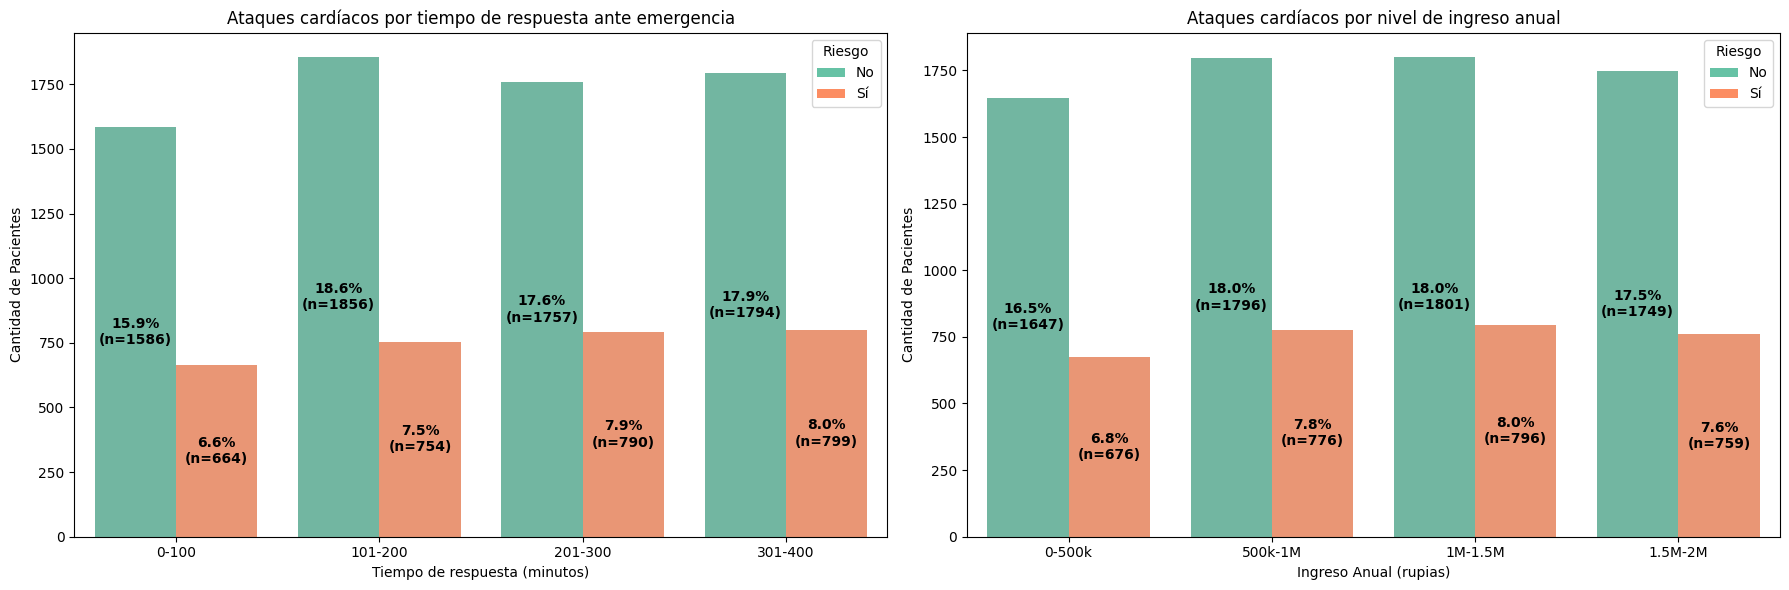

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Crear columnas categorizadas para cada variable
heartAttackPrediction_India['Response_Time_Group'] = pd.cut(
    heartAttackPrediction_India['Emergency_Response_Time'],
    bins=[-1, 100, 200, 300, 400],
    labels=['0-100', '101-200', '201-300', '301-400'],
    right=True
)

heartAttackPrediction_India['Income_Group'] = pd.cut(
    heartAttackPrediction_India['Annual_Income'],
    bins=[-1, 500000, 1000000, 1500000, 2000000],
    labels=['0-500k', '500k-1M', '1M-1.5M', '1.5M-2M'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Crear figura 2x2
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
axs = axs.flatten()

# Función para graficar
def plot_with_percentages(ax, x_col, title, xlabel, palette):
    data = heartAttackPrediction_India.copy()
    grouped = data.groupby([x_col, 'Heart_Attack_Risk']).size().reset_index(name='count')

    # Gráfico
    sns.barplot(data=grouped, x=x_col, y='count', hue='Heart_Attack_Risk', palette=palette, ax=ax)

    # Etiquetas dentro de las barras
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2
                ax.text(x, y, f"{(height / total_pacientes) * 100:.1f}%\n(n={int(height)})",
                        ha='center', va='center', fontsize=10, color='black', weight='bold')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cantidad de Pacientes')

    # Leyenda personalizada
    legend_elements = [
        Patch(facecolor=sns.color_palette(palette)[0], label='No'),
        Patch(facecolor=sns.color_palette(palette)[1], label='Sí')
    ]
    ax.legend(handles=legend_elements, title='Riesgo')

# Gráfico 1: Tiempo de respuesta ante emergencia
plot_with_percentages(
    ax=axs[0],
    x_col='Response_Time_Group',
    title='Ataques cardíacos por tiempo de respuesta ante emergencia',
    xlabel='Tiempo de respuesta (minutos)',
    palette='Set2'
)

# Gráfico 2: Ingreso anual
plot_with_percentages(
    ax=axs[1],
    x_col='Income_Group',
    title='Ataques cardíacos por nivel de ingreso anual',
    xlabel='Ingreso Anual (rupias)',
    palette='Set2'
)

plt.tight_layout()
plt.show()


---
---
---
---

## **Graficos Top 10 ...**

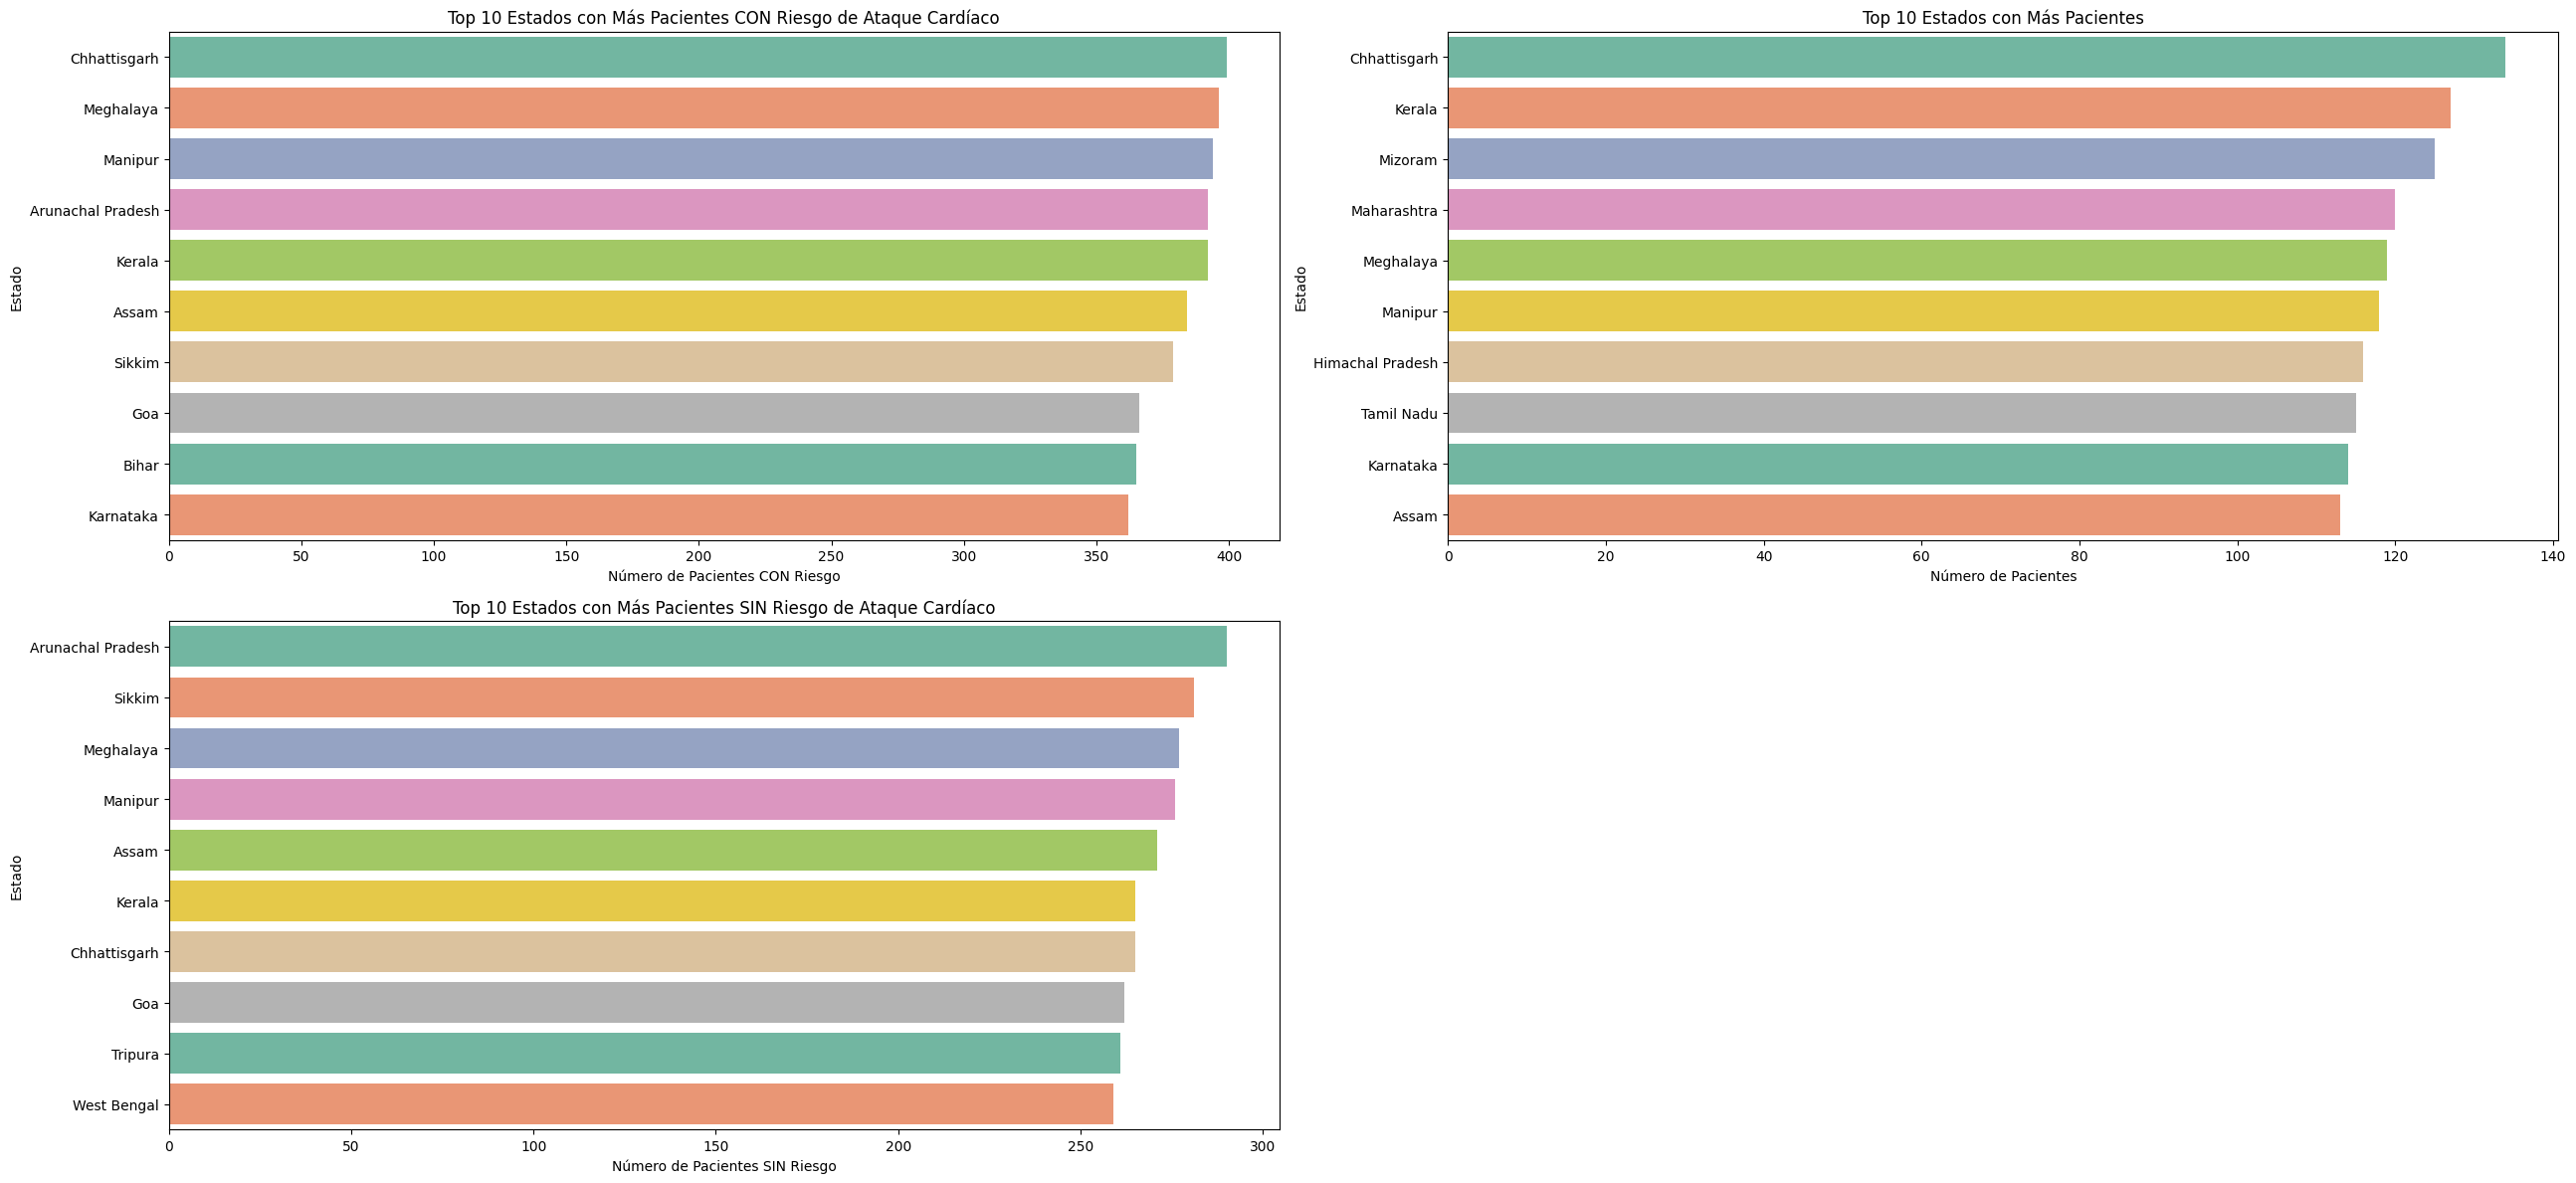

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Top 10 estados con más pacientes
top_states_total = (
    heartAttackPrediction_India['State_Name']
    .value_counts()
    .head(10)
    .reset_index(name='Patient_Count')
    .rename(columns={'index': 'State_Name'})
)

# 2. Top 10 estados con más pacientes CON riesgo de ataque cardíaco
top_states_risk = (
    heartAttackPrediction_India[heartAttackPrediction_India['Heart_Attack_Risk'] == 1]
    .groupby('State_Name')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='AtRisk_Count')
)

# 2. Top 10 estados con más pacientes SIN riesgo de ataque cardíaco
top_states_without_risk = (
    heartAttackPrediction_India[heartAttackPrediction_India['Heart_Attack_Risk'] == 0]
    .groupby('State_Name')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='AtNoRisk_Count')
)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(26, 12))

# Gráfico 1: Total de pacientes por estado
sns.barplot(data=top_states_total, y='State_Name', x='Patient_Count', palette='Set2', ax=axs[0,0])
axs[0,1].set_title('Top 10 Estados con Más Pacientes')
axs[0,1].set_xlabel('Número de Pacientes')
axs[0,1].set_ylabel('Estado')

# Gráfico 2: Pacientes CON riesgo por estado
sns.barplot(data=top_states_risk, y='State_Name', x='AtRisk_Count', palette='Set2', ax=axs[0,1])
axs[0,0].set_title('Top 10 Estados con Más Pacientes CON Riesgo de Ataque Cardíaco')
axs[0,0].set_xlabel('Número de Pacientes CON Riesgo')
axs[0,0].set_ylabel('Estado')

# Gráfico 2: Pacientes SIN riesgo por estado
sns.barplot(data=top_states_without_risk, y='State_Name', x='AtNoRisk_Count', palette='Set2', ax=axs[1,0])
axs[1,0].set_title('Top 10 Estados con Más Pacientes SIN Riesgo de Ataque Cardíaco')
axs[1,0].set_xlabel('Número de Pacientes SIN Riesgo')
axs[1,0].set_ylabel('Estado')

# Dejar el cuarto gráfico vacío
axs[1,1].axis('off')

plt.tight_layout()
plt.show()

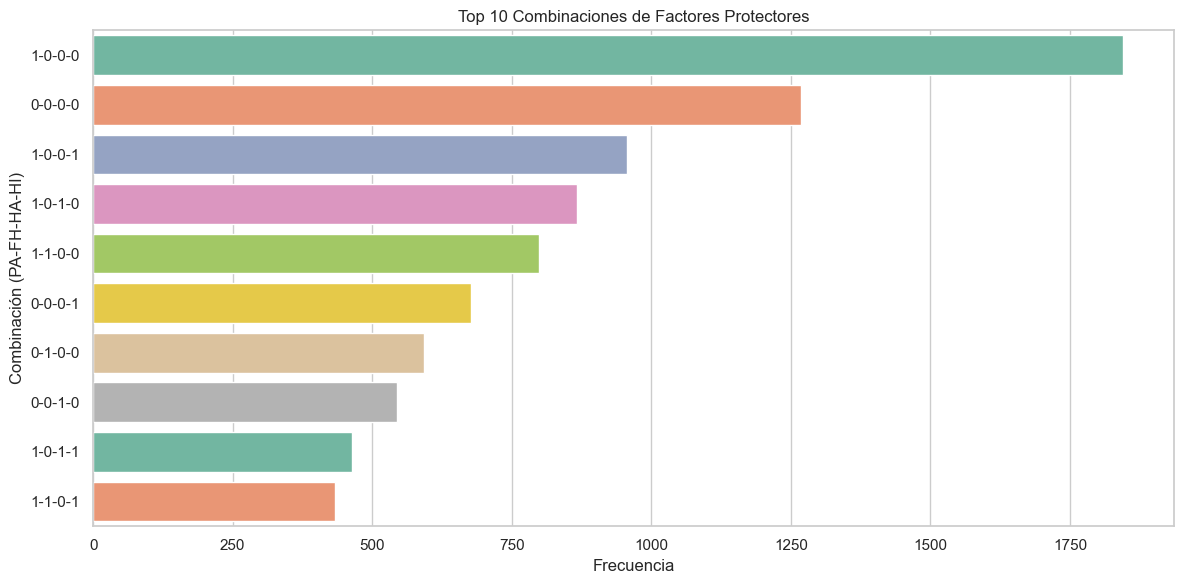

In [256]:
protective_factors = ['Physical_Activity', 'Family_History', 'Healthcare_Access', 'Health_Insurance']

combo_protect = (
    heartAttackPrediction_India[protective_factors]
    .astype(str)
    .agg('-'.join, axis=1)
    .value_counts()
    .head(10)
    .reset_index(name='Count')
    .rename(columns={'index': 'Combination'})
)

plt.figure(figsize=(12, 6))
sns.barplot(data=combo_protect, x='Count', y='Combination', palette='Set2')
plt.title('Top 10 Combinaciones de Factores Protectores')
plt.xlabel('Frecuencia')
plt.ylabel('Combinación (PA-FH-HA-HI)')
plt.tight_layout()
plt.show()

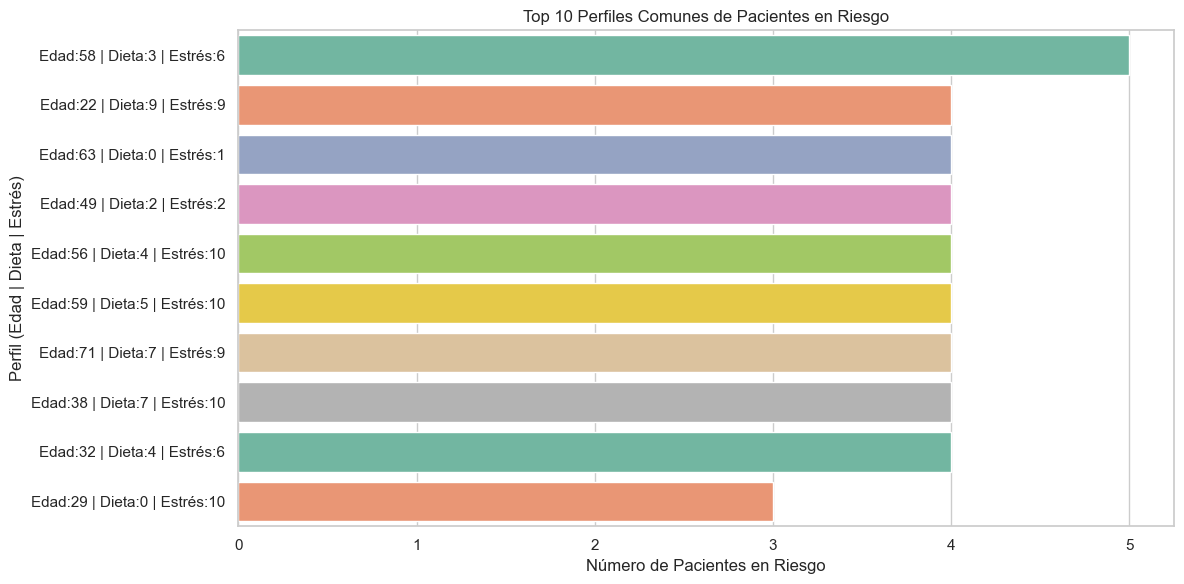

In [ ]:
profile_data = (
    heartAttackPrediction_India[heartAttackPrediction_India['Heart_Attack_Risk'] == 1]
    .copy()
)

profile_data['Perfil'] = (
    'Edad:' + profile_data['Age'].astype(str) +
    ' | Dieta:' + profile_data['Diet_Score'].astype(str) +
    ' | Estrés:' + profile_data['Stress_Level'].astype(str)
)

top_profiles = (
    profile_data['Perfil']
    .value_counts()
    .head(10)
    .reset_index(name='Count')
    .rename(columns={'index': 'Perfil'})
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_profiles, x='Count', y='Perfil', palette='Set2')
plt.title('Top 10 Perfiles Comunes de Pacientes en Riesgo')
plt.xlabel('Número de Pacientes en Riesgo')
plt.ylabel('Perfil (Edad | Dieta | Estrés)')
plt.tight_layout()
plt.show()

---
---
---
---

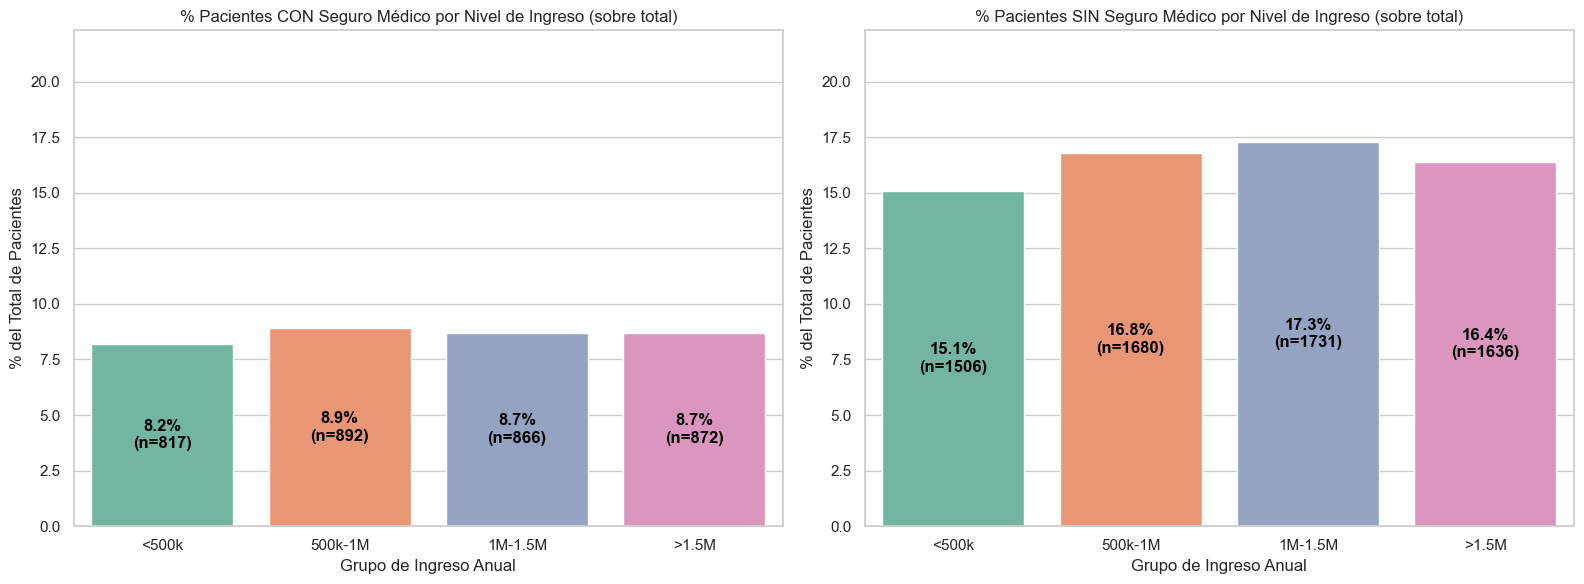

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear grupos de ingreso
heartAttackPrediction_India['Income_Group'] = pd.cut(
    heartAttackPrediction_India['Annual_Income'],
    bins=[0, 500000, 1000000, 1500000, 2000000],
    labels=['<500k', '500k-1M', '1M-1.5M', '>1.5M'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Agrupar por Income_Group y calcular conteos de pacientes con y sin seguro
grouped = heartAttackPrediction_India.groupby('Income_Group')['Health_Insurance'].agg(
    insured_count='sum',
    total_group='count'
).reset_index()

grouped['uninsured_count'] = grouped['total_group'] - grouped['insured_count']
grouped['pct_insured'] = (grouped['insured_count'] / total_pacientes * 100).round(1)
grouped['pct_uninsured'] = (grouped['uninsured_count'] / total_pacientes * 100).round(1)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: % asegurados
sns.barplot(data=grouped, x='Income_Group', y='pct_insured', palette='Set2', ax=axs[0])
axs[0].set_title('% Pacientes CON Seguro Médico por Nivel de Ingreso (sobre total)')
axs[0].set_xlabel('Grupo de Ingreso Anual')
axs[0].set_ylabel('% del Total de Pacientes')
axs[0].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[0].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'insured_count']
    axs[0].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

# Gráfico 2: % no asegurados
sns.barplot(data=grouped, x='Income_Group', y='pct_uninsured', palette='Set2', ax=axs[1])
axs[1].set_title('% Pacientes SIN Seguro Médico por Nivel de Ingreso (sobre total)')
axs[1].set_xlabel('Grupo de Ingreso Anual')
axs[1].set_ylabel('% del Total de Pacientes')
axs[1].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[1].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'uninsured_count']
    axs[1].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

plt.tight_layout()
plt.show()


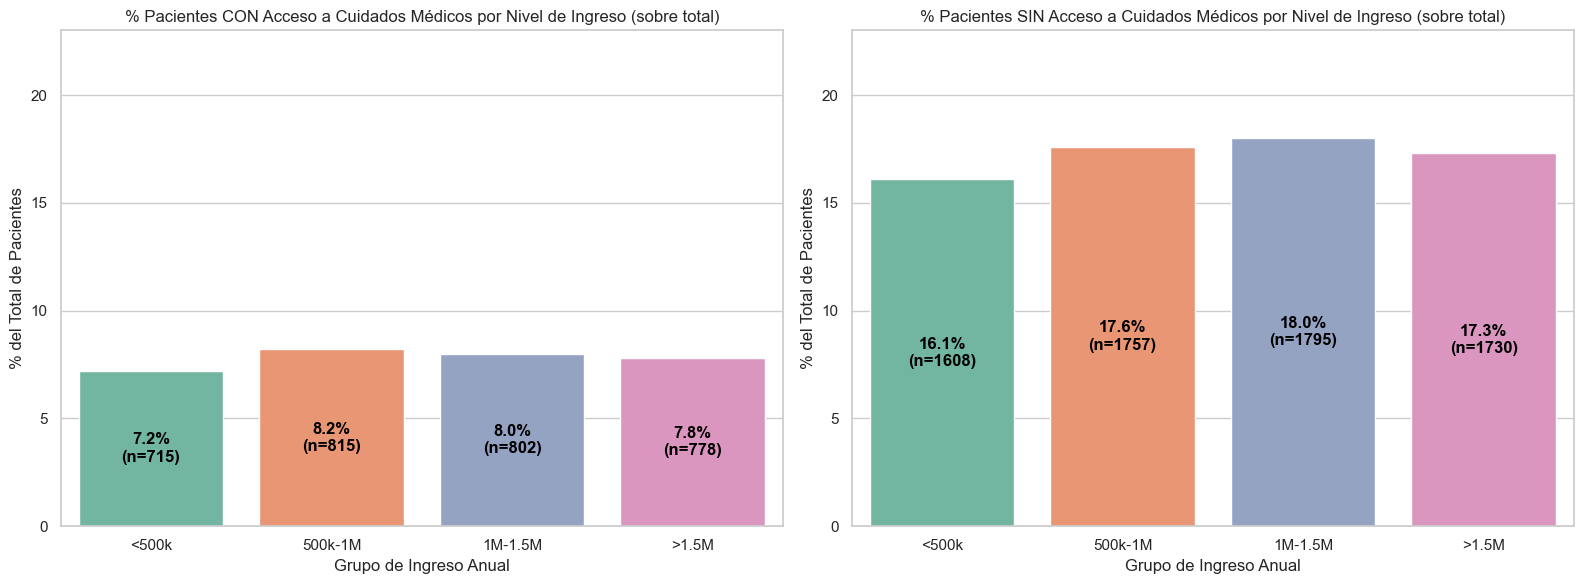

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear grupos de ingreso
heartAttackPrediction_India['Income_Group'] = pd.cut(
    heartAttackPrediction_India['Annual_Income'],
    bins=[0, 500000, 1000000, 1500000, 2000000],
    labels=['<500k', '500k-1M', '1M-1.5M', '>1.5M'],
    right=True
)

# Total de pacientes
total_pacientes = len(heartAttackPrediction_India)

# Agrupar por Income_Group y calcular conteos de pacientes con y sin acceso a cuidados medicos
grouped = heartAttackPrediction_India.groupby('Income_Group')['Healthcare_Access'].agg(
    insured_count='sum',
    total_group='count'
).reset_index()

grouped['uninsured_count'] = grouped['total_group'] - grouped['insured_count']
grouped['pct_insured'] = (grouped['insured_count'] / total_pacientes * 100).round(1)
grouped['pct_uninsured'] = (grouped['uninsured_count'] / total_pacientes * 100).round(1)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: % reciben cuidados medicos 
sns.barplot(data=grouped, x='Income_Group', y='pct_insured', palette='Set2', ax=axs[0])
axs[0].set_title('% Pacientes CON Acceso a Cuidados Médicos por Nivel de Ingreso (sobre total)')
axs[0].set_xlabel('Grupo de Ingreso Anual')
axs[0].set_ylabel('% del Total de Pacientes')
axs[0].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[0].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'insured_count']
    axs[0].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

# Gráfico 2: % no reciben cuidados medicos
sns.barplot(data=grouped, x='Income_Group', y='pct_uninsured', palette='Set2', ax=axs[1])
axs[1].set_title('% Pacientes SIN Acceso a Cuidados Médicos por Nivel de Ingreso (sobre total)')
axs[1].set_xlabel('Grupo de Ingreso Anual')
axs[1].set_ylabel('% del Total de Pacientes')
axs[1].set_ylim(0, grouped[['pct_insured', 'pct_uninsured']].values.max() + 5)
for i, bar in enumerate(axs[1].patches):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    n = grouped.loc[i, 'uninsured_count']
    axs[1].text(x, height / 2, f'{height:.1f}%\n(n={n})', ha='center', va='center', color='black', weight='bold')

plt.tight_layout()
plt.show()


---
---
---
---

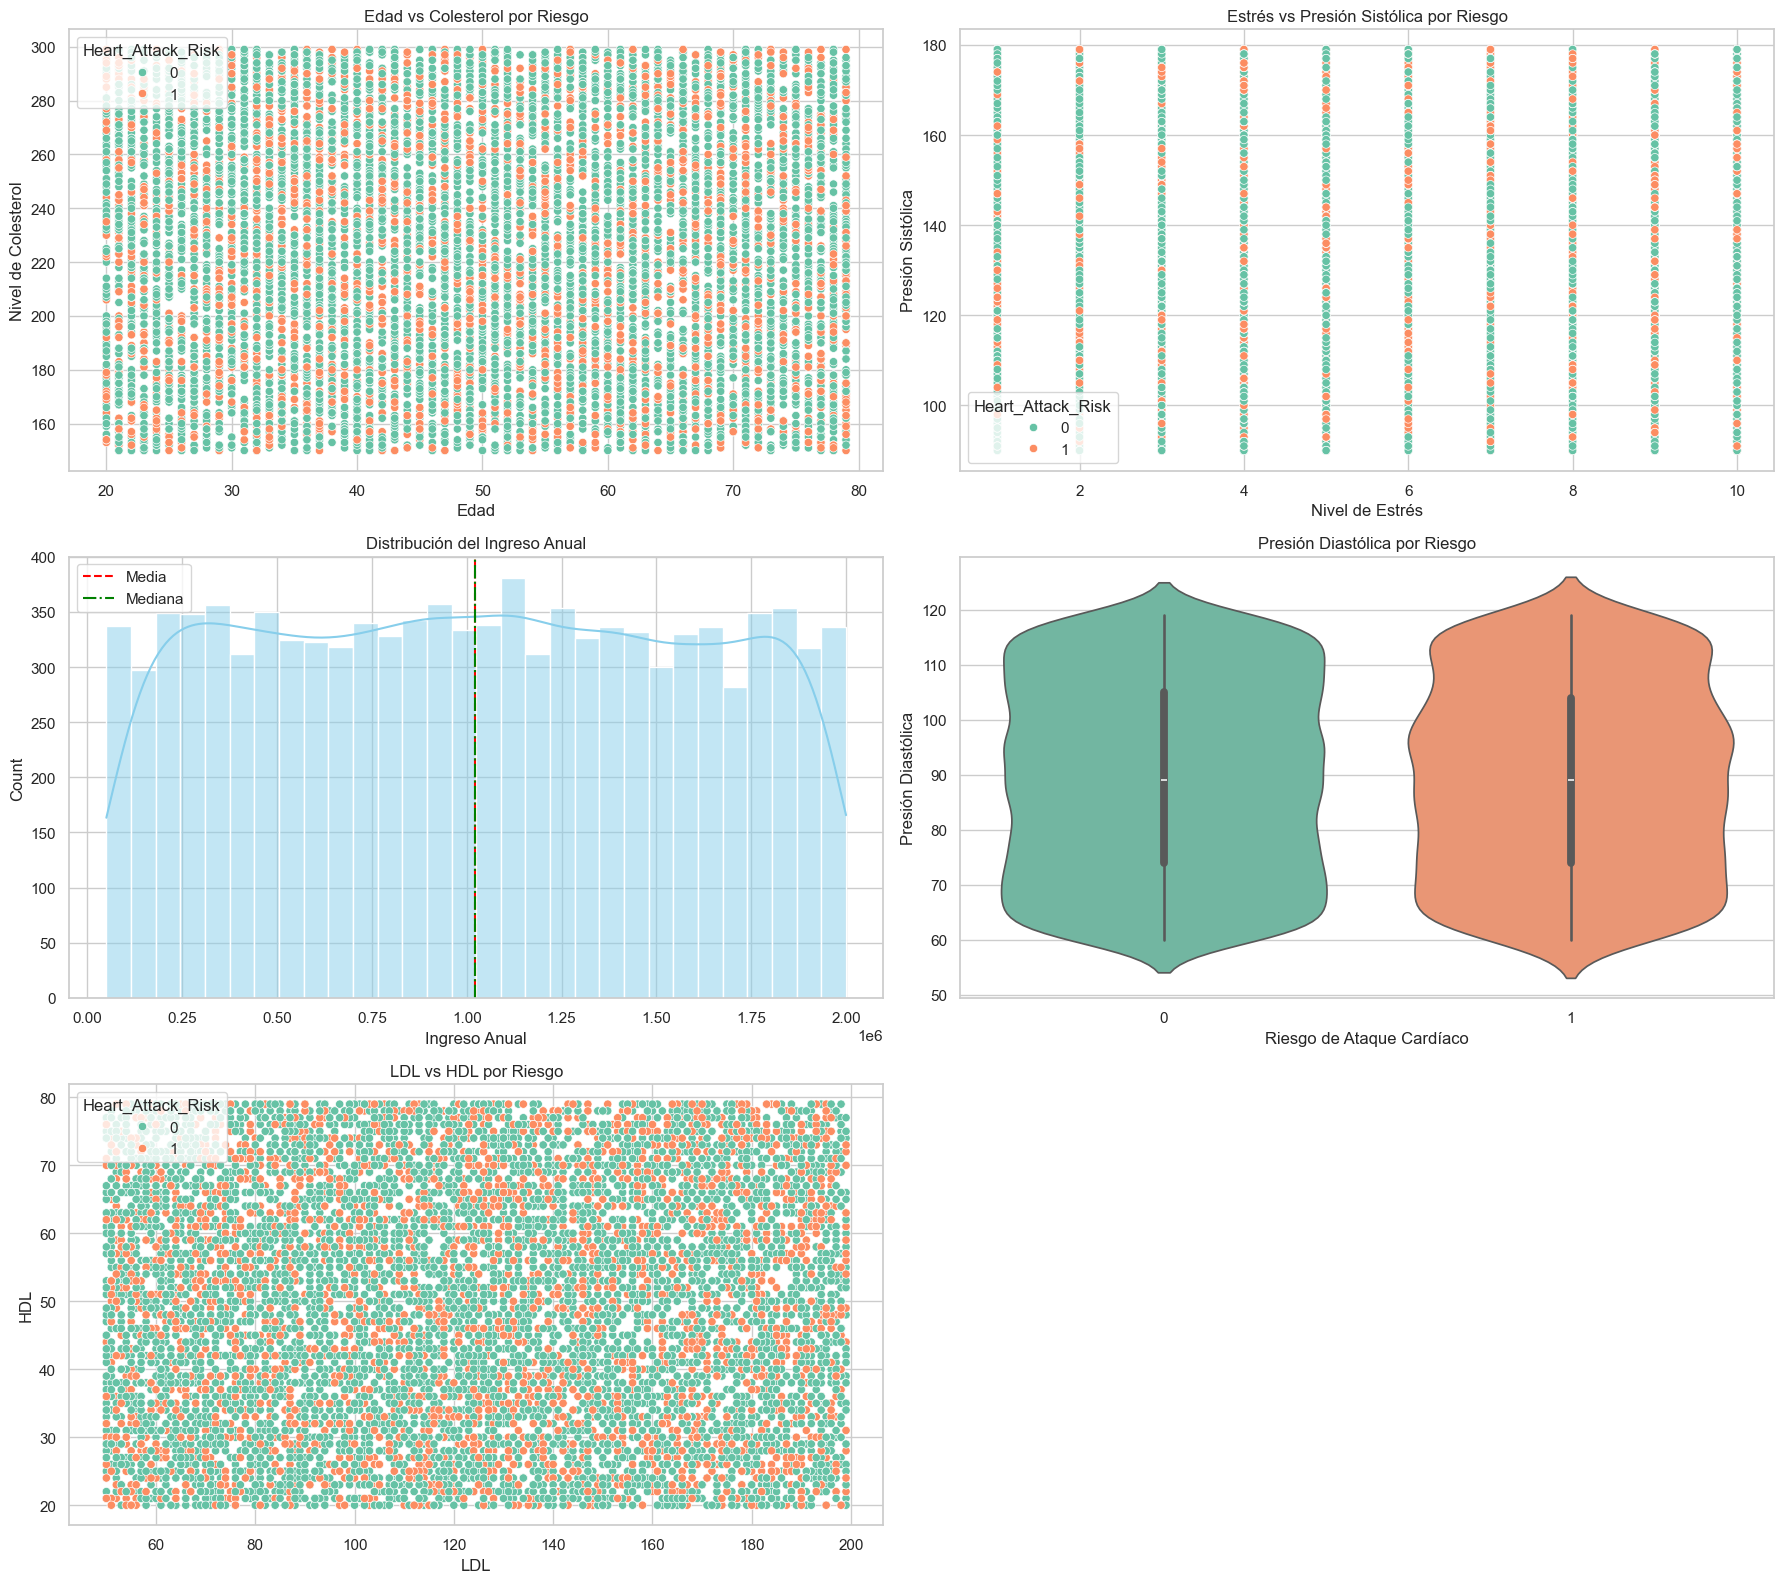

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subplots 3x2 para visualizaciones interesantes
fig, axs = plt.subplots(3, 2, figsize=(18, 16))

# Gráfico 1: Relación entre Edad y Colesterol
sns.scatterplot(data=heartAttackPrediction_India, x='Age', y='Cholesterol_Level', hue='Heart_Attack_Risk', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Edad vs Colesterol por Riesgo')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Nivel de Colesterol')

# Gráfico 2: Relación entre Estrés y Presión Sistólica
sns.scatterplot(data=heartAttackPrediction_India, x='Stress_Level', y='Systolic_BP', hue='Heart_Attack_Risk', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Estrés vs Presión Sistólica por Riesgo')
axs[0, 1].set_xlabel('Nivel de Estrés')
axs[0, 1].set_ylabel('Presión Sistólica')

# Gráfico 3: Histograma de Ingresos con línea de media y mediana
sns.histplot(data=heartAttackPrediction_India, x='Annual_Income', bins=30, kde=True, ax=axs[1, 0], color='skyblue')
axs[1, 0].axvline(heartAttackPrediction_India['Annual_Income'].mean(), color='red', linestyle='--', label='Media')
axs[1, 0].axvline(heartAttackPrediction_India['Annual_Income'].median(), color='green', linestyle='-.', label='Mediana')
axs[1, 0].set_title('Distribución del Ingreso Anual')
axs[1, 0].set_xlabel('Ingreso Anual')
axs[1, 0].legend()

# Gráfico 4: Boxenplot de Presión Diastólica por riesgo
sns.violinplot(data=heartAttackPrediction_India, x='Heart_Attack_Risk', y='Diastolic_BP', palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('Presión Diastólica por Riesgo')
axs[1, 1].set_xlabel('Riesgo de Ataque Cardíaco')
axs[1, 1].set_ylabel('Presión Diastólica')

# Gráfico 5: Relación LDL vs HDL por Riesgo
sns.scatterplot(data=heartAttackPrediction_India, x='LDL_Level', y='HDL_Level', hue='Heart_Attack_Risk', palette='Set2', ax=axs[2, 0])
axs[2, 0].set_title('LDL vs HDL por Riesgo')
axs[2, 0].set_xlabel('LDL')
axs[2, 0].set_ylabel('HDL')

# Gráfico 6: Eliminar (no usar)
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

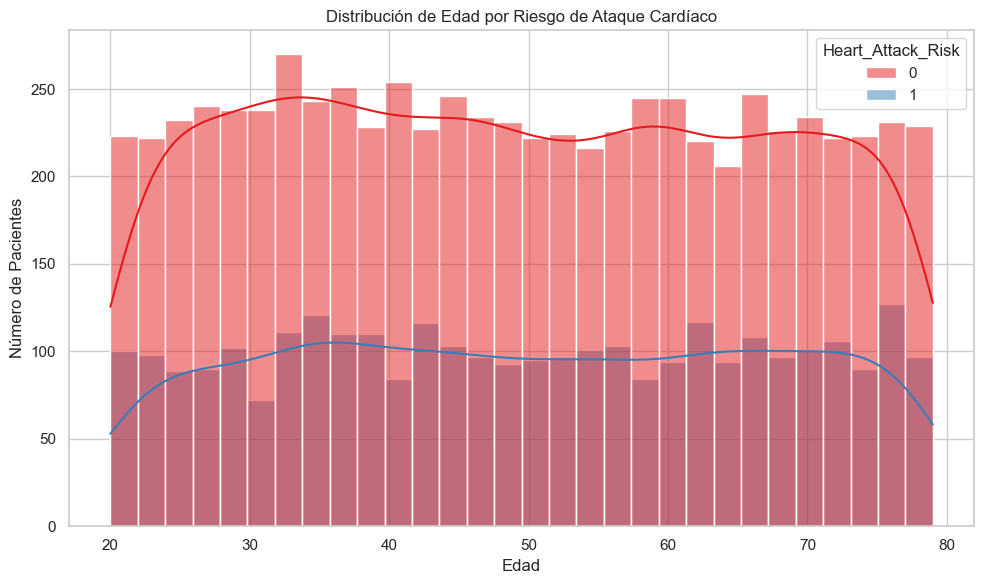

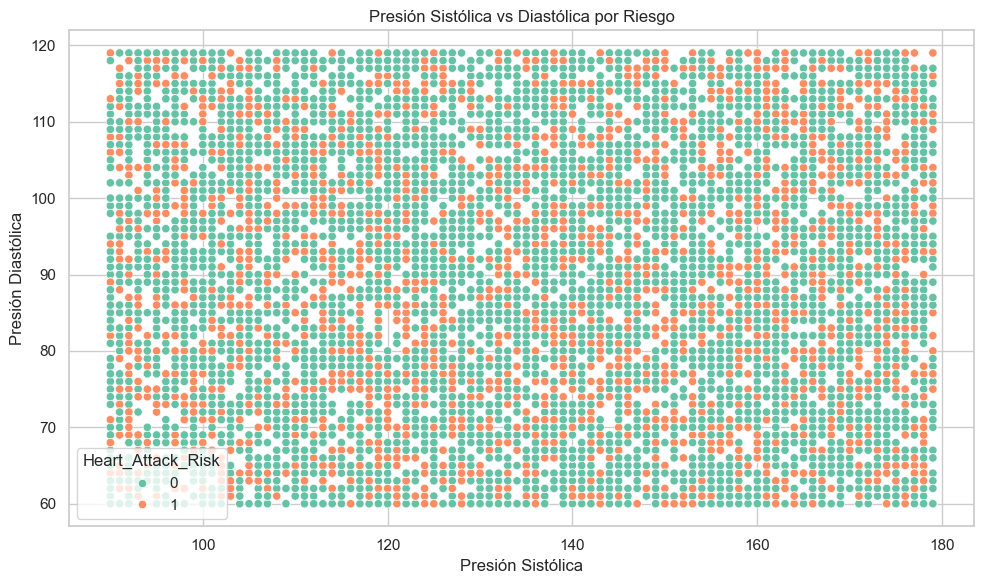

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Histograma de Age con KDE separado por Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.histplot(data=heartAttackPrediction_India, x='Age', hue='Heart_Attack_Risk', kde=True, palette='Set1', bins=30)
plt.title('Distribución de Edad por Riesgo de Ataque Cardíaco')
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.tight_layout()
plt.show()

# Gráfico 2: Diagrama de dispersión Systolic vs Diastolic BP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heartAttackPrediction_India, x='Systolic_BP', y='Diastolic_BP', hue='Heart_Attack_Risk', palette='Set2')
plt.title('Presión Sistólica vs Diastólica por Riesgo')
plt.xlabel('Presión Sistólica')
plt.ylabel('Presión Diastólica')
plt.tight_layout()
plt.show()

---
---
---
---

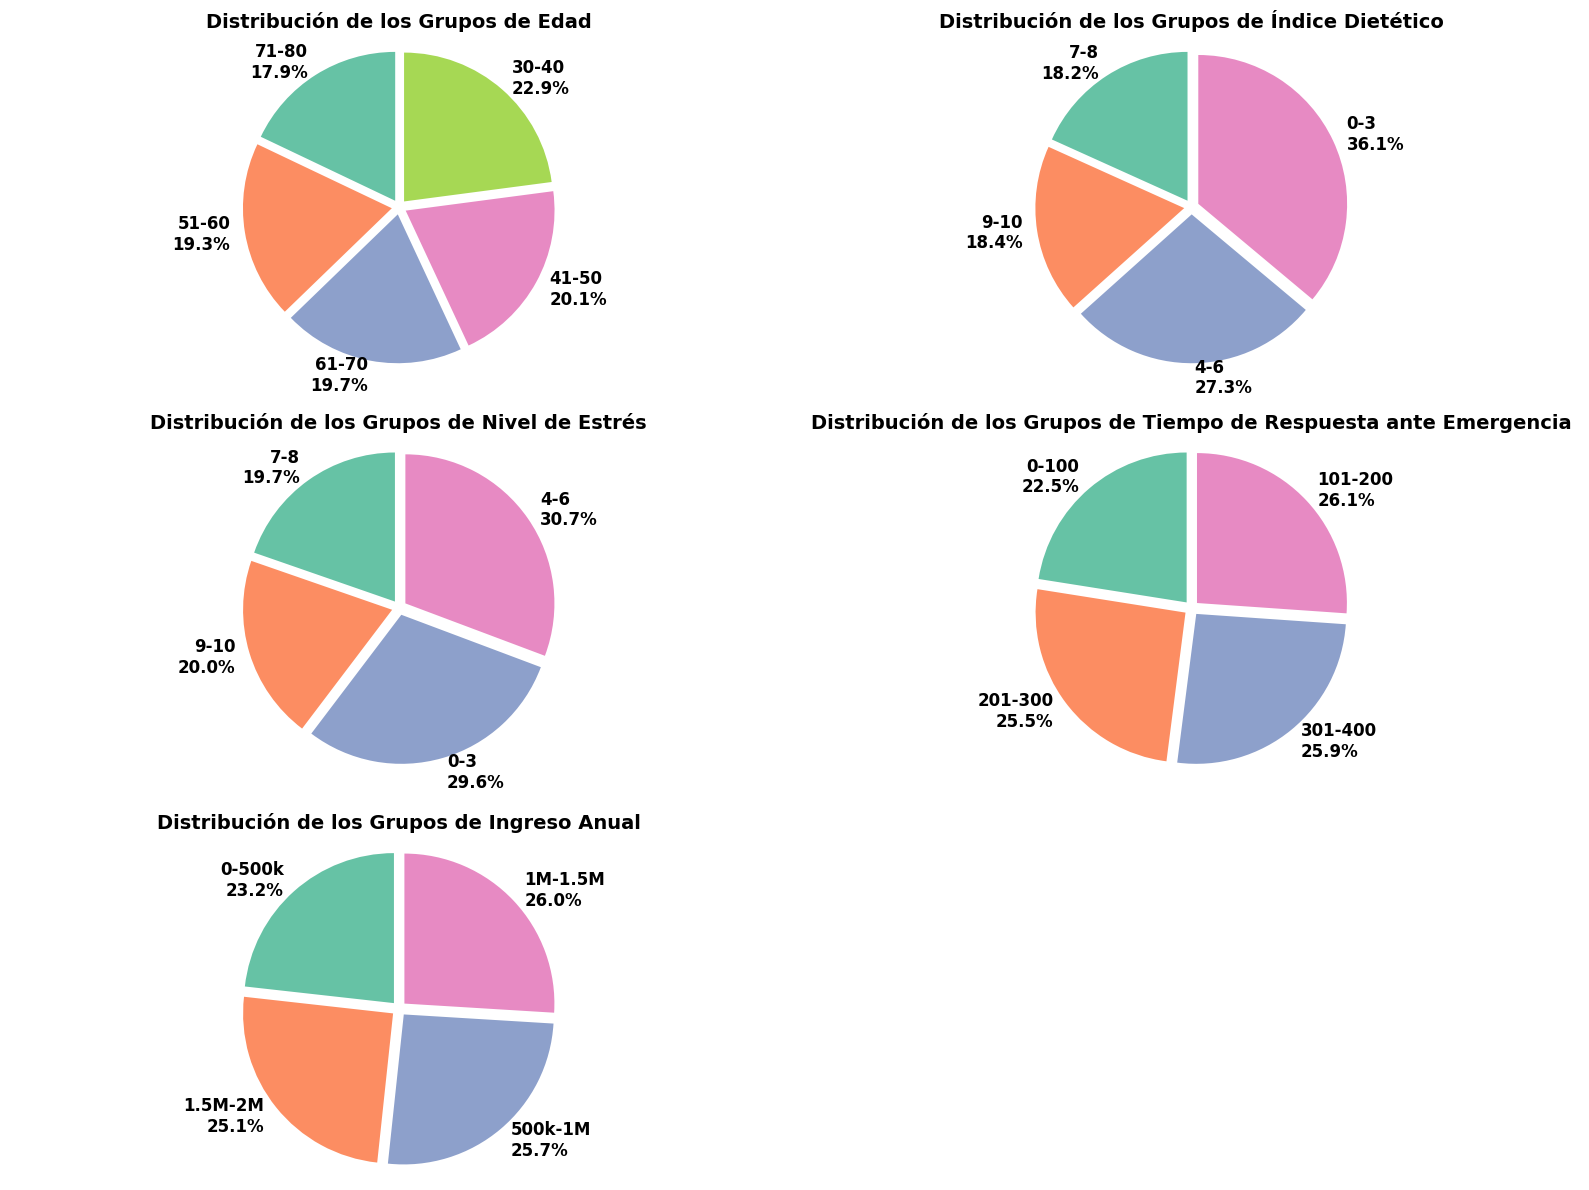

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables y títulos
vars_pie = ['Age_Group', 'Diet_Score_Group', 'Stress_Level_Group', 'Response_Time_Group', 'Income_Group']
titles = [
    'Distribución de los Grupos de Edad',
    'Distribución de los Grupos de Índice Dietético',
    'Distribución de los Grupos de Nivel de Estrés',
    'Distribución de los Grupos de Tiempo de Respuesta ante Emergencia',
    'Distribución de los Grupos de Ingreso Anual'
]

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten()

for i, var in enumerate(vars_pie):
    counts = heartAttackPrediction_India[var].value_counts(normalize=True).sort_values() * 100
    sizes = counts.values
    labels = [f'{idx}\n{pct:.1f}%' for idx, pct in zip(counts.index, sizes)]

    axs[i].pie(
        sizes,
        labels=labels,
        autopct=None,
        startangle=90,
        explode=[0.05]*len(sizes),
        colors=sns.color_palette('Set2', n_colors=len(sizes)),
        textprops={'fontsize': 12, 'weight': 'bold'}
    )
    axs[i].axis('equal')
    axs[i].set_title(titles[i], fontsize=14, fontweight='bold')

# Sexto gráfico vacío
axs[5].axis('off')

plt.tight_layout()
plt.show()